# Object Detection

## Q1 : Face detection and association-based tracking

In [17]:
import cv2                                                                                    
import time
import os
import shutil

### 1. Data Preparation

In [30]:
def burst_video_into_frames(video_path, output_folder, burst_duration=30):
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    
    # Get the frame rate of the video
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    print(fps)
    
    # Calculate the number of frames to capture for the specified duration
    num_frames_to_capture = int(fps * burst_duration)
    
    # Initialize frame count
    frame_count = 0
    
    # Loop through the video frames
    while True:
        # Read the next frame
        success, frame = video_capture.read()
        # Check if frame reading was successful
        if not success:
            break
        
        # Save the frame to the output folder
        #frame_filename = f"{output_folder}/frame_{frame_count:04d}.jpg"
        #cv2.imwrite(frame_filename, frame)
        
        # Increment frame count
        frame_count += 1
        
        # Break the loop if the desired number of frames is captured
        if frame_count >= num_frames_to_capture:
            break
    
    # Release the video capture object
    video_capture.release()

# Example usage:
video_path = "vid.mp4"  # Path to the input video
output_folder = "output_frames"  # Folder where frames will be saved
burst_duration = 30  # Duration for bursting video into frames (in seconds)

In [31]:
# Call the function
burst_video_into_frames(video_path, output_folder, burst_duration)

23.976023976023978


### 2. Face Detection

In [ ]:
# Load the pre-trained face detection cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
if not os.path.exists('annotated_frames'):
    os.makedirs('annotated_frames')
else:
    shutil.rmtree('annotated_frames')
    os.makedirs('annotated_frames')


for frame in os.listdir('./output_frames/'):
    frame_image = cv2.imread(os.path.join('./output_frames/',frame))
    gray_frame = cv2.cvtColor(frame_image,cv2.COLOR_BGR2GRAY)
    start_time = time.time()
    faces_coordinates = face_cascade.detectMultiScale(gray_frame,scaleFactor=1.1,minNeighbors=15)
    print(time.time()-start_time)
    for (x,y,w,h) in faces_coordinates:
        cv2.rectangle(frame_image,(x,y),(x+w,y+h),(0,0,255),thickness=3)
    cv2.imwrite(f'annotated_frames/{frame}',frame_image)

1.3815269470214844
0.1306455135345459
0.11679506301879883
0.08271980285644531
0.18790292739868164
0.11739993095397949
0.0999758243560791
0.11264562606811523
0.11787080764770508
0.17198395729064941
0.0987708568572998
0.10354304313659668
0.10814738273620605
0.10076761245727539
0.14803719520568848
0.14360499382019043
0.12701416015625
0.10724663734436035
0.1689929962158203
0.1761031150817871
0.10491681098937988
0.1055753231048584
0.11027646064758301
0.089324951171875
0.1287243366241455
0.13436222076416016
0.10750842094421387
0.07426142692565918
0.1646881103515625
0.18306589126586914
0.1048135757446289
0.15885567665100098
0.13862991333007812
0.12230181694030762
0.05659937858581543
0.18218326568603516
0.19829130172729492
0.09883475303649902
0.17236018180847168
0.1093897819519043
0.17249464988708496
0.10731911659240723
0.12501311302185059
0.11228537559509277
0.12987780570983887
0.10297012329101562
0.15349149703979492
0.16908669471740723
0.11598896980285645
0.18645095825195312
0.12868332862854

### 3. Generate a video from frames folder

In [ ]:
# Directory containing the frames
frames_dir = 'annotated_frames'

# Define the output video file name
output_video = 'forest_grumpy.mp4'

# Frame width and height (assuming all frames have the same size)
frame_width, frame_height = None, None

# Get the list of frames in the directory
frames_list = sorted(os.listdir(frames_dir))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use mp4v for MP4 format
out = cv2.VideoWriter(output_video, fourcc, 23.976, (1920,1080))

# Loop through each frame and add it to the video
for frame_name in frames_list:
    frame_path = os.path.join(frames_dir, frame_name)
    frame = cv2.imread(frame_path)
    
    # Get frame width and height
    if frame_width is None or frame_height is None:
        frame_height, frame_width, _ = frame.shape
        
    out.write(frame)

# Release the VideoWriter object
out.release()

print("Video created successfully:", output_video)

Video created successfully: forest_grumpy.mp4


#### Identify Key factors that can change the time taken per frame 

SPACE LEFT TODO

#### When does the face detector fail ? (3 Conclusions)

SPACE LEFT TODO

### 4. Association based Tracking

In [1]:
import cv2
import numpy as np

In [2]:
def calculate_iou(box1, box2):
  # Calculate area of intersection rectangle
  x_overlap = max(0, min(box1[2], box2[2]) - max(box1[0], box2[0]))
  y_overlap = max(0, min(box1[3], box2[3]) - max(box1[1], box2[1]))
  intersection_area = x_overlap * y_overlap

  # Calculate area of each box
  area1 = (box1[2] - box1[0]) * (box1[3] - box1[1])
  area2 = (box2[2] - box2[0]) * (box2[3] - box2[1])

  # Calculate IoU
  iou = intersection_area / (area1 + area2 - intersection_area)
  return iou

In [3]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [4]:
def calculate_iou(box1, box2):
    # Get coordinates of intersection rectangle
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[0] + box1[2], box2[0] + box2[2])
    y2 = min(box1[1] + box1[3], box2[1] + box2[3])

    # Calculate area of intersection rectangle
    intersection_area = max(0, x2 - x1) * max(0, y2 - y1)

    # Calculate area of each bounding box
    box1_area = box1[2] * box1[3]
    box2_area = box2[2] * box2[3]

    # Calculate Union area
    union_area = box1_area + box2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou

In [37]:
def track_faces(video_path, threshold=0.5):
  cap = cv2.VideoCapture(video_path)
  current_frame_id = 0
  tracks = {}  # Dictionary to store track IDs and bounding boxes
  track_id_counter = 0

  track_map={}
  bbox_map_track = []
  new_key = 0
  ind=0

  # Get the frame rate of the video
  fps = cap.get(cv2.CAP_PROP_FPS)
      
  # Calculate the number of frames to capture for the specified duration
  num_frames_to_capture = int(fps * 30)
  frame_count = 0

  while True:
    ret, frame = cap.read()
    if not ret:
      break

    # Perform face detection using your preferred method (e.g., OpenCV's Haar cascade)
    gray_frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    face_detections = face_cascade.detectMultiScale(gray_frame,scaleFactor=1.1,minNeighbors=15)

    # Associate detections from current frame with existing tracks
    temp_track=[]
    for detection in face_detections:
      curr_track_id = 0
      try:
        flag=0
        for key in track_map.keys():
          # current_bbox_dim
          bbox1 = track_map[key][0]
          # current_track_id
          id = track_map[key][1]
          frame_id = track_map[key][2]
          if frame_id+1==frame_count and calculate_iou(bbox1,detection)>0.3:
            curr_track_id=id
            track_map[key][0] = detection
            track_map[key][2] = frame_count
            flag=1
            break
        if flag==0:
          curr_track_id = new_key
          new_key+=1
          track_map[new_key] = [detection,new_key,frame_count]
      except:
        curr_track_id = new_key
        track_map[new_key] = [detection,new_key,frame_count]
      temp_track.append(curr_track_id)
    ind+=1
    bbox_map_track.append(temp_track)
    

    for ind,(x,y,w,h) in enumerate(face_detections):
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),thickness=3)
        cv2.putText(frame,str(temp_track[ind]),(x,y-5),cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    cv2.imwrite(f'track_images/frame_{frame_count:04d}.png',frame)
    frame_count+=1
    if frame_count >= num_frames_to_capture:
      break


  return track_map,bbox_map_track


In [ ]:
track_map,temp_track = track_faces(video_path='vid.mp4')

In [40]:
import os

In [41]:
# Directory containing the frames
frames_dir = 'track_images'

# Define the output video file name
output_video = 'forest_grumpy_track.mp4'

# Frame width and height (assuming all frames have the same size)
frame_width, frame_height = None, None

# Get the list of frames in the directory
frames_list = sorted(os.listdir(frames_dir))

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Use mp4v for MP4 format
out = cv2.VideoWriter(output_video, fourcc, 23.976, (1920,1080))

# Loop through each frame and add it to the video
for frame_name in frames_list:
    frame_path = os.path.join(frames_dir, frame_name)
    frame = cv2.imread(frame_path)
    
    # Get frame width and height
    if frame_width is None or frame_height is None:
        frame_height, frame_width, _ = frame.shape
        
    out.write(frame)

# Release the VideoWriter object
out.release()

print("Video created successfully:", output_video)

Video created successfully: forest_grumpy_track.mp4


#### Answers to questions and observations :

#### Time taken to process frames

* It takes about 1 minute to process 720 frames. This suggests that it takes roughly 0.11 seconds on average to process a video frame. 

* The size of the input frame, the complexity of the scene (number of faces, lighting, occlusions), and the variables used in the detectMultiScale function (such as scaleFactor, minNeighbors, and minSize) are significant factors that could determine how long it takes to process each frame. One can compromise between detecting accuracy and processing speed by adjusting these variables. The hardware being used may also have an effect on how long the algorithm takes to process. The minNeighbours variable contribute to a more time which in my case is set to 15 for efficient bbox prediction thus it also misses a few predictions.

#### Conclusions OpenCV on Face Detection

* Conclusions : 

1. Objects moving rapidly in consecutive frames cause the detector to capture false positions due to rapid changes in gradients. Consequently, the face detector erroneously identifies these positions as faces.
Issue: Short duration of scenes involving faces

2. Abrupt transitions between scenes, such as from a shot focusing on a girl and a boy to one featuring three boys, make it challenging for the face detector to adapt quickly to changing surroundings. This results in the face detector failing to respond effectively to rapid environmental changes.
Issue: Movement of objects in frames

3. In the presence of moving or rotating objects in consecutive frames, the detector struggles to capture gradient changes accurately. This failure to register changes in gradients results in the loss of information regarding the presence or absence of faces, leading to misidentification of faces or detection of false positives.

#### Tracking

* Each unique character in the video has a unique track ID, however many Track IDs are assigned to the characters as they move, turn, or the action changes. Because of Face Tracking's exceptional quality, it can capture even the tiniest variations in facial expressions and movement. But there's a catch: Several of the video's backdrop elements are also given Track IDs. The disparate timestamps of failed cases originate from the Detector's incorrect assignment of multiple track IDs to "False Faces" as a result of misclassifying environment objects as faces.

# END

## Q2 YOLO Object Detection

In [ ]:
import ultralytics
from ultralytics import YOLO
import cv2

### Yolo Dataset download and preparation

Performed preparation of the dataset , I created bounding boxes from the given segmentation dataset and then performed object detection

#### Algorithm

1. From given label mask of 2*n points in format (x1,y1,x2,y2........,xn,yn), I extracted tuples of (xk,yk)
2. Then, Find the minimum and maximum along each x and y axis.
3. Make the edges corresponding to the above points as bounding box edges.
4. Make a best fit rectangle (bounding box) from above and store data in the required "xywh" format.

### Understanding YOLO Object detector

#### YOLO vs. R-CNN Series

**Single Pass Processing:**
- *R-CNN series*: These methods involve multiple stages including region proposal, classification, and bounding box regression.
- *YOLO*: It processes the entire image in a single pass through a convolutional neural network (CNN), predicting bounding boxes and class probabilities directly.

**Speed and Efficiency:**
- *R-CNN series*: Tend to be slower and computationally expensive due to the multi-stage approach.
- *YOLO*: Achieves real-time performance, significantly faster than R-CNN series, suitable for applications where speed is crucial.

**Training Strategy:**
- *R-CNN series*: Involves separate training stages for region proposal, classification, and bounding box regression.
- *YOLO*: Trains the entire network end-to-end, optimizing detection accuracy directly, simplifying the training process.

#### Different Versions of YOLO

1. **YOLOv1:**
   - Introduced single-shot object detection.
   - Divided the input image into a grid and predicted bounding boxes and class probabilities for each grid cell.
   - Struggled with small object detection and localization accuracy.

2. **YOLOv3:**
   - Addressed limitations of YOLOv1 with various improvements.
   - Employed a feature pyramid network to detect objects at different scales effectively.
   - Utilized a refined bounding box prediction mechanism for better localization accuracy.

3. **YOLOv4:**
   - Aimed to further improve performance and efficiency.
   - Introduced architectural enhancements like CSPDarknet53 as the backbone network.
   - Incorporated advanced data augmentation techniques and training strategies for enhanced robustness and accuracy.

Each version of YOLO builds upon the previous one, addressing limitations and introducing new features and optimizations to improve detection accuracy, speed, and efficiency.


### Create a YOLO model from scratch

In [4]:
model = YOLO('yolov8n.yaml')

DEBUGGER-ROHANK {'nc': 80, 'scales': {'n': [0.33, 0.25, 1024], 's': [0.33, 0.5, 1024], 'm': [0.67, 0.75, 768], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.25, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C2f', [256]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 12], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 9], 1, 'Concat', [1]], [-1, 3, 'C2f', [1024]], [[15, 18, 21], 1, 'Detect', ['nc']]], 'scale': 'n', 'yaml_file': 'yolov8n.yaml'}
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.Classifica

In [5]:
print(model.info())

YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs
(225, 3157200, 3157184, 8.8575488)


#### The total number of parameters in YOLOv8-nano are 3157200

In [6]:
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

### Model Architecture

In [7]:
"""

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (3): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (4): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(128, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (5): Conv(
        (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (6): C2f(
        (cv1): Conv(
          (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (7): Conv(
        (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (8): C2f(
        (cv1): Conv(
          (conv): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (9): SPPF(
        (cv1): Conv(
          (conv): Conv2d(256, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
      )
      (10): Upsample(scale_factor=2.0, mode=nearest)
      (11): Concat()
      (12): C2f(
        (cv1): Conv(
          (conv): Conv2d(384, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (13): Upsample(scale_factor=2.0, mode=nearest)
      (14): Concat()
      (15): C2f(
        (cv1): Conv(
          (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (16): Conv(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (17): Concat()
      (18): C2f(
        (cv1): Conv(
          (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (19): Conv(
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (20): Concat()
      (21): C2f(
        (cv1): Conv(
          (conv): Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(384, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (22): Detect(
        (cv2): ModuleList(
          (0): Sequential(
            (0): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
          (1): Sequential(
            (0): Conv(
              (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): Sequential(
            (0): Conv(
              (conv): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (cv3): ModuleList(
          (0): Sequential(
            (0): Conv(
              (conv): Conv2d(64, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1))
          )
          (1): Sequential(
            (0): Conv(
              (conv): Conv2d(128, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): Sequential(
            (0): Conv(
              (conv): Conv2d(256, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(80, 80, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(80, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (dfl): DFL(
          (conv): Conv2d(16, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
      )
    )
  )
)

"""

'\n\nYOLO(\n  (model): DetectionModel(\n    (model): Sequential(\n      (0): Conv(\n        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (1): Conv(\n        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (2): C2f(\n        (cv1): Conv(\n          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n          (act): SiLU(inplace=True)\n        )\n        (cv2): Conv(\n          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, af

#### The total number of convolutional layers are : 64

### Compare the size of Yolov8n vs Yolo8m 

In [3]:
model_medium = YOLO('yolov8m.yaml')
print(model_medium)

DEBUGGER-ROHANK {'nc': 80, 'scales': {'n': [0.33, 0.25, 1024], 's': [0.33, 0.5, 1024], 'm': [0.67, 0.75, 768], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.25, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C2f', [256]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 12], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 9], 1, 'Concat', [1]], [-1, 3, 'C2f', [1024]], [[15, 18, 21], 1, 'Detect', ['nc']]], 'scale': 'm', 'yaml_file': 'yolov8m.yaml'}
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.Classifica

In [4]:
print(model_medium.info())

YOLOv8m summary: 295 layers, 25902640 parameters, 25902624 gradients, 79.3 GFLOPs
(295, 25902640, 25902624, 79.3204224)


In [4]:
"""
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (3): Conv(
        (conv): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (4): C2f(
        (cv1): Conv(
          (conv): Conv2d(192, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(576, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (2): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (3): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (5): Conv(
        (conv): Conv2d(192, 384, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (6): C2f(
        (cv1): Conv(
          (conv): Conv2d(384, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(1152, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (2): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (3): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (7): Conv(
        (conv): Conv2d(384, 576, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (8): C2f(
        (cv1): Conv(
          (conv): Conv2d(576, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(1152, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (9): SPPF(
        (cv1): Conv(
          (conv): Conv2d(576, 288, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(1152, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): MaxPool2d(kernel_size=5, stride=1, padding=2, dilation=1, ceil_mode=False)
      )
      (10): Upsample(scale_factor=2.0, mode=nearest)
      (11): Concat()
      (12): C2f(
        (cv1): Conv(
          (conv): Conv2d(960, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(768, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (13): Upsample(scale_factor=2.0, mode=nearest)
      (14): Concat()
      (15): C2f(
        (cv1): Conv(
          (conv): Conv2d(576, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(384, 192, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (16): Conv(
        (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (17): Concat()
      (18): C2f(
        (cv1): Conv(
          (conv): Conv2d(576, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(768, 384, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (19): Conv(
        (conv): Conv2d(384, 384, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(384, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (20): Concat()
      (21): C2f(
        (cv1): Conv(
          (conv): Conv2d(960, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(1152, 576, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(576, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
          (1): Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(288, 288, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(288, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
          )
        )
      )
      (22): Detect(
        (cv2): ModuleList(
          (0): Sequential(
            (0): Conv(
              (conv): Conv2d(192, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
          (1): Sequential(
            (0): Conv(
              (conv): Conv2d(384, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): Sequential(
            (0): Conv(
              (conv): Conv2d(576, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (cv3): ModuleList(
          (0): Sequential(
            (0): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(192, 80, kernel_size=(1, 1), stride=(1, 1))
          )
          (1): Sequential(
            (0): Conv(
              (conv): Conv2d(384, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(192, 80, kernel_size=(1, 1), stride=(1, 1))
          )
          (2): Sequential(
            (0): Conv(
              (conv): Conv2d(576, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (1): Conv(
              (conv): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn): BatchNorm2d(192, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
              (act): SiLU(inplace=True)
            )
            (2): Conv2d(192, 80, kernel_size=(1, 1), stride=(1, 1))
          )
        )
        (dfl): DFL(
          (conv): Conv2d(16, 1, kernel_size=(1, 1), stride=(1, 1), bias=False)
        )
      )
    )
  )
)
"""

'\nYOLO(\n  (model): DetectionModel(\n    (model): Sequential(\n      (0): Conv(\n        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(48, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (1): Conv(\n        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)\n        (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n        (act): SiLU(inplace=True)\n      )\n      (2): C2f(\n        (cv1): Conv(\n          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)\n          (act): SiLU(inplace=True)\n        )\n        (cv2): Conv(\n          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)\n          (bn): BatchNorm2d(96, eps=0.001, momentum=0.03, aff

#### The number of parameters in medium YOLO : 2,59,02,624
#### The number of Convolutional layers in medium YOLO : 84 layers

#### The total number of parameters in nano YOLO are 31,57,200
#### The number of Convolutional layers in nano YOLO are : 64 layers

In [9]:
!pip install --user kaggle

In [10]:
!touch kaggle.json

In [11]:
!mv kaggle.json ~/.kaggle

In [16]:
!cd /scratch/

In [29]:
!kaggle datasets download -d haziqasajid5122/yolov8-finetuning-dataset-ducks --force

Dataset URL: https://www.kaggle.com/datasets/haziqasajid5122/yolov8-finetuning-dataset-ducks
License(s): unknown
100%|███████████████████████████████████████▉| 490M/492M [00:27<00:00, 17.6MB/s]
100%|████████████████████████████████████████| 492M/492M [00:27<00:00, 18.5MB/s]


In [31]:
!unzip yolov8-finetuning-dataset-ducks.zip -d dataset-duck

Archive:  yolov8-finetuning-dataset-ducks.zip
  inflating: dataset-duck/config.yaml  
  inflating: dataset-duck/images/train/72f8fcd93b18e2a6.png  
  inflating: dataset-duck/images/train/787d385e44640238.png  
  inflating: dataset-duck/images/train/792bff4e8ae3376e.png  
  inflating: dataset-duck/images/train/7b5a61fac9316470.png  
  inflating: dataset-duck/images/train/7c96ba72cabb0d8e.png  
  inflating: dataset-duck/images/train/7d51f821df318822.png  
  inflating: dataset-duck/images/train/7dca67e02977d969.png  
  inflating: dataset-duck/images/train/7eba3135d94f52cc.png  
  inflating: dataset-duck/images/train/7f379fa77db85ea7.png  
  inflating: dataset-duck/images/train/7f4c61a5078dba9e.png  
  inflating: dataset-duck/images/train/7f772eeb52c1d025.png  
  inflating: dataset-duck/images/train/7f9b1201c498d222.png  
  inflating: dataset-duck/images/train/7ff601848732a98c.png  
  inflating: dataset-duck/images/train/7ff75e365a6f41f6.png  
  inflating: dataset-duck/images/train/8005f4e

In [32]:
!ls dataset-duck/

config.yaml  images  labels


In [3]:
import os
import shutil
import random

def divide_images(source_folder_im,source_folder_lb, dest_folder_c_im, dest_folder_c_lb,num_images_c):
    # Create destination folders if they don't exist
    os.makedirs(dest_folder_c_im, exist_ok=True)
    os.makedirs(dest_folder_c_lb, exist_ok=True)

    # Get list of images
    images = os.listdir(source_folder_im)
    labels = os.listdir(source_folder_lb)

    zipped = list(zip(images,labels))
    random.shuffle(zipped)  # Shuffle the images randomly

    # Divide the images into B and C
    images_b = zipped[:num_images_c]

    # Copy images to destination folders
    for image,label in images_b:
        shutil.copy(os.path.join(source_folder_im, image), os.path.join(dest_folder_c_im, image))
        shutil.copy(os.path.join(source_folder_lb, label), os.path.join(dest_folder_c_lb, label))

    print("Images divided successfully!")

if __name__ == "__main__":
    source_folder_im = 'dataset-duck/images/train'
    source_folder_lb = 'dataset-duck/labels/train'
    
    dest_folder_c_im = 'dataset-duck/images/train1'
    dest_folder_c_lb = 'dataset-duck/labels/train1'
    num_images_c = 100

    divide_images(source_folder_im,source_folder_lb, dest_folder_c_im, dest_folder_c_lb,num_images_c)

Images divided successfully!


In [5]:
a = "0 0.9868173258003766 0.42 0.987758945386064 0.420625 0.9868173258003766 0.42125 0.9792843691148776 0.42125 0.9783427495291902 0.421875 0.9792843691148776 0.42125 0.9868173258003766 0.42125 0.987758945386064 0.421875 0.9858757062146892 0.423125 0.9792843691148776 0.423125 0.9783427495291902 0.42375 0.9764595103578154 0.4225 0.9764595103578154 0.423125 0.9774011299435028 0.423125 0.9783427495291902 0.42375 0.9774011299435028 0.424375 0.9764595103578154 0.424375 0.975517890772128 0.425 0.9745762711864406 0.425 0.9717514124293786 0.423125 0.972693032015066 0.4225 0.9736346516007532 0.4225 0.9745762711864406 0.423125 0.9736346516007532 0.4225 0.975517890772128 0.42125 0.9764595103578154 0.42125 0.975517890772128 0.42125 0.9736346516007532 0.4225 0.972693032015066 0.4225 0.9717514124293786 0.423125 0.9717514124293786 0.42375 0.972693032015066 0.42375 0.9736346516007532 0.424375 0.972693032015066 0.425 0.9717514124293786 0.425 0.9708097928436912 0.425625 0.9698681732580038 0.425 0.9689265536723164 0.425 0.9698681732580038 0.425 0.9708097928436912 0.425625 0.9698681732580038 0.42625 0.9670433145009416 0.42625 0.9661016949152542 0.425625 0.9670433145009416 0.425 0.9661016949152542 0.425625 0.963276836158192 0.425625 0.9623352165725048 0.42625 0.963276836158192 0.425625 0.9642184557438794 0.425625 0.9651600753295668 0.42625 0.963276836158192 0.4275 0.9623352165725048 0.4275 0.9613935969868174 0.428125 0.9595103578154426 0.426875 0.9595103578154426 0.42625 0.96045197740113 0.425625 0.9595103578154426 0.425 0.96045197740113 0.425625 0.9585687382297552 0.426875 0.9566854990583804 0.425625 0.955743879472693 0.42625 0.9331450094161958 0.42625 0.9322033898305084 0.425625 0.9322033898305084 0.425 0.931261770244821 0.425 0.9303201506591338 0.425625 0.9293785310734464 0.425 0.9303201506591338 0.425625 0.9293785310734464 0.42625 0.928436911487759 0.42625 0.9265536723163842 0.425 0.9256120527306968 0.425625 0.9246704331450094 0.425 0.923728813559322 0.425625 0.9227871939736346 0.425 0.9218455743879472 0.425625 0.9209039548022598 0.425 0.9209039548022598 0.425625 0.9218455743879472 0.42625 0.9209039548022598 0.426875 0.9199623352165726 0.426875 0.9209039548022598 0.426875 0.9218455743879472 0.42625 0.9227871939736346 0.42625 0.923728813559322 0.425625 0.9246704331450094 0.42625 0.9246704331450094 0.4275 0.923728813559322 0.428125 0.9227871939736346 0.428125 0.9218455743879472 0.42875 0.9209039548022598 0.428125 0.9218455743879472 0.42875 0.9209039548022598 0.429375 0.9190207156308852 0.429375 0.9180790960451978 0.43 0.9180790960451978 0.430625 0.9171374764595104 0.43125 0.9152542372881356 0.43 0.916195856873823 0.430625 0.9152542372881356 0.43125 0.9133709981167608 0.43125 0.911487758945386 0.43 0.9096045197740112 0.43125 0.9105461393596986 0.430625 0.911487758945386 0.43125 0.911487758945386 0.431875 0.9105461393596986 0.4325 0.9096045197740112 0.4325 0.908662900188324 0.433125 0.9067796610169492 0.431875 0.9067796610169492 0.43125 0.9077212806026366 0.430625 0.9067796610169492 0.43 0.9077212806026366 0.430625 0.9058380414312618 0.431875 0.903954802259887 0.430625 0.9058380414312618 0.431875 0.9067796610169492 0.431875 0.9077212806026366 0.4325 0.9067796610169492 0.433125 0.9048964218455744 0.433125 0.9020715630885122 0.43125 0.9011299435028248 0.431875 0.9020715630885122 0.43125 0.9030131826741996 0.431875 0.9030131826741996 0.4325 0.9020715630885122 0.433125 0.89924670433145 0.433125 0.8983050847457628 0.4325 0.89924670433145 0.431875 0.8973634651600754 0.433125 0.8954802259887006 0.433125 0.8945386064030132 0.4325 0.8945386064030132 0.431875 0.8935969868173258 0.431875 0.8945386064030132 0.4325 0.8926553672316384 0.43375 0.891713747645951 0.433125 0.8907721280602636 0.433125 0.8898305084745762 0.4325 0.8907721280602636 0.433125 0.8898305084745762 0.43375 0.8907721280602636 0.434375 0.8888888888888888 0.435625 0.8879472693032016 0.435 0.8870056497175142 0.435625 0.8860640301318268 0.435 0.8870056497175142 0.435625 0.8860640301318268 0.43625 0.8851224105461394 0.43625 0.884180790960452 0.435625 0.8832391713747646 0.435625 0.8822975517890772 0.43625 0.8813559322033898 0.43625 0.8822975517890772 0.436875 0.8813559322033898 0.4375 0.879472693032015 0.4375 0.8785310734463276 0.436875 0.879472693032015 0.43625 0.8785310734463276 0.436875 0.8775894538606404 0.43625 0.876647834274953 0.43625 0.8757062146892656 0.436875 0.8738229755178908 0.435625 0.8747645951035782 0.43625 0.8738229755178908 0.436875 0.8747645951035782 0.43625 0.8757062146892656 0.436875 0.8757062146892656 0.4375 0.8747645951035782 0.438125 0.8747645951035782 0.43875 0.8738229755178908 0.439375 0.8728813559322034 0.43875 0.8728813559322034 0.438125 0.871939736346516 0.4375 0.871939736346516 0.436875 0.8709981167608286 0.436875 0.871939736346516 0.4375 0.8700564971751412 0.43875 0.8691148775894538 0.438125 0.8681732580037664 0.438125 0.867231638418079 0.4375 0.8681732580037664 0.438125 0.867231638418079 0.43875 0.8681732580037664 0.439375 0.8681732580037664 0.44 0.867231638418079 0.440625 0.8662900188323918 0.440625 0.8653483992467044 0.44 0.864406779661017 0.44 0.8634651600753296 0.440625 0.8625235404896422 0.44 0.8615819209039548 0.440625 0.8606403013182674 0.44 0.85969868173258 0.44 0.8578154425612052 0.44125 0.8559322033898306 0.44 0.8568738229755178 0.440625 0.8549905838041432 0.441875 0.8549905838041432 0.4425 0.8540489642184558 0.443125 0.8531073446327684 0.4425 0.852165725047081 0.443125 0.8512241054613936 0.443125 0.8502824858757062 0.44375 0.8483992467043314 0.4425 0.8483992467043314 0.443125 0.8493408662900188 0.443125 0.8502824858757062 0.44375 0.8493408662900188 0.444375 0.8483992467043314 0.444375 0.8483992467043314 0.445 0.847457627118644 0.445625 0.8455743879472694 0.445625 0.844632768361582 0.445 0.8455743879472694 0.444375 0.8436911487758946 0.443125 0.844632768361582 0.4425 0.8455743879472694 0.4425 0.8465160075329566 0.443125 0.8455743879472694 0.4425 0.847457627118644 0.44125 0.8483992467043314 0.44125 0.847457627118644 0.44125 0.8455743879472694 0.4425 0.844632768361582 0.4425 0.8436911487758946 0.443125 0.8436911487758946 0.44375 0.844632768361582 0.44375 0.8455743879472694 0.444375 0.8436911487758946 0.445625 0.8427495291902072 0.445625 0.8418079096045198 0.445 0.8408662900188324 0.445625 0.839924670433145 0.445 0.8408662900188324 0.445625 0.839924670433145 0.44625 0.8389830508474576 0.44625 0.8380414312617702 0.445625 0.8380414312617702 0.44625 0.8370998116760828 0.446875 0.8361581920903954 0.44625 0.835216572504708 0.446875 0.8370998116760828 0.448125 0.8361581920903954 0.44875 0.835216572504708 0.44875 0.8333333333333334 0.4475 0.8333333333333334 0.448125 0.8342749529190208 0.448125 0.835216572504708 0.44875 0.8342749529190208 0.449375 0.8333333333333334 0.449375 0.832391713747646 0.45 0.8314500941619586 0.45 0.8286252354048964 0.448125 0.8295668549905838 0.4475 0.8305084745762712 0.4475 0.8314500941619586 0.448125 0.8305084745762712 0.4475 0.832391713747646 0.44625 0.8333333333333334 0.44625 0.832391713747646 0.44625 0.8305084745762712 0.4475 0.8295668549905838 0.4475 0.8286252354048964 0.448125 0.8286252354048964 0.44875 0.8295668549905838 0.44875 0.8314500941619586 0.45 0.8305084745762712 0.450625 0.8295668549905838 0.450625 0.8295668549905838 0.45125 0.8286252354048964 0.451875 0.827683615819209 0.451875 0.8258003766478342 0.450625 0.8267419962335216 0.45 0.8239171374764596 0.451875 0.8229755178907722 0.451875 0.8220338983050848 0.45125 0.8239171374764596 0.45 0.8210922787193974 0.451875 0.8220338983050848 0.45125 0.8229755178907722 0.451875 0.8229755178907722 0.4525 0.8239171374764596 0.453125 0.8248587570621468 0.453125 0.8258003766478342 0.45375 0.8239171374764596 0.455 0.8210922787193974 0.453125 0.8220338983050848 0.45375 0.8210922787193974 0.454375 0.8220338983050848 0.45375 0.8229755178907722 0.454375 0.8229755178907722 0.455 0.8210922787193974 0.45625 0.82015065913371 0.455625 0.8192090395480226 0.455625 0.8182674199623352 0.455 0.8192090395480226 0.455625 0.82015065913371 0.455625 0.8210922787193974 0.45625 0.82015065913371 0.456875 0.8173258003766478 0.456875 0.8163841807909604 0.45625 0.8173258003766478 0.456875 0.8163841807909604 0.4575 0.815442561205273 0.4575 0.8135593220338984 0.45625 0.8135593220338984 0.455625 0.812617702448211 0.455625 0.8116760828625236 0.455 0.8107344632768362 0.455625 0.8097928436911488 0.455625 0.8088512241054614 0.45625 0.807909604519774 0.455625 0.8088512241054614 0.45625 0.807909604519774 0.456875 0.807909604519774 0.4575 0.8069679849340866 0.458125 0.8060263653483992 0.4575 0.8060263653483992 0.456875 0.8060263653483992 0.4575 0.8069679849340866 0.458125 0.8069679849340866 0.45875 0.807909604519774 0.45875 0.8097928436911488 0.4575 0.8107344632768362 0.458125 0.8107344632768362 0.45875 0.8088512241054614 0.46 0.8050847457627118 0.46 0.8041431261770244 0.460625 0.803201506591337 0.46 0.8041431261770244 0.460625 0.803201506591337 0.46125 0.803201506591337 0.4625 0.8022598870056498 0.463125 0.800376647834275 0.463125 0.7994350282485876 0.4625 0.800376647834275 0.461875 0.7984934086629002 0.460625 0.7994350282485876 0.46 0.800376647834275 0.46 0.8013182674199624 0.460625 0.800376647834275 0.46 0.7994350282485876 0.46 0.7984934086629002 0.460625 0.800376647834275 0.461875 0.7994350282485876 0.4625 0.7994350282485876 0.463125 0.7975517890772128 0.464375 0.7909604519774012 0.464375 0.7900188323917138 0.46375 0.7890772128060264 0.46375 0.7890772128060264 0.465 0.7871939736346516 0.46625 0.7862523540489642 0.46625 0.7853107344632768 0.465625 0.7862523540489642 0.465 0.7862523540489642 0.464375 0.7843691148775894 0.463125 0.7843691148775894 0.46375 0.783427495291902 0.464375 0.775894538606403 0.464375 0.7749529190207156 0.465 0.7740112994350282 0.465 0.7730696798493408 0.465625 0.7721280602636534 0.465 0.7730696798493408 0.465625 0.7721280602636534 0.46625 0.7711864406779662 0.46625 0.7693032015065914 0.465 0.768361581920904 0.465 0.7693032015065914 0.465 0.7702448210922788 0.465625 0.7693032015065914 0.46625 0.7674199623352166 0.46625 0.7674199623352166 0.466875 0.7664783427495292 0.4675 0.7655367231638418 0.466875 0.7645951035781544 0.4675 0.763653483992467 0.466875 0.763653483992467 0.46625 0.7608286252354048 0.46625 0.7598870056497176 0.465625 0.7589453860640302 0.46625 0.7580037664783428 0.465625 0.7580037664783428 0.465 0.7580037664783428 0.465625 0.7570621468926554 0.46625 0.756120527306968 0.465625 0.756120527306968 0.465 0.7551789077212806 0.465625 0.756120527306968 0.465625 0.7570621468926554 0.46625 0.756120527306968 0.466875 0.756120527306968 0.4675 0.7551789077212806 0.468125 0.7551789077212806 0.46875 0.7542372881355932 0.469375 0.7551789077212806 0.47 0.7532956685499058 0.47125 0.751412429378531 0.47125 0.7504708097928436 0.470625 0.7495291902071564 0.47125 0.7476459510357816 0.47 0.748587570621469 0.470625 0.748587570621469 0.47125 0.7476459510357816 0.471875 0.7457627118644068 0.470625 0.7448210922787194 0.470625 0.743879472693032 0.47 0.7429378531073446 0.47 0.7429378531073446 0.470625 0.7419962335216572 0.47125 0.7410546139359698 0.47125 0.7401129943502824 0.470625 0.7410546139359698 0.47 0.7401129943502824 0.470625 0.7391713747645952 0.470625 0.7382297551789078 0.47 0.7391713747645952 0.470625 0.7401129943502824 0.470625 0.7410546139359698 0.47125 0.7419962335216572 0.47125 0.7429378531073446 0.470625 0.7448210922787194 0.471875 0.743879472693032 0.4725 0.7419962335216572 0.4725 0.7410546139359698 0.473125 0.7401129943502824 0.4725 0.7382297551789078 0.4725 0.7382297551789078 0.47375 0.7391713747645952 0.474375 0.7391713747645952 0.475 0.7382297551789078 0.475625 0.7372881355932204 0.475625 0.736346516007533 0.475 0.7354048964218456 0.475625 0.7344632768361582 0.475625 0.7335216572504708 0.475 0.7297551789077212 0.4775 0.7278719397363466 0.4775 0.7269303201506592 0.476875 0.7297551789077212 0.475 0.7306967984934086 0.475 0.7297551789077212 0.475 0.7288135593220338 0.475625 0.7278719397363466 0.475625 0.7278719397363466 0.47625 0.7259887005649718 0.4775 0.7250470809792844 0.4775 0.724105461393597 0.478125 0.7222222222222222 0.478125 0.7212806026365348 0.47875 0.7203389830508474 0.47875 0.71939736346516 0.478125 0.7203389830508474 0.4775 0.71939736346516 0.4775 0.7184557438794726 0.476875 0.7184557438794726 0.47625 0.7184557438794726 0.476875 0.71939736346516 0.4775 0.7184557438794726 0.478125 0.7184557438794726 0.47875 0.7175141242937854 0.479375 0.7156308851224106 0.478125 0.716572504708098 0.4775 0.716572504708098 0.476875 0.7156308851224106 0.476875 0.716572504708098 0.4775 0.7156308851224106 0.478125 0.716572504708098 0.47875 0.716572504708098 0.48 0.7156308851224106 0.480625 0.7146892655367232 0.48 0.7137476459510358 0.480625 0.7128060263653484 0.480625 0.711864406779661 0.48 0.7109227871939736 0.48 0.7099811676082862 0.480625 0.7090395480225988 0.48 0.7090395480225988 0.480625 0.7099811676082862 0.480625 0.7109227871939736 0.48125 0.7099811676082862 0.481875 0.7080979284369114 0.481875 0.7062146892655368 0.483125 0.704331450094162 0.481875 0.7033898305084746 0.481875 0.7024482109227872 0.48125 0.7024482109227872 0.48 0.7015065913370998 0.48 0.7024482109227872 0.480625 0.7024482109227872 0.48125 0.7033898305084746 0.481875 0.704331450094162 0.481875 0.7062146892655368 0.483125 0.7062146892655368 0.48375 0.7052730696798494 0.484375 0.7033898305084746 0.484375 0.7024482109227872 0.48375 0.7024482109227872 0.483125 0.7015065913370998 0.4825 0.7024482109227872 0.483125 0.7024482109227872 0.48375 0.7015065913370998 0.484375 0.7005649717514124 0.48375 0.7015065913370998 0.484375 0.6986817325800376 0.48625 0.6977401129943502 0.485625 0.6977401129943502 0.485 0.696798493408663 0.485 0.6986817325800376 0.48625 0.699623352165725 0.485625 0.7005649717514124 0.48625 0.7015065913370998 0.485625 0.7005649717514124 0.485 0.7024482109227872 0.48375 0.7033898305084746 0.484375 0.7033898305084746 0.48625 0.7024482109227872 0.486875 0.7024482109227872 0.4875 0.7015065913370998 0.488125 0.7005649717514124 0.488125 0.699623352165725 0.4875 0.6986817325800376 0.488125 0.696798493408663 0.486875 0.6958568738229756 0.486875 0.6949152542372882 0.48625 0.6949152542372882 0.485 0.6939736346516008 0.485 0.6949152542372882 0.485625 0.6949152542372882 0.48625 0.6958568738229756 0.486875 0.696798493408663 0.486875 0.6986817325800376 0.488125 0.6986817325800376 0.48875 0.6977401129943502 0.489375 0.6958568738229756 0.489375 0.6949152542372882 0.48875 0.6949152542372882 0.488125 0.6939736346516008 0.4875 0.6949152542372882 0.488125 0.6949152542372882 0.48875 0.6939736346516008 0.489375 0.6930320150659134 0.48875 0.6939736346516008 0.489375 0.6930320150659134 0.49 0.6864406779661016 0.49 0.6864406779661016 0.490625 0.6854990583804144 0.49125 0.684557438794727 0.490625 0.6836158192090396 0.49125 0.6826741996233522 0.490625 0.6826741996233522 0.49 0.6807909604519774 0.49125 0.6817325800376648 0.490625 0.6826741996233522 0.490625 0.684557438794727 0.491875 0.6826741996233522 0.493125 0.6817325800376648 0.493125 0.6807909604519774 0.4925 0.67984934086629 0.4925 0.6789077212806026 0.493125 0.6789077212806026 0.49375 0.6779661016949152 0.494375 0.6779661016949152 0.495 0.67984934086629 0.49625 0.6789077212806026 0.496875 0.6779661016949152 0.496875 0.6760828625235404 0.495625 0.6760828625235404 0.495 0.6751412429378532 0.495 0.6741996233521658 0.495625 0.6732580037664784 0.495 0.6741996233521658 0.495625 0.6732580037664784 0.49625 0.672316384180791 0.49625 0.6704331450094162 0.495 0.6713747645951036 0.495625 0.6713747645951036 0.49625 0.6704331450094162 0.496875 0.667608286252354 0.495 0.6685499058380414 0.495625 0.667608286252354 0.49625 0.667608286252354 0.4975 0.6685499058380414 0.4975 0.6694915254237288 0.498125 0.667608286252354 0.499375 0.667608286252354 0.5 0.6657250470809792 0.50125 0.6638418079096046 0.5 0.6638418079096046 0.499375 0.6629001883239172 0.49875 0.6638418079096046 0.498125 0.6629001883239172 0.4975 0.6638418079096046 0.496875 0.664783427495292 0.496875 0.6657250470809792 0.4975 0.6657250470809792 0.49875 0.6657250470809792 0.496875 0.664783427495292 0.49625 0.6657250470809792 0.495625 0.6657250470809792 0.495 0.6657250470809792 0.495625 0.664783427495292 0.49625 0.6638418079096046 0.495625 0.664783427495292 0.49625 0.6629001883239172 0.4975 0.6638418079096046 0.498125 0.6629001883239172 0.49875 0.6638418079096046 0.499375 0.6638418079096046 0.5 0.6629001883239172 0.500625 0.6619585687382298 0.5 0.6610169491525424 0.500625 0.660075329566855 0.5 0.6591337099811676 0.5 0.660075329566855 0.5 0.6610169491525424 0.500625 0.6610169491525424 0.501875 0.660075329566855 0.5025 0.6591337099811676 0.5025 0.6572504708097928 0.50125 0.6581920903954802 0.501875 0.6563088512241054 0.503125 0.6544256120527306 0.503125 0.6534839924670434 0.5025 0.6544256120527306 0.501875 0.655367231638418 0.501875 0.6544256120527306 0.501875 0.6534839924670434 0.50125 0.6544256120527306 0.500625 0.655367231638418 0.500625 0.6563088512241054 0.5 0.6572504708097928 0.5 0.6563088512241054 0.5 0.655367231638418 0.500625 0.6544256120527306 0.500625 0.6534839924670434 0.50125 0.652542372881356 0.500625 0.652542372881356 0.5 0.652542372881356 0.500625 0.6516007532956686 0.50125 0.6506591337099812 0.500625 0.6506591337099812 0.5 0.6497175141242938 0.500625 0.6506591337099812 0.500625 0.6516007532956686 0.50125 0.6506591337099812 0.501875 0.6506591337099812 0.5025 0.6497175141242938 0.503125 0.6497175141242938 0.50375 0.6487758945386064 0.504375 0.6487758945386064 0.505 0.647834274952919 0.505625 0.6450094161958568 0.505625 0.6459510357815442 0.50625 0.6450094161958568 0.506875 0.6431261770244822 0.506875 0.6421845574387948 0.50625 0.6421845574387948 0.505625 0.6412429378531074 0.505 0.64030131826742 0.505625 0.64030131826742 0.50625 0.6393596986817326 0.506875 0.64030131826742 0.50625 0.64030131826742 0.505625 0.6412429378531074 0.505 0.6421845574387948 0.505625 0.6421845574387948 0.50625 0.6431261770244822 0.506875 0.6421845574387948 0.5075 0.6412429378531074 0.5075 0.6393596986817326 0.50875 0.6374764595103578 0.5075 0.6374764595103578 0.508125 0.6384180790960452 0.508125 0.6393596986817326 0.50875 0.6384180790960452 0.509375 0.6374764595103578 0.509375 0.6384180790960452 0.51 0.6374764595103578 0.510625 0.6365348399246704 0.510625 0.632768361581921 0.508125 0.6337099811676082 0.5075 0.6346516007532956 0.5075 0.635593220338983 0.508125 0.6346516007532956 0.5075 0.6365348399246704 0.50625 0.6374764595103578 0.50625 0.6365348399246704 0.50625 0.6346516007532956 0.5075 0.6337099811676082 0.5075 0.632768361581921 0.508125 0.632768361581921 0.50875 0.6337099811676082 0.50875 0.635593220338983 0.51 0.6346516007532956 0.510625 0.6224105461393596 0.510625 0.6214689265536724 0.51 0.623352165725047 0.50875 0.6242937853107344 0.50875 0.6242937853107344 0.508125 0.623352165725047 0.5075 0.6224105461393596 0.5075 0.620527306967985 0.50625 0.6195856873822976 0.50625 0.620527306967985 0.50625 0.6224105461393596 0.5075 0.6214689265536724 0.508125 0.6224105461393596 0.5075 0.623352165725047 0.5075 0.6242937853107344 0.508125 0.620527306967985 0.510625 0.6195856873822976 0.510625 0.6186440677966102 0.51 0.6195856873822976 0.509375 0.6186440677966102 0.509375 0.6177024482109228 0.50875 0.6186440677966102 0.508125 0.6195856873822976 0.508125 0.6195856873822976 0.5075 0.6177024482109228 0.50875 0.6167608286252354 0.50875 0.615819209039548 0.508125 0.6177024482109228 0.506875 0.615819209039548 0.508125 0.6148775894538606 0.5075 0.6148775894538606 0.506875 0.6139359698681732 0.506875 0.6129943502824858 0.50625 0.6148775894538606 0.505 0.6139359698681732 0.505625 0.6129943502824858 0.505 0.6120527306967984 0.505625 0.6111111111111112 0.505 0.6139359698681732 0.506875 0.6129943502824858 0.5075 0.6120527306967984 0.5075 0.6101694915254238 0.50625 0.6111111111111112 0.506875 0.6101694915254238 0.5075 0.6026365348399246 0.5075 0.6016949152542372 0.506875 0.60075329566855 0.5075 0.5988700564971752 0.5075 0.5979284369114878 0.506875 0.5979284369114878 0.50625 0.5988700564971752 0.505625 0.5998116760828626 0.50625 0.60075329566855 0.505625 0.6016949152542372 0.505625 0.6016949152542372 0.505 0.5998116760828626 0.50625 0.5988700564971752 0.505625 0.5988700564971752 0.505 0.5988700564971752 0.505625 0.5979284369114878 0.50625 0.5969868173258004 0.50625 0.596045197740113 0.505625 0.5969868173258004 0.505 0.596045197740113 0.505625 0.5951035781544256 0.505 0.5941619585687382 0.505625 0.5875706214689266 0.505625 0.5866290018832392 0.505 0.5866290018832392 0.504375 0.5856873822975518 0.50375 0.5856873822975518 0.503125 0.583804143126177 0.504375 0.583804143126177 0.505 0.5828625235404896 0.505625 0.5809792843691148 0.505625 0.5800376647834274 0.505 0.5809792843691148 0.504375 0.5809792843691148 0.50375 0.5800376647834274 0.50375 0.5790960451977402 0.504375 0.5725047080979284 0.504375 0.571563088512241 0.50375 0.571563088512241 0.503125 0.5696798493408662 0.501875 0.5696798493408662 0.50125 0.5706214689265536 0.500625 0.571563088512241 0.50125 0.5696798493408662 0.5 0.5706214689265536 0.500625 0.5696798493408662 0.50125 0.5696798493408662 0.5025 0.5706214689265536 0.5025 0.571563088512241 0.503125 0.5677966101694916 0.505625 0.5480225988700564 0.505625 0.5470809792843692 0.505 0.5461393596986818 0.505625 0.5451977401129944 0.505625 0.5451977401129944 0.50625 0.544256120527307 0.506875 0.5423728813559322 0.505625 0.5433145009416196 0.505 0.5414312617702448 0.50625 0.5404896421845574 0.505625 0.53954802259887 0.50625 0.5386064030131826 0.505625 0.5386064030131826 0.505 0.5386064030131826 0.50625 0.536723163841808 0.5075 0.5357815442561206 0.506875 0.5357815442561206 0.50625 0.536723163841808 0.505625 0.5357815442561206 0.50625 0.5348399246704332 0.505625 0.5338983050847458 0.50625 0.527306967984934 0.50625 0.5263653483992468 0.506875 0.527306967984934 0.50625 0.5338983050847458 0.50625 0.5357815442561206 0.5075 0.5338983050847458 0.50875 0.527306967984934 0.50875 0.5263653483992468 0.508125 0.5254237288135594 0.50875 0.524482109227872 0.50875 0.5235404896421846 0.508125 0.524482109227872 0.5075 0.5235404896421846 0.5075 0.5225988700564972 0.506875 0.5225988700564972 0.50625 0.5225988700564972 0.506875 0.5235404896421846 0.5075 0.5225988700564972 0.508125 0.5225988700564972 0.50875 0.5216572504708098 0.509375 0.519774011299435 0.508125 0.5207156308851224 0.5075 0.5207156308851224 0.506875 0.519774011299435 0.506875 0.5207156308851224 0.5075 0.519774011299435 0.508125 0.5207156308851224 0.50875 0.5207156308851224 0.51 0.519774011299435 0.510625 0.5188323917137476 0.510625 0.5178907721280602 0.51 0.5178907721280602 0.510625 0.5188323917137476 0.51125 0.5178907721280602 0.511875 0.5169491525423728 0.511875 0.5160075329566854 0.5125 0.5150659133709982 0.511875 0.5141242937853108 0.511875 0.512241054613936 0.510625 0.5131826741996234 0.51 0.5141242937853108 0.51 0.5150659133709982 0.510625 0.5141242937853108 0.51 0.5131826741996234 0.51 0.512241054613936 0.510625 0.512241054613936 0.51125 0.5131826741996234 0.51125 0.5141242937853108 0.511875 0.5131826741996234 0.5125 0.5037664783427496 0.5125 0.5028248587570622 0.513125 0.5009416195856874 0.511875 0.5 0.511875 0.4990583804143126 0.51125 0.4990583804143126 0.51 0.4981167608286252 0.51 0.4990583804143126 0.510625 0.4990583804143126 0.51125 0.5 0.511875 0.5009416195856874 0.511875 0.5028248587570622 0.513125 0.5028248587570622 0.51375 0.5018832391713748 0.514375 0.5 0.514375 0.4990583804143126 0.51375 0.4990583804143126 0.513125 0.4981167608286252 0.5125 0.4990583804143126 0.513125 0.4990583804143126 0.51375 0.4981167608286252 0.514375 0.4971751412429379 0.51375 0.4981167608286252 0.514375 0.4990583804143126 0.51375 0.5009416195856874 0.515 0.5 0.515625 0.4971751412429379 0.515625 0.4962335216572505 0.515 0.4952919020715631 0.515625 0.4943502824858757 0.515625 0.4943502824858757 0.51625 0.4934086629001883 0.516875 0.4905838041431262 0.516875 0.4896421845574388 0.51625 0.4915254237288136 0.515 0.4924670433145009 0.515625 0.4915254237288136 0.515 0.4905838041431262 0.515 0.4905838041431262 0.515625 0.4896421845574388 0.51625 0.4905838041431262 0.516875 0.4896421845574388 0.5175 0.4905838041431262 0.518125 0.4905838041431262 0.51875 0.4887005649717514 0.52 0.487758945386064 0.52 0.4868173258003766 0.520625 0.4868173258003766 0.52125 0.4858757062146893 0.521875 0.4839924670433145 0.521875 0.4830508474576271 0.52125 0.4830508474576271 0.520625 0.4839924670433145 0.52 0.4849340866290019 0.520625 0.4839924670433145 0.52 0.4830508474576271 0.520625 0.4821092278719397 0.52 0.4830508474576271 0.520625 0.4821092278719397 0.52125 0.480225988700565 0.52125 0.4783427495291902 0.5225 0.4764595103578154 0.52125 0.4764595103578154 0.520625 0.4774011299435028 0.52 0.4783427495291902 0.520625 0.4774011299435028 0.52 0.4764595103578154 0.520625 0.4755178907721281 0.52 0.4745762711864407 0.520625 0.4755178907721281 0.52 0.4764595103578154 0.520625 0.4764595103578154 0.52125 0.4755178907721281 0.521875 0.4745762711864407 0.521875 0.4755178907721281 0.521875 0.4764595103578154 0.52125 0.4783427495291902 0.5225 0.4774011299435028 0.523125 0.4764595103578154 0.523125 0.4755178907721281 0.52375 0.4745762711864407 0.523125 0.4774011299435028 0.525 0.4774011299435028 0.52625 0.4764595103578154 0.526875 0.4755178907721281 0.52625 0.4745762711864407 0.526875 0.4736346516007533 0.526875 0.4726930320150659 0.52625 0.4726930320150659 0.525625 0.4736346516007533 0.525 0.4726930320150659 0.525625 0.4717514124293785 0.525 0.4698681732580038 0.525 0.4689265536723164 0.525625 0.467984934086629 0.525625 0.4670433145009416 0.52625 0.4670433145009416 0.526875 0.467984934086629 0.5275 0.4670433145009416 0.528125 0.467984934086629 0.52875 0.467984934086629 0.529375 0.4689265536723164 0.53 0.4670433145009416 0.53125 0.4661016949152542 0.53125 0.4651600753295669 0.531875 0.4642184557438795 0.531875 0.4642184557438795 0.5325 0.4632768361581921 0.533125 0.4604519774011299 0.533125 0.4623352165725047 0.533125 0.4632768361581921 0.53375 0.4623352165725047 0.534375 0.4613935969868173 0.534375 0.4613935969868173 0.535 0.4595103578154426 0.53625 0.4595103578154426 0.539375 0.4576271186440678 0.540625 0.4566854990583804 0.54 0.4576271186440678 0.540625 0.455743879472693 0.541875 0.4538606403013183 0.540625 0.4548022598870056 0.54 0.4538606403013183 0.540625 0.4529190207156309 0.54 0.4519774011299435 0.54 0.4529190207156309 0.54 0.4548022598870056 0.54125 0.4548022598870056 0.543125 0.4538606403013183 0.54375 0.4529190207156309 0.543125 0.4519774011299435 0.543125 0.4529190207156309 0.543125 0.4538606403013183 0.54375 0.4529190207156309 0.544375 0.4538606403013183 0.545 0.4529190207156309 0.545625 0.4519774011299435 0.545625 0.4519774011299435 0.549375 0.4500941619585687 0.550625 0.4491525423728814 0.55 0.4500941619585687 0.550625 0.448210922787194 0.551875 0.4463276836158192 0.550625 0.4472693032015066 0.55 0.4463276836158192 0.550625 0.4453860640301318 0.55 0.4444444444444444 0.55 0.4453860640301318 0.55 0.4472693032015066 0.55125 0.4472693032015066 0.553125 0.4463276836158192 0.55375 0.4453860640301318 0.553125 0.4444444444444444 0.553125 0.4453860640301318 0.553125 0.4463276836158192 0.55375 0.4444444444444444 0.555 0.4453860640301318 0.555625 0.4444444444444444 0.55625 0.4453860640301318 0.556875 0.4444444444444444 0.5575 0.4444444444444444 0.560625 0.4435028248587571 0.56125 0.4425612052730697 0.560625 0.4425612052730697 0.56 0.4425612052730697 0.560625 0.4397363465160075 0.5625 0.4406779661016949 0.563125 0.4416195856873823 0.5625 0.4435028248587571 0.5625 0.4444444444444444 0.563125 0.4435028248587571 0.56375 0.4425612052730697 0.56375 0.4425612052730697 0.565 0.4406779661016949 0.56625 0.4406779661016949 0.566875 0.4387947269303202 0.568125 0.4369114877589454 0.566875 0.4387947269303202 0.565625 0.4387947269303202 0.565 0.4397363465160075 0.564375 0.4378531073446328 0.563125 0.4378531073446328 0.56375 0.4369114877589454 0.564375 0.4369114877589454 0.565625 0.4378531073446328 0.56625 0.4369114877589454 0.566875 0.4378531073446328 0.5675 0.4369114877589454 0.568125 0.4369114877589454 0.56875 0.4378531073446328 0.569375 0.4387947269303202 0.56875 0.4397363465160075 0.569375 0.4397363465160075 0.575 0.4387947269303202 0.575625 0.4378531073446328 0.575 0.4369114877589454 0.575625 0.4378531073446328 0.575 0.4387947269303202 0.575625 0.4387947269303202 0.57625 0.4378531073446328 0.576875 0.4387947269303202 0.57625 0.4397363465160075 0.576875 0.4397363465160075 0.5775 0.4406779661016949 0.578125 0.4397363465160075 0.57875 0.4406779661016949 0.57875 0.4416195856873823 0.579375 0.4406779661016949 0.58 0.4406779661016949 0.589375 0.4406779661016949 0.58 0.4416195856873823 0.579375 0.4425612052730697 0.58 0.4425612052730697 0.589375 0.4435028248587571 0.589375 0.4444444444444444 0.59 0.4444444444444444 0.59375 0.4453860640301318 0.594375 0.4444444444444444 0.595 0.4453860640301318 0.594375 0.4472693032015066 0.595625 0.4463276836158192 0.59625 0.4453860640301318 0.59625 0.4463276836158192 0.59625 0.4472693032015066 0.596875 0.4463276836158192 0.5975 0.4463276836158192 0.598125 0.4453860640301318 0.59875 0.4444444444444444 0.598125 0.4444444444444444 0.5975 0.4444444444444444 0.598125 0.4453860640301318 0.59875 0.4444444444444444 0.599375 0.4453860640301318 0.6 0.4444444444444444 0.600625 0.4444444444444444 0.60125 0.4453860640301318 0.60125 0.4463276836158192 0.601875 0.4453860640301318 0.6025 0.4444444444444444 0.6025 0.4453860640301318 0.6025 0.4463276836158192 0.603125 0.4472693032015066 0.6025 0.448210922787194 0.603125 0.4491525423728814 0.6025 0.4500941619585687 0.6025 0.4510357815442561 0.601875 0.4519774011299435 0.6025 0.4519774011299435 0.603125 0.4548022598870056 0.605 0.4548022598870056 0.606875 0.455743879472693 0.606875 0.4566854990583804 0.6075 0.4566854990583804 0.609375 0.4576271186440678 0.60875 0.4595103578154426 0.61 0.4595103578154426 0.61125 0.4623352165725047 0.613125 0.4595103578154426 0.615 0.4604519774011299 0.615625 0.4595103578154426 0.61625 0.4623352165725047 0.614375 0.4642184557438795 0.615625 0.4632768361581921 0.61625 0.4623352165725047 0.61625 0.4613935969868173 0.616875 0.4613935969868173 0.6175 0.4604519774011299 0.618125 0.4595103578154426 0.6175 0.4623352165725047 0.619375 0.4604519774011299 0.618125 0.4613935969868173 0.6175 0.4623352165725047 0.6175 0.4651600753295669 0.619375 0.4642184557438795 0.61875 0.4661016949152542 0.6175 0.4689265536723164 0.619375 0.4689265536723164 0.624375 0.4670433145009416 0.625625 0.467984934086629 0.625 0.4708097928436911 0.626875 0.4708097928436911 0.62875 0.4698681732580038 0.629375 0.4689265536723164 0.62875 0.4689265536723164 0.628125 0.467984934086629 0.6275 0.4670433145009416 0.6275 0.467984934086629 0.6275 0.4689265536723164 0.628125 0.4689265536723164 0.62875 0.4698681732580038 0.629375 0.4689265536723164 0.63 0.467984934086629 0.63 0.4670433145009416 0.629375 0.467984934086629 0.63 0.4670433145009416 0.630625 0.4670433145009416 0.63125 0.467984934086629 0.63125 0.4689265536723164 0.631875 0.4689265536723164 0.6325 0.467984934086629 0.633125 0.4670433145009416 0.6325 0.467984934086629 0.633125 0.467984934086629 0.63375 0.4661016949152542 0.635 0.4651600753295669 0.635 0.4661016949152542 0.635625 0.4651600753295669 0.63625 0.4651600753295669 0.636875 0.4642184557438795 0.6375 0.4623352165725047 0.6375 0.4604519774011299 0.63625 0.4623352165725047 0.635 0.4632768361581921 0.635625 0.4623352165725047 0.635 0.4613935969868173 0.635625 0.4604519774011299 0.635625 0.4595103578154426 0.635 0.4604519774011299 0.635625 0.4604519774011299 0.636875 0.4595103578154426 0.6375 0.4595103578154426 0.638125 0.4604519774011299 0.63875 0.4595103578154426 0.639375 0.4604519774011299 0.63875 0.4613935969868173 0.639375 0.4613935969868173 0.649375 0.4613935969868173 0.639375 0.4623352165725047 0.63875 0.4642184557438795 0.64 0.4642184557438795 0.649375 0.4623352165725047 0.650625 0.4585687382297552 0.650625 0.4576271186440678 0.65 0.4566854990583804 0.65 0.455743879472693 0.650625 0.4548022598870056 0.65 0.4566854990583804 0.65125 0.455743879472693 0.651875 0.4548022598870056 0.651875 0.4538606403013183 0.6525 0.4538606403013183 0.653125 0.4529190207156309 0.65375 0.4519774011299435 0.65375 0.4519774011299435 0.654375 0.4510357815442561 0.655 0.4500941619585687 0.655 0.4491525423728814 0.655625 0.4491525423728814 0.65625 0.448210922787194 0.656875 0.4472693032015066 0.656875 0.4463276836158192 0.65625 0.4463276836158192 0.655625 0.4472693032015066 0.655 0.4453860640301318 0.65625 0.4463276836158192 0.65625 0.4472693032015066 0.656875 0.4472693032015066 0.6575 0.4463276836158192 0.658125 0.4453860640301318 0.6575 0.4444444444444444 0.6575 0.4453860640301318 0.658125 0.4444444444444444 0.65875 0.4453860640301318 0.658125 0.4463276836158192 0.658125 0.4472693032015066 0.65875 0.4472693032015066 0.665 0.4463276836158192 0.665625 0.4453860640301318 0.665 0.4472693032015066 0.66625 0.4463276836158192 0.666875 0.4463276836158192 0.6675 0.4453860640301318 0.668125 0.4444444444444444 0.6675 0.4444444444444444 0.666875 0.4444444444444444 0.6675 0.4453860640301318 0.668125 0.4444444444444444 0.66875 0.4453860640301318 0.669375 0.4444444444444444 0.67 0.4444444444444444 0.670625 0.4435028248587571 0.67125 0.4444444444444444 0.671875 0.4425612052730697 0.673125 0.4416195856873823 0.673125 0.4406779661016949 0.67375 0.4406779661016949 0.674375 0.4397363465160075 0.675 0.4387947269303202 0.674375 0.4387947269303202 0.675625 0.4378531073446328 0.67625 0.4369114877589454 0.67625 0.435969868173258 0.675625 0.4369114877589454 0.675 0.435969868173258 0.675625 0.4350282485875706 0.675 0.4369114877589454 0.67625 0.4369114877589454 0.676875 0.435969868173258 0.6775 0.4340866290018832 0.67625 0.4331450094161959 0.676875 0.4331450094161959 0.6775 0.4322033898305085 0.678125 0.4303201506591337 0.678125 0.4293785310734463 0.6775 0.4293785310734463 0.676875 0.4303201506591337 0.67625 0.4312617702448211 0.676875 0.4312617702448211 0.67625 0.4322033898305085 0.675625 0.4322033898305085 0.675 0.4312617702448211 0.675625 0.4303201506591337 0.675 0.4293785310734463 0.675 0.4303201506591337 0.675 0.4312617702448211 0.675625 0.4293785310734463 0.676875 0.4293785310734463 0.6775 0.4322033898305085 0.679375 0.4322033898305085 0.68 0.4331450094161959 0.680625 0.4322033898305085 0.68125 0.4312617702448211 0.68125 0.4303201506591337 0.680625 0.4284369114877589 0.681875 0.4293785310734463 0.6825 0.4293785310734463 0.683125 0.4284369114877589 0.68375 0.4265536723163842 0.6825 0.4265536723163842 0.683125 0.4274952919020716 0.683125 0.4284369114877589 0.68375 0.4274952919020716 0.684375 0.4265536723163842 0.684375 0.4256120527306968 0.685 0.4246704331450094 0.685 0.4218455743879473 0.683125 0.4227871939736347 0.6825 0.423728813559322 0.6825 0.4246704331450094 0.683125 0.423728813559322 0.6825 0.4256120527306968 0.68125 0.4265536723163842 0.68125 0.4256120527306968 0.68125 0.423728813559322 0.6825 0.4227871939736347 0.6825 0.4218455743879473 0.683125 0.4218455743879473 0.68375 0.4227871939736347 0.68375 0.423728813559322 0.684375 0.4227871939736347 0.685 0.423728813559322 0.684375 0.4256120527306968 0.685625 0.423728813559322 0.686875 0.4227871939736347 0.68625 0.4218455743879473 0.68625 0.4227871939736347 0.68625 0.423728813559322 0.686875 0.4246704331450094 0.68625 0.4256120527306968 0.686875 0.4256120527306968 0.6875 0.4246704331450094 0.688125 0.423728813559322 0.688125 0.423728813559322 0.68875 0.4218455743879473 0.69 0.4209039548022599 0.69 0.4199623352165725 0.690625 0.4190207156308851 0.69 0.4199623352165725 0.690625 0.4199623352165725 0.69125 0.4190207156308851 0.691875 0.4180790960451977 0.69125 0.4171374764595104 0.69125 0.4180790960451977 0.69125 0.4190207156308851 0.691875 0.4180790960451977 0.6925 0.4190207156308851 0.693125 0.4180790960451977 0.69375 0.4171374764595104 0.69375 0.416195856873823 0.694375 0.416195856873823 0.699375 0.4143126177024482 0.700625 0.4143126177024482 0.70125 0.4152542372881356 0.70125 0.416195856873823 0.701875 0.416195856873823 0.7025 0.4152542372881356 0.703125 0.4143126177024482 0.7025 0.4152542372881356 0.703125 0.4152542372881356 0.70375 0.4133709981167608 0.705 0.4133709981167608 0.71 0.4124293785310734 0.710625 0.4133709981167608 0.71125 0.4124293785310734 0.711875 0.4114877589453861 0.711875 0.4105461393596987 0.71125 0.4096045197740113 0.711875 0.4077212806026365 0.711875 0.4067796610169492 0.71125 0.4086629001883239 0.71 0.4077212806026365 0.710625 0.4067796610169492 0.710625 0.4067796610169492 0.71125 0.4077212806026365 0.711875 0.4067796610169492 0.7125 0.4077212806026365 0.7125 0.4086629001883239 0.711875 0.4096045197740113 0.711875 0.4105461393596987 0.71125 0.4114877589453861 0.711875 0.4114877589453861 0.7125 0.4105461393596987 0.713125 0.4096045197740113 0.713125 0.4105461393596987 0.713125 0.4114877589453861 0.71375 0.4114877589453861 0.714375 0.4096045197740113 0.715625 0.4086629001883239 0.715625 0.4096045197740113 0.715625 0.4105461393596987 0.71625 0.4086629001883239 0.7175 0.4105461393596987 0.71625 0.4114877589453861 0.716875 0.4114877589453861 0.7175 0.4096045197740113 0.71875 0.4086629001883239 0.71875 0.4077212806026365 0.719375 0.4067796610169492 0.71875 0.4067796610169492 0.718125 0.4067796610169492 0.71875 0.4086629001883239 0.72 0.4086629001883239 0.724375 0.4077212806026365 0.725 0.4067796610169492 0.725 0.4067796610169492 0.73625 0.4058380414312618 0.736875 0.4067796610169492 0.7375 0.4067796610169492 0.738125 0.4058380414312618 0.73875 0.403954802259887 0.7375 0.403954802259887 0.738125 0.4048964218455744 0.738125 0.4058380414312618 0.73875 0.4048964218455744 0.739375 0.403954802259887 0.739375 0.403954802259887 0.74625 0.4030131826741996 0.746875 0.4020715630885122 0.74625 0.4030131826741996 0.746875 0.4030131826741996 0.7475 0.4020715630885122 0.748125 0.4011299435028249 0.7475 0.4020715630885122 0.748125 0.4011299435028249 0.74875 0.3992467043314501 0.74875 0.4011299435028249 0.74875 0.4020715630885122 0.748125 0.403954802259887 0.749375 0.4020715630885122 0.748125 0.4030131826741996 0.7475 0.4030131826741996 0.746875 0.403954802259887 0.74625 0.4058380414312618 0.7475 0.4058380414312618 0.748125 0.4067796610169492 0.74875 0.4058380414312618 0.749375 0.4067796610169492 0.75 0.4067796610169492 0.754375 0.4077212806026365 0.754375 0.4086629001883239 0.755 0.4077212806026365 0.755625 0.4067796610169492 0.755625 0.4077212806026365 0.755625 0.4086629001883239 0.75625 0.4077212806026365 0.756875 0.4067796610169492 0.756875 0.4086629001883239 0.756875 0.4096045197740113 0.7575 0.4086629001883239 0.758125 0.4086629001883239 0.75875 0.4077212806026365 0.759375 0.4067796610169492 0.75875 0.4077212806026365 0.759375 0.4067796610169492 0.76 0.4077212806026365 0.760625 0.4077212806026365 0.76125 0.4096045197740113 0.76 0.4086629001883239 0.760625 0.4077212806026365 0.760625 0.4067796610169492 0.76 0.4086629001883239 0.75875 0.4096045197740113 0.75875 0.4105461393596987 0.758125 0.4124293785310734 0.759375 0.4124293785310734 0.760625 0.4143126177024482 0.760625 0.4152542372881356 0.76125 0.4143126177024482 0.761875 0.4114877589453861 0.761875 0.4105461393596987 0.76125 0.4096045197740113 0.761875 0.4124293785310734 0.76375 0.4124293785310734 0.764375 0.4124293785310734 0.76375 0.4133709981167608 0.763125 0.4152542372881356 0.763125 0.416195856873823 0.76375 0.416195856873823 0.775 0.4180790960451977 0.77625 0.4152542372881356 0.778125 0.4143126177024482 0.7775 0.4143126177024482 0.776875 0.4143126177024482 0.7775 0.4152542372881356 0.778125 0.4143126177024482 0.77875 0.4152542372881356 0.779375 0.416195856873823 0.77875 0.4171374764595104 0.779375 0.416195856873823 0.77875 0.4171374764595104 0.778125 0.4180790960451977 0.778125 0.4199623352165725 0.779375 0.4209039548022599 0.779375 0.4227871939736347 0.780625 0.4218455743879473 0.78125 0.4227871939736347 0.78125 0.4246704331450094 0.7825 0.4246704331450094 0.783125 0.4256120527306968 0.78375 0.4246704331450094 0.784375 0.4256120527306968 0.78375 0.4265536723163842 0.784375 0.4274952919020716 0.784375 0.4265536723163842 0.784375 0.4256120527306968 0.78375 0.4265536723163842 0.783125 0.4293785310734463 0.783125 0.4303201506591337 0.78375 0.4303201506591337 0.784375 0.4312617702448211 0.784375 0.4322033898305085 0.785 0.4312617702448211 0.785625 0.4312617702448211 0.786875 0.4303201506591337 0.7875 0.4293785310734463 0.786875 0.4293785310734463 0.785625 0.4293785310734463 0.786875 0.4303201506591337 0.7875 0.4322033898305085 0.78625 0.4331450094161959 0.786875 0.4331450094161959 0.7875 0.4312617702448211 0.78875 0.4312617702448211 0.789375 0.4312617702448211 0.78875 0.4322033898305085 0.788125 0.4331450094161959 0.788125 0.4340866290018832 0.78875 0.4331450094161959 0.789375 0.4340866290018832 0.78875 0.4350282485875706 0.789375 0.4340866290018832 0.78875 0.435969868173258 0.7875 0.4369114877589454 0.788125 0.4369114877589454 0.78875 0.4378531073446328 0.788125 0.4387947269303202 0.788125 0.4397363465160075 0.78875 0.4369114877589454 0.790625 0.4378531073446328 0.79 0.4387947269303202 0.790625 0.4387947269303202 0.79125 0.4378531073446328 0.791875 0.4387947269303202 0.79125 0.4387947269303202 0.790625 0.4397363465160075 0.79 0.4416195856873823 0.79 0.4425612052730697 0.790625 0.4425612052730697 0.79125 0.4406779661016949 0.7925 0.4397363465160075 0.7925 0.4387947269303202 0.793125 0.4387947269303202 0.79375 0.4378531073446328 0.794375 0.4387947269303202 0.794375 0.4387947269303202 0.793125 0.4397363465160075 0.7925 0.4406779661016949 0.7925 0.4425612052730697 0.79125 0.4444444444444444 0.7925 0.4444444444444444 0.793125 0.4435028248587571 0.79375 0.4425612052730697 0.793125 0.4406779661016949 0.794375 0.4416195856873823 0.794375 0.4416195856873823 0.79375 0.4425612052730697 0.793125 0.4435028248587571 0.79375 0.4444444444444444 0.79375 0.4453860640301318 0.794375 0.4444444444444444 0.795 0.4453860640301318 0.794375 0.4472693032015066 0.795625 0.4463276836158192 0.79625 0.4453860640301318 0.79625 0.4463276836158192 0.79625 0.4472693032015066 0.796875 0.4463276836158192 0.7975 0.4472693032015066 0.7975 0.448210922787194 0.798125 0.4463276836158192 0.799375 0.4453860640301318 0.79875 0.4444444444444444 0.799375 0.4453860640301318 0.79875 0.4463276836158192 0.799375 0.4472693032015066 0.799375 0.4472693032015066 0.79875 0.448210922787194 0.798125 0.4491525423728814 0.79875 0.4529190207156309 0.79875 0.4538606403013183 0.799375 0.4529190207156309 0.8 0.4548022598870056 0.80125 0.455743879472693 0.800625 0.4566854990583804 0.80125 0.4576271186440678 0.800625 0.4595103578154426 0.801875 0.4585687382297552 0.8025 0.4566854990583804 0.8025 0.4585687382297552 0.8025 0.4595103578154426 0.803125 0.4595103578154426 0.80375 0.4585687382297552 0.804375 0.4576271186440678 0.80375 0.455743879472693 0.80375 0.4519774011299435 0.80125 0.4548022598870056 0.803125 0.4548022598870056 0.80375 0.455743879472693 0.80375 0.4566854990583804 0.804375 0.4576271186440678 0.80375 0.4585687382297552 0.804375 0.4595103578154426 0.80375 0.4604519774011299 0.804375 0.4613935969868173 0.804375 0.4623352165725047 0.80375 0.4613935969868173 0.804375 0.4604519774011299 0.804375 0.4595103578154426 0.80375 0.4613935969868173 0.8025 0.4623352165725047 0.8025 0.4632768361581921 0.801875 0.4642184557438795 0.8025 0.4651600753295669 0.8025 0.4661016949152542 0.803125 0.4651600753295669 0.80375 0.4651600753295669 0.804375 0.4661016949152542 0.80375 0.4698681732580038 0.80375 0.4708097928436911 0.804375 0.4698681732580038 0.805 0.4689265536723164 0.805 0.467984934086629 0.805625 0.4670433145009416 0.805 0.467984934086629 0.805625 0.4670433145009416 0.80625 0.4689265536723164 0.805 0.4698681732580038 0.805 0.4708097928436911 0.805625 0.4698681732580038 0.80625 0.4708097928436911 0.80625 0.4717514124293785 0.806875 0.4726930320150659 0.806875 0.4736346516007533 0.8075 0.4745762711864407 0.8075 0.4755178907721281 0.808125 0.4745762711864407 0.8075 0.4755178907721281 0.806875 0.4764595103578154 0.806875 0.4783427495291902 0.808125 0.4764595103578154 0.809375 0.4755178907721281 0.809375 0.4745762711864407 0.81 0.4755178907721281 0.810625 0.4755178907721281 0.81125 0.4783427495291902 0.809375 0.4792843691148776 0.809375 0.480225988700565 0.81 0.480225988700565 0.810625 0.4811676082862524 0.810625 0.4821092278719397 0.81125 0.4811676082862524 0.811875 0.4792843691148776 0.811875 0.4783427495291902 0.81125 0.4774011299435028 0.811875 0.480225988700565 0.81375 0.480225988700565 0.814375 0.480225988700565 0.81375 0.4811676082862524 0.813125 0.4821092278719397 0.813125 0.4792843691148776 0.813125 0.4783427495291902 0.8125 0.4792843691148776 0.811875 0.4811676082862524 0.811875 0.4821092278719397 0.81125 0.4839924670433145 0.8125 0.4849340866290019 0.8125 0.4858757062146893 0.813125 0.4849340866290019 0.81375 0.4839924670433145 0.81375 0.4830508474576271 0.814375 0.4839924670433145 0.81375 0.4849340866290019 0.81375 0.4858757062146893 0.814375 0.4868173258003766 0.81375 0.487758945386064 0.81375 0.4887005649717514 0.814375 0.4868173258003766 0.813125 0.4868173258003766 0.8125 0.487758945386064 0.811875 0.4887005649717514 0.811875 0.4896421845574388 0.8125 0.4905838041431262 0.8125 0.4915254237288136 0.811875 0.4934086629001883 0.813125 0.4924670433145009 0.81375 0.4915254237288136 0.81375 0.4905838041431262 0.814375 0.4915254237288136 0.81375 0.4924670433145009 0.81375 0.4934086629001883 0.814375 0.4924670433145009 0.81375 0.4934086629001883 0.813125 0.4962335216572505 0.813125 0.4971751412429379 0.81375 0.4962335216572505 0.814375 0.4971751412429379 0.814375 0.4990583804143126 0.815625 0.4971751412429379 0.816875 0.4971751412429379 0.8175 0.4971751412429379 0.816875 0.4990583804143126 0.815625 0.5 0.81625 0.5009416195856874 0.81625 0.5018832391713748 0.816875 0.5018832391713748 0.8175 0.5028248587570622 0.818125 0.504708097928437 0.818125 0.5065913370998116 0.819375 0.5065913370998116 0.82 0.507532956685499 0.819375 0.5084745762711864 0.82 0.5084745762711864 0.820625 0.5094161958568738 0.82125 0.5103578154425612 0.82125 0.512241054613936 0.8225 0.5112994350282486 0.823125 0.512241054613936 0.823125 0.5141242937853108 0.824375 0.5141242937853108 0.825 0.5131826741996234 0.825625 0.512241054613936 0.825625 0.5131826741996234 0.825625 0.5141242937853108 0.82625 0.5131826741996234 0.826875 0.512241054613936 0.826875 0.5141242937853108 0.826875 0.5150659133709982 0.8275 0.5141242937853108 0.828125 0.5141242937853108 0.82875 0.5131826741996234 0.829375 0.512241054613936 0.82875 0.5131826741996234 0.829375 0.5141242937853108 0.82875 0.5150659133709982 0.82875 0.5160075329566854 0.828125 0.5178907721280602 0.829375 0.519774011299435 0.829375 0.5207156308851224 0.83 0.519774011299435 0.830625 0.5207156308851224 0.83125 0.519774011299435 0.831875 0.5216572504708098 0.830625 0.5225988700564972 0.830625 0.5235404896421846 0.83125 0.5235404896421846 0.831875 0.5225988700564972 0.8325 0.5216572504708098 0.8325 0.519774011299435 0.83375 0.519774011299435 0.835 0.5207156308851224 0.835625 0.5207156308851224 0.83625 0.5225988700564972 0.835 0.5216572504708098 0.835625 0.5207156308851224 0.835625 0.519774011299435 0.835 0.5216572504708098 0.83375 0.5225988700564972 0.83375 0.524482109227872 0.8325 0.5254237288135594 0.833125 0.5254237288135594 0.83375 0.524482109227872 0.834375 0.5254237288135594 0.835 0.5254237288135594 0.835625 0.527306967984934 0.835625 0.5282485875706214 0.83625 0.527306967984934 0.836875 0.524482109227872 0.836875 0.5235404896421846 0.83625 0.5225988700564972 0.836875 0.5254237288135594 0.83875 0.5254237288135594 0.839375 0.5254237288135594 0.83875 0.5263653483992468 0.838125 0.524482109227872 0.838125 0.5235404896421846 0.8375 0.524482109227872 0.836875 0.527306967984934 0.836875 0.5282485875706214 0.8375 0.5282485875706214 0.838125 0.5282485875706214 0.8375 0.5291902071563088 0.836875 0.5301318267419962 0.8375 0.5301318267419962 0.83875 0.5310734463276836 0.839375 0.532015065913371 0.839375 0.5329566854990584 0.83875 0.5357815442561206 0.840625 0.5357815442561206 0.84125 0.5348399246704332 0.841875 0.5348399246704332 0.843125 0.536723163841808 0.844375 0.5376647834274952 0.84375 0.5386064030131826 0.844375 0.5376647834274952 0.84375 0.53954802259887 0.8425 0.5414312617702448 0.8425 0.5423728813559322 0.843125 0.5414312617702448 0.8425 0.5404896421845574 0.8425 0.53954802259887 0.841875 0.5404896421845574 0.84125 0.5414312617702448 0.84125 0.5423728813559322 0.840625 0.5433145009416196 0.84125 0.5433145009416196 0.841875 0.544256120527307 0.841875 0.5451977401129944 0.8425 0.5451977401129944 0.84375 0.5461393596986818 0.844375 0.5451977401129944 0.84375 0.5461393596986818 0.843125 0.5470809792843692 0.843125 0.5489642184557438 0.844375 0.5480225988700564 0.84375 0.5489642184557438 0.843125 0.5499058380414312 0.843125 0.551789077212806 0.844375 0.5508474576271186 0.845 0.551789077212806 0.845625 0.551789077212806 0.84625 0.5527306967984934 0.846875 0.5527306967984934 0.8475 0.5536723163841808 0.848125 0.5527306967984934 0.84875 0.551789077212806 0.84875 0.5527306967984934 0.849375 0.5527306967984934 0.84875 0.5536723163841808 0.848125 0.5546139359698682 0.84875 0.5546139359698682 0.849375 0.5546139359698682 0.84875 0.5555555555555556 0.848125 0.5574387947269304 0.849375 0.559322033898305 0.848125 0.5602636534839924 0.848125 0.5612052730696798 0.84875 0.5602636534839924 0.849375 0.5612052730696798 0.84875 0.5621468926553672 0.849375 0.5630885122410546 0.849375 0.5630885122410546 0.84875 0.564030131826742 0.848125 0.5659133709981168 0.849375 0.564030131826742 0.848125 0.564030131826742 0.8475 0.5649717514124294 0.846875 0.5659133709981168 0.846875 0.5668549905838042 0.8475 0.5668549905838042 0.848125 0.5677966101694916 0.84875 0.5677966101694916 0.849375 0.5677966101694916 0.84875 0.568738229755179 0.848125 0.5706214689265536 0.849375 0.571563088512241 0.849375 0.5743879472693032 0.85125 0.5743879472693032 0.8525 0.5734463276836158 0.853125 0.5725047080979284 0.853125 0.5734463276836158 0.853125 0.576271186440678 0.85125 0.5781544256120528 0.8525 0.5772128060263654 0.853125 0.576271186440678 0.853125 0.5743879472693032 0.854375 0.576271186440678 0.853125 0.5772128060263654 0.85375 0.5772128060263654 0.853125 0.5781544256120528 0.8525 0.5790960451977402 0.853125 0.5951035781544256 0.853125 0.5969868173258004 0.854375 0.5979284369114878 0.85375 0.5988700564971752 0.854375 0.5979284369114878 0.85375 0.5988700564971752 0.853125 0.5998116760828626 0.853125 0.6016949152542372 0.854375 0.6054613935969868 0.854375 0.6073446327683616 0.855625 0.6073446327683616 0.85625 0.6064030131826742 0.856875 0.6045197740112994 0.855625 0.603578154425612 0.855625 0.603578154425612 0.85625 0.6026365348399246 0.856875 0.6026365348399246 0.8575 0.6026365348399246 0.856875 0.603578154425612 0.85625 0.6045197740112994 0.856875 0.6045197740112994 0.8575 0.6054613935969868 0.858125 0.6045197740112994 0.85875 0.6054613935969868 0.858125 0.6064030131826742 0.85875 0.6073446327683616 0.85875 0.608286252354049 0.859375 0.6092278719397364 0.85875 0.6101694915254238 0.85875 0.6101694915254238 0.858125 0.6120527306967984 0.856875 0.6129943502824858 0.856875 0.6139359698681732 0.8575 0.6129943502824858 0.858125 0.6139359698681732 0.8575 0.6242937853107344 0.8575 0.6252354048964218 0.858125 0.6261770244821092 0.8575 0.6271186440677966 0.8575 0.628060263653484 0.858125 0.6261770244821092 0.859375 0.6252354048964218 0.859375 0.6261770244821092 0.859375 0.6271186440677966 0.85875 0.628060263653484 0.859375 0.6271186440677966 0.85875 0.6290018832391714 0.8575 0.6299435028248588 0.8575 0.6308851224105462 0.858125 0.6299435028248588 0.85875 0.6308851224105462 0.859375 0.632768361581921 0.859375 0.6337099811676082 0.86 0.6337099811676082 0.860625 0.632768361581921 0.86125 0.632768361581921 0.861875 0.6346516007532956 0.863125 0.6337099811676082 0.86375 0.6337099811676082 0.864375 0.6337099811676082 0.86375 0.6346516007532956 0.863125 0.632768361581921 0.861875 0.6337099811676082 0.86125 0.635593220338983 0.86125 0.6365348399246704 0.860625 0.6384180790960452 0.861875 0.6374764595103578 0.8625 0.6365348399246704 0.8625 0.6365348399246704 0.86375 0.635593220338983 0.864375 0.6365348399246704 0.86375 0.6374764595103578 0.86375 0.6384180790960452 0.864375 0.6374764595103578 0.86375 0.6412429378531074 0.86125 0.6431261770244822 0.8625 0.6431261770244822 0.863125 0.6440677966101694 0.86375 0.6431261770244822 0.864375 0.6440677966101694 0.86375 0.6431261770244822 0.863125 0.6440677966101694 0.8625 0.6450094161958568 0.8625 0.6459510357815442 0.863125 0.6468926553672316 0.8625 0.6487758945386064 0.8625 0.6497175141242938 0.863125 0.6487758945386064 0.86375 0.6497175141242938 0.864375 0.6506591337099812 0.864375 0.6497175141242938 0.864375 0.6487758945386064 0.86375 0.6497175141242938 0.863125 0.6506591337099812 0.863125 0.6516007532956686 0.8625 0.6534839924670434 0.86375 0.652542372881356 0.864375 0.6534839924670434 0.86375 0.6563088512241054 0.865625 0.6563088512241054 0.86625 0.6581920903954802 0.865 0.6581920903954802 0.864375 0.6591337099811676 0.86375 0.660075329566855 0.86375 0.6610169491525424 0.864375 0.6610169491525424 0.865625 0.6666666666666666 0.865625 0.667608286252354 0.86625 0.6657250470809792 0.8675 0.664783427495292 0.8675 0.6638418079096046 0.866875 0.660075329566855 0.866875 0.6591337099811676 0.86625 0.6581920903954802 0.866875 0.6610169491525424 0.86875 0.6610169491525424 0.869375 0.6610169491525424 0.86875 0.6619585687382298 0.868125 0.6638418079096046 0.869375 0.664783427495292 0.869375 0.664783427495292 0.86875 0.6638418079096046 0.868125 0.664783427495292 0.8675 0.6657250470809792 0.8675 0.6666666666666666 0.868125 0.6666666666666666 0.869375 0.667608286252354 0.869375 0.6666666666666666 0.86875 0.667608286252354 0.868125 0.667608286252354 0.8675 0.6666666666666666 0.866875 0.6685499058380414 0.865625 0.6694915254237288 0.86625 0.6694915254237288 0.866875 0.6704331450094162 0.8675 0.6694915254237288 0.868125 0.6704331450094162 0.8675 0.6770244821092278 0.8675 0.6789077212806026 0.86875 0.6789077212806026 0.869375 0.67984934086629 0.86875 0.6807909604519774 0.869375 0.6817325800376648 0.86875 0.6826741996233522 0.86875 0.6836158192090396 0.869375 0.684557438794727 0.869375 0.6854990583804144 0.86875 0.687382297551789 0.87 0.6864406779661016 0.870625 0.6854990583804144 0.870625 0.6854990583804144 0.87125 0.6864406779661016 0.871875 0.687382297551789 0.871875 0.6892655367231638 0.873125 0.6902071563088512 0.873125 0.6892655367231638 0.873125 0.687382297551789 0.871875 0.6883239171374764 0.87125 0.687382297551789 0.871875 0.6864406779661016 0.871875 0.6854990583804144 0.87125 0.687382297551789 0.87 0.6864406779661016 0.869375 0.687382297551789 0.86875 0.6892655367231638 0.86875 0.6902071563088512 0.869375 0.6902071563088512 0.87 0.6911487758945386 0.87 0.692090395480226 0.870625 0.6911487758945386 0.87125 0.6902071563088512 0.87125 0.6902071563088512 0.871875 0.692090395480226 0.870625 0.699623352165725 0.870625 0.7005649717514124 0.87125 0.7015065913370998 0.87125 0.7024482109227872 0.871875 0.7033898305084746 0.87125 0.704331450094162 0.871875 0.704331450094162 0.8725 0.7062146892655368 0.87375 0.7052730696798494 0.874375 0.7071563088512242 0.873125 0.7062146892655368 0.8725 0.7071563088512242 0.871875 0.7306967984934086 0.871875 0.731638418079096 0.8725 0.7306967984934086 0.873125 0.731638418079096 0.8725 0.7325800376647834 0.8725 0.7354048964218456 0.874375 0.736346516007533 0.87375 0.7372881355932204 0.874375 0.7382297551789078 0.87375 0.7542372881355932 0.87375 0.7551789077212806 0.874375 0.7542372881355932 0.875 0.7551789077212806 0.875625 0.7551789077212806 0.87625 0.756120527306968 0.876875 0.756120527306968 0.8775 0.7570621468926554 0.878125 0.756120527306968 0.87875 0.7551789077212806 0.87875 0.756120527306968 0.879375 0.756120527306968 0.87875 0.7570621468926554 0.878125 0.7580037664783428 0.87875 0.7580037664783428 0.879375 0.7580037664783428 0.87875 0.7589453860640302 0.878125 0.7598870056497176 0.87875 0.7589453860640302 0.878125 0.7598870056497176 0.8775 0.7589453860640302 0.876875 0.7598870056497176 0.87625 0.7589453860640302 0.875625 0.7598870056497176 0.875 0.7824858757062146 0.875 0.783427495291902 0.875625 0.783427495291902 0.87625 0.7853107344632768 0.8775 0.7853107344632768 0.878125 0.7843691148775894 0.87875 0.783427495291902 0.878125 0.7853107344632768 0.879375 0.7843691148775894 0.87875 0.7853107344632768 0.878125 0.7853107344632768 0.876875 0.7843691148775894 0.876875 0.783427495291902 0.87625 0.7862523540489642 0.874375 0.7871939736346516 0.874375 0.788135593220339 0.87375 0.7890772128060264 0.87375 0.7900188323917138 0.874375 0.7890772128060264 0.875 0.7900188323917138 0.875625 0.7890772128060264 0.87625 0.7900188323917138 0.876875 0.7890772128060264 0.8775 0.788135593220339 0.8775 0.7871939736346516 0.876875 0.7871939736346516 0.875625 0.7871939736346516 0.8775 0.788135593220339 0.878125 0.7871939736346516 0.87875 0.7871939736346516 0.879375 0.7871939736346516 0.87875 0.788135593220339 0.878125 0.7890772128060264 0.87875 0.788135593220339 0.878125 0.7900188323917138 0.876875 0.7890772128060264 0.87625 0.7900188323917138 0.875625 0.7890772128060264 0.875 0.7909604519774012 0.87375 0.788135593220339 0.87375 0.7862523540489642 0.8725 0.7871939736346516 0.871875 0.7890772128060264 0.871875 0.7900188323917138 0.8725 0.7909604519774012 0.8725 0.7900188323917138 0.871875 0.7909604519774012 0.87125 0.7919020715630886 0.87125 0.7928436911487758 0.871875 0.7937853107344632 0.87125 0.7947269303201506 0.871875 0.7947269303201506 0.8725 0.795668549905838 0.8725 0.7966101694915254 0.873125 0.7966101694915254 0.87375 0.795668549905838 0.874375 0.7947269303201506 0.87375 0.795668549905838 0.874375 0.7966101694915254 0.87375 0.7966101694915254 0.873125 0.795668549905838 0.8725 0.7966101694915254 0.871875 0.8050847457627118 0.871875 0.8060263653483992 0.8725 0.8060263653483992 0.873125 0.8069679849340866 0.87375 0.8060263653483992 0.874375 0.8069679849340866 0.87375 0.807909604519774 0.874375 0.807909604519774 0.873125 0.8088512241054614 0.8725 0.8088512241054614 0.871875 0.8097928436911488 0.87125 0.8107344632768362 0.871875 0.8116760828625236 0.87125 0.812617702448211 0.87125 0.8135593220338984 0.870625 0.8210922787193974 0.870625 0.8229755178907722 0.871875 0.8229755178907722 0.87125 0.8220338983050848 0.87125 0.8210922787193974 0.870625 0.8220338983050848 0.87 0.8229755178907722 0.87 0.8248587570621468 0.86875 0.8258003766478342 0.869375 0.8258003766478342 0.87 0.827683615819209 0.87125 0.8267419962335216 0.871875 0.8258003766478342 0.871875 0.8248587570621468 0.87125 0.8258003766478342 0.871875 0.8239171374764596 0.873125 0.8229755178907722 0.873125 0.8239171374764596 0.873125 0.8258003766478342 0.871875 0.8267419962335216 0.871875 0.827683615819209 0.87125 0.827683615819209 0.870625 0.8267419962335216 0.870625 0.8258003766478342 0.87 0.8258003766478342 0.86875 0.827683615819209 0.8675 0.8305084745762712 0.8675 0.8314500941619586 0.868125 0.8314500941619586 0.8675 0.832391713747646 0.866875 0.8333333333333334 0.8675 0.8342749529190208 0.8675 0.835216572504708 0.868125 0.8333333333333334 0.869375 0.835216572504708 0.868125 0.8370998116760828 0.869375 0.8380414312617702 0.86875 0.8370998116760828 0.869375 0.835216572504708 0.868125 0.8370998116760828 0.866875 0.8389830508474576 0.866875 0.839924670433145 0.8675 0.839924670433145 0.868125 0.839924670433145 0.8675 0.8389830508474576 0.866875 0.839924670433145 0.86625 0.839924670433145 0.865625 0.8408662900188324 0.865 0.8427495291902072 0.86625 0.8418079096045198 0.866875 0.8418079096045198 0.8675 0.8427495291902072 0.8675 0.8418079096045198 0.866875 0.8427495291902072 0.86625 0.8418079096045198 0.865625 0.8418079096045198 0.864375 0.8436911487758946 0.863125 0.8436911487758946 0.8625 0.844632768361582 0.861875 0.8455743879472694 0.8625 0.8455743879472694 0.863125 0.8465160075329566 0.86375 0.8455743879472694 0.864375 0.844632768361582 0.864375 0.8455743879472694 0.864375 0.8465160075329566 0.86375 0.847457627118644 0.86375 0.8483992467043314 0.864375 0.847457627118644 0.86375 0.8483992467043314 0.863125 0.8493408662900188 0.863125 0.8502824858757062 0.86375 0.8493408662900188 0.863125 0.8502824858757062 0.8625 0.8502824858757062 0.86125 0.8493408662900188 0.86125 0.8483992467043314 0.860625 0.8493408662900188 0.86 0.8502824858757062 0.86 0.8493408662900188 0.859375 0.8493408662900188 0.86 0.847457627118644 0.86125 0.8483992467043314 0.861875 0.847457627118644 0.8625 0.8455743879472694 0.8625 0.844632768361582 0.861875 0.8455743879472694 0.86125 0.844632768361582 0.861875 0.8436911487758946 0.86125 0.8436911487758946 0.858125 0.844632768361582 0.8575 0.8465160075329566 0.8575 0.847457627118644 0.858125 0.847457627118644 0.85875 0.8465160075329566 0.859375 0.8455743879472694 0.85875 0.8465160075329566 0.859375 0.8465160075329566 0.86 0.8465160075329566 0.859375 0.8483992467043314 0.858125 0.8512241054613936 0.858125 0.852165725047081 0.85875 0.852165725047081 0.859375 0.852165725047081 0.85875 0.8549905838041432 0.856875 0.8540489642184558 0.85625 0.8531073446327684 0.856875 0.8512241054613936 0.856875 0.8502824858757062 0.8575 0.8493408662900188 0.856875 0.8493408662900188 0.85625 0.8502824858757062 0.855625 0.852165725047081 0.855625 0.852165725047081 0.855 0.8531073446327684 0.854375 0.8540489642184558 0.854375 0.8568738229755178 0.85625 0.8568738229755178 0.855625 0.8587570621468926 0.854375 0.864406779661017 0.854375 0.8653483992467044 0.85375 0.8662900188323918 0.85375 0.867231638418079 0.853125 0.8681732580037664 0.853125 0.8691148775894538 0.85375 0.871939736346516 0.85375 0.8728813559322034 0.854375 0.8738229755178908 0.85375 0.8747645951035782 0.85375 0.8738229755178908 0.853125 0.8747645951035782 0.8525 0.8738229755178908 0.851875 0.8747645951035782 0.85125 0.876647834274953 0.85125 0.8775894538606404 0.851875 0.876647834274953 0.8525 0.8775894538606404 0.853125 0.876647834274953 0.85375 0.8775894538606404 0.854375 0.876647834274953 0.85375 0.8775894538606404 0.853125 0.8785310734463276 0.853125 0.879472693032015 0.85375 0.879472693032015 0.8525 0.8804143126177024 0.851875 0.8785310734463276 0.853125 0.8775894538606404 0.853125 0.876647834274953 0.8525 0.8804143126177024 0.85 0.8879472693032016 0.85 0.8888888888888888 0.849375 0.8888888888888888 0.84875 0.8898305084745762 0.848125 0.891713747645951 0.849375 0.8907721280602636 0.84875 0.891713747645951 0.848125 0.8935969868173258 0.848125 0.8954802259887006 0.849375 0.8945386064030132 0.84875 0.8954802259887006 0.848125 0.8973634651600754 0.848125 0.8983050847457628 0.84875 0.89924670433145 0.848125 0.9011299435028248 0.849375 0.9001883239171374 0.84875 0.9001883239171374 0.848125 0.9011299435028248 0.8475 0.9030131826741996 0.84875 0.9048964218455744 0.84875 0.9058380414312618 0.848125 0.9048964218455744 0.848125 0.903954802259887 0.8475 0.9058380414312618 0.84625 0.9067796610169492 0.846875 0.9077212806026366 0.84625 0.9096045197740112 0.84625 0.9096045197740112 0.845625 0.9105461393596986 0.845 0.9105461393596986 0.844375 0.9124293785310734 0.843125 0.9143126177024482 0.844375 0.9152542372881356 0.84375 0.9143126177024482 0.843125 0.9152542372881356 0.8425 0.9143126177024482 0.841875 0.916195856873823 0.840625 0.9171374764595104 0.84125 0.9180790960451978 0.840625 0.9171374764595104 0.84 0.9190207156308852 0.83875 0.9199623352165726 0.839375 0.9209039548022598 0.83875 0.9218455743879472 0.83875 0.9227871939736346 0.839375 0.9256120527306968 0.8375 0.9274952919020716 0.83875 0.928436911487759 0.83875 0.928436911487759 0.838125 0.9274952919020716 0.8375 0.928436911487759 0.836875 0.9303201506591338 0.836875 0.9322033898305084 0.838125 0.931261770244821 0.83875 0.9303201506591338 0.83875 0.9303201506591338 0.839375 0.9322033898305084 0.838125 0.9331450094161958 0.83875 0.9331450094161958 0.839375 0.9331450094161958 0.83875 0.9322033898305084 0.838125 0.9322033898305084 0.8375 0.931261770244821 0.8375 0.9303201506591338 0.836875 0.9303201506591338 0.83625 0.931261770244821 0.835625 0.9322033898305084 0.835625 0.9331450094161958 0.83625 0.9322033898305084 0.835625 0.9322033898305084 0.834375 0.9331450094161958 0.83375 0.9350282485875706 0.83375 0.935969868173258 0.834375 0.9369114877589454 0.83375 0.9378531073446328 0.834375 0.9387947269303202 0.83375 0.9397363465160076 0.83375 0.9387947269303202 0.833125 0.9397363465160076 0.8325 0.9425612052730696 0.8325 0.943502824858757 0.833125 0.9444444444444444 0.8325 0.9453860640301318 0.8325 0.9463276836158192 0.831875 0.9510357815442562 0.831875 0.9519774011299436 0.8325 0.9510357815442562 0.833125 0.9491525423728814 0.833125 0.9500941619585688 0.83375 0.9500941619585688 0.834375 0.9500941619585688 0.83375 0.9529190207156308 0.831875 0.9519774011299436 0.83125 0.9510357815442562 0.831875 0.9472693032015066 0.831875 0.9463276836158192 0.83125 0.9472693032015066 0.830625 0.9500941619585688 0.830625 0.9500941619585688 0.83 0.9510357815442562 0.829375 0.9519774011299436 0.829375 0.9548022598870056 0.83125 0.9548022598870056 0.830625 0.955743879472693 0.83 0.9548022598870056 0.829375 0.9548022598870056 0.82875 0.9566854990583804 0.8275 0.963276836158192 0.8275 0.9642184557438794 0.828125 0.9651600753295668 0.8275 0.9661016949152542 0.828125 0.9670433145009416 0.828125 0.967984934086629 0.8275 0.9689265536723164 0.828125 0.9689265536723164 0.829375 0.9698681732580038 0.82875 0.9708097928436912 0.829375 0.9698681732580038 0.82875 0.9698681732580038 0.828125 0.9708097928436912 0.8275 0.9736346516007532 0.829375 0.972693032015066 0.82875 0.9736346516007532 0.828125 0.9717514124293786 0.828125 0.9708097928436912 0.8275 0.9708097928436912 0.826875 0.9698681732580038 0.82625 0.9708097928436912 0.825625 0.9736346516007532 0.825625 0.972693032015066 0.825 0.9736346516007532 0.824375 0.9745762711864406 0.824375 0.975517890772128 0.825 0.9764595103578154 0.825 0.9774011299435028 0.825625 0.9764595103578154 0.82625 0.975517890772128 0.82625 0.9745762711864406 0.826875 0.972693032015066 0.826875 0.9745762711864406 0.826875 0.975517890772128 0.8275 0.975517890772128 0.829375 0.9764595103578154 0.829375 0.9774011299435028 0.82875 0.9764595103578154 0.829375 0.975517890772128 0.82875 0.975517890772128 0.8275 0.9745762711864406 0.826875 0.975517890772128 0.82625 0.9764595103578154 0.82625 0.9774011299435028 0.826875 0.9774011299435028 0.8275 0.9783427495291902 0.826875 0.9774011299435028 0.826875 0.9764595103578154 0.82625 0.9774011299435028 0.825625 0.9783427495291902 0.825625 0.9774011299435028 0.825625 0.9764595103578154 0.825 0.975517890772128 0.825 0.9745762711864406 0.824375 0.9745762711864406 0.82375 0.975517890772128 0.823125 0.9764595103578154 0.82375 0.9764595103578154 0.823125 0.9774011299435028 0.8225 0.9774011299435028 0.821875 0.9783427495291902 0.82125 0.9792843691148776 0.821875 0.9792843691148776 0.8225 0.980225988700565 0.823125 0.980225988700565 0.82375 0.9792843691148776 0.824375 0.9783427495291902 0.82375 0.9792843691148776 0.824375 0.980225988700565 0.82375 0.9811676082862524 0.824375 0.9830508474576272 0.824375 0.9839924670433146 0.82375 0.9849340866290018 0.82375 0.9858757062146892 0.823125 0.9858757062146892 0.8225 0.9849340866290018 0.821875 0.9858757062146892 0.82125 0.9849340866290018 0.820625 0.9849340866290018 0.82 0.9858757062146892 0.819375 0.9868173258003766 0.819375 0.9868173258003766 0.81875 0.987758945386064 0.818125 0.9896421845574388 0.819375 0.9887005649717514 0.81875 0.9896421845574388 0.818125 0.9915254237288136 0.818125 0.9934086629001884 0.819375 0.9943502824858758 0.819375 0.995291902071563 0.81875 0.9962335216572504 0.819375 0.9981167608286252 0.819375 0.9962335216572504 0.819375 0.995291902071563 0.81875 0.9943502824858758 0.819375 0.9934086629001884 0.819375 0.992467043314501 0.81875 0.9943502824858758 0.8175 0.9943502824858758 0.816875 0.995291902071563 0.81625 0.9962335216572504 0.816875 0.9962335216572504 0.8175 0.9971751412429378 0.818125 0.9981167608286252 0.818125 0.9971751412429378 0.8175 0.9981167608286252 0.816875 0.9981167608286252 0.81625 0.9981167608286252 0.816875 0.9971751412429378 0.8175 0.9962335216572504 0.816875 0.9962335216572504 0.815 0.9971751412429378 0.814375 0.9981167608286252 0.814375 0.9990583804143126 0.81375 0.9990583804143126 0.813125 0.9990583804143126 0.81375 0.9981167608286252 0.814375 0.9971751412429378 0.814375 0.9962335216572504 0.81375 0.9962335216572504 0.813125 0.9971751412429378 0.8125 0.9962335216572504 0.811875 0.9962335216572504 0.81125 0.9971751412429378 0.810625 0.9981167608286252 0.81125 0.9990583804143126 0.81125 0.9990583804143126 0.810625 0.9981167608286252 0.81 0.9990583804143126 0.809375 0.9990583804143126 0.76125 0.9981167608286252 0.76125 0.9971751412429378 0.760625 0.9981167608286252 0.76 0.9981167608286252 0.759375 0.9990583804143126 0.75875 0.9990583804143126 0.4225 0.9981167608286252 0.421875 0.9990583804143126 0.42125 0.9990583804143126 0.420625 0.9981167608286252 0.42 0.9971751412429378 0.420625 0.9962335216572504 0.420625 0.9943502824858758 0.421875 0.992467043314501 0.421875 0.9915254237288136 0.42125 0.992467043314501 0.420625 0.9915254237288136 0.42 0.9905838041431262 0.42 0.9896421845574388 0.420625 0.9905838041431262 0.42 0.9915254237288136 0.42 0.992467043314501 0.420625 0.9905838041431262 0.421875 0.9887005649717514 0.421875 0.987758945386064 0.42125 0.987758945386064 0.42"

In [6]:
print(len(a.split(" ")))

5159


In [7]:
b = "0 0.560625 0.33488372093023255 0.561875 0.33674418604651163 0.56125 0.33767441860465114 0.560625 0.33767441860465114 0.56 0.33674418604651163 0.559375 0.33767441860465114 0.558125 0.3358139534883721 0.5575 0.33674418604651163 0.558125 0.33767441860465114 0.558125 0.3386046511627907 0.559375 0.3404651162790698 0.55875 0.3413953488372093 0.558125 0.3413953488372093 0.555625 0.33767441860465114 0.55625 0.33674418604651163 0.555625 0.33767441860465114 0.555 0.33767441860465114 0.555 0.3395348837209302 0.555625 0.3404651162790698 0.555 0.3413953488372093 0.555625 0.34232558139534885 0.554375 0.34418604651162793 0.5525 0.34418604651162793 0.551875 0.34325581395348836 0.5525 0.34232558139534885 0.551875 0.34325581395348836 0.55125 0.34232558139534885 0.550625 0.34232558139534885 0.54875 0.34511627906976744 0.5475 0.34511627906976744 0.546875 0.34418604651162793 0.5475 0.34325581395348836 0.5475 0.34232558139534885 0.5475 0.34325581395348836 0.546875 0.34418604651162793 0.54625 0.34325581395348836 0.54625 0.34232558139534885 0.545625 0.34232558139534885 0.54625 0.34325581395348836 0.545 0.34511627906976744 0.544375 0.34511627906976744 0.54375 0.34604651162790695 0.543125 0.34604651162790695 0.5425 0.3469767441860465 0.541875 0.3469767441860465 0.5425 0.347906976744186 0.541875 0.3488372093023256 0.54125 0.3488372093023256 0.54 0.3469767441860465 0.540625 0.347906976744186 0.539375 0.3497674418604651 0.53625 0.3497674418604651 0.53625 0.35069767441860467 0.535625 0.3516279069767442 0.535 0.3516279069767442 0.535 0.35255813953488374 0.534375 0.35348837209302325 0.53 0.35348837209302325 0.52875 0.3516279069767442 0.529375 0.35069767441860467 0.52875 0.3516279069767442 0.529375 0.35255813953488374 0.528125 0.3544186046511628 0.5275 0.35348837209302325 0.526875 0.35348837209302325 0.5275 0.35348837209302325 0.528125 0.3544186046511628 0.5275 0.3553488372093023 0.526875 0.3553488372093023 0.52625 0.35627906976744184 0.525 0.3544186046511628 0.525625 0.3553488372093023 0.523125 0.3590697674418605 0.5225 0.3581395348837209 0.521875 0.3581395348837209 0.52125 0.3572093023255814 0.520625 0.3581395348837209 0.52 0.3581395348837209 0.520625 0.3581395348837209 0.52125 0.3572093023255814 0.521875 0.3581395348837209 0.5225 0.3581395348837209 0.523125 0.3590697674418605 0.525625 0.3553488372093023 0.52625 0.35627906976744184 0.526875 0.3553488372093023 0.5275 0.3553488372093023 0.528125 0.35627906976744184 0.528125 0.3581395348837209 0.5275 0.3590697674418605 0.526875 0.3581395348837209 0.525625 0.3581395348837209 0.523125 0.36186046511627906 0.521875 0.36 0.5225 0.36093023255813955 0.52125 0.3627906976744186 0.520625 0.3627906976744186 0.52 0.36186046511627906 0.520625 0.36093023255813955 0.520625 0.36 0.52 0.36 0.520625 0.36093023255813955 0.52 0.36186046511627906 0.520625 0.3627906976744186 0.51875 0.3655813953488372 0.518125 0.36465116279069765 0.5175 0.36465116279069765 0.516875 0.3655813953488372 0.516875 0.3674418604651163 0.51625 0.3683720930232558 0.515625 0.3674418604651163 0.515625 0.3665116279069767 0.515625 0.3674418604651163 0.515 0.3683720930232558 0.513125 0.3683720930232558 0.5125 0.3674418604651163 0.513125 0.3665116279069767 0.514375 0.3665116279069767 0.51375 0.3655813953488372 0.51375 0.36465116279069765 0.51375 0.3655813953488372 0.511875 0.3683720930232558 0.5125 0.36930232558139536 0.513125 0.3683720930232558 0.515 0.3683720930232558 0.515625 0.36930232558139536 0.515 0.3702325581395349 0.51375 0.3702325581395349 0.51375 0.37209302325581395 0.513125 0.3730232558139535 0.510625 0.36930232558139536 0.510625 0.3702325581395349 0.51 0.37116279069767444 0.510625 0.3702325581395349 0.51125 0.3702325581395349 0.513125 0.3730232558139535 0.5125 0.373953488372093 0.51125 0.373953488372093 0.510625 0.37488372093023253 0.51 0.373953488372093 0.509375 0.373953488372093 0.50875 0.3730232558139535 0.50875 0.37209302325581395 0.50875 0.3730232558139535 0.506875 0.3758139534883721 0.5075 0.3767441860465116 0.508125 0.3758139534883721 0.51 0.3758139534883721 0.510625 0.3767441860465116 0.51 0.3776744186046512 0.50875 0.3776744186046512 0.50875 0.3786046511627907 0.5075 0.38046511627906976 0.508125 0.37953488372093025 0.50875 0.38046511627906976 0.50875 0.38325581395348834 0.508125 0.3841860465116279 0.5075 0.38325581395348834 0.5075 0.38232558139534883 0.5075 0.3851162790697674 0.506875 0.386046511627907 0.50625 0.3851162790697674 0.50625 0.38325581395348834 0.505625 0.38232558139534883 0.50625 0.3813953488372093 0.505 0.37953488372093025 0.505 0.3786046511627907 0.505625 0.3776744186046512 0.50625 0.3776744186046512 0.506875 0.3786046511627907 0.505625 0.3767441860465116 0.505625 0.3776744186046512 0.505 0.3786046511627907 0.505 0.37953488372093025 0.505625 0.38046511627906976 0.505 0.3813953488372093 0.50625 0.38325581395348834 0.50625 0.3851162790697674 0.505625 0.386046511627907 0.505625 0.3869767441860465 0.505 0.38790697674418606 0.505 0.38883720930232557 0.505625 0.38883720930232557 0.50625 0.38976744186046514 0.50625 0.39069767441860465 0.505625 0.3916279069767442 0.505 0.39069767441860465 0.505625 0.3916279069767442 0.505625 0.3925581395348837 0.504375 0.3944186046511628 0.50375 0.3944186046511628 0.5025 0.39627906976744187 0.5025 0.3972093023255814 0.501875 0.39813953488372095 0.500625 0.39627906976744187 0.501875 0.3944186046511628 0.50125 0.3953488372093023 0.500625 0.3953488372093023 0.5 0.3944186046511628 0.49875 0.39627906976744187 0.499375 0.3972093023255814 0.498125 0.39906976744186046 0.4975 0.39813953488372095 0.496875 0.39813953488372095 0.4975 0.39813953488372095 0.498125 0.39906976744186046 0.4975 0.4 0.496875 0.4 0.49625 0.40093023255813953 0.495 0.39906976744186046 0.495625 0.4 0.495 0.40093023255813953 0.495625 0.4018604651162791 0.495625 0.4027906976744186 0.495 0.4037209302325581 0.495625 0.4046511627906977 0.495625 0.4055813953488372 0.495 0.40651162790697676 0.495625 0.40744186046511627 0.49375 0.4102325581395349 0.493125 0.4102325581395349 0.493125 0.4111627906976744 0.4925 0.41209302325581393 0.490625 0.40930232558139534 0.491875 0.4111627906976744 0.49125 0.41209302325581393 0.490625 0.41209302325581393 0.49 0.4111627906976744 0.490625 0.41209302325581393 0.49 0.4130232558139535 0.490625 0.41209302325581393 0.49125 0.41209302325581393 0.491875 0.4111627906976744 0.4925 0.41209302325581393 0.4925 0.4316279069767442 0.491875 0.4325581395348837 0.49125 0.4316279069767442 0.490625 0.4325581395348837 0.49 0.4316279069767442 0.49 0.4325581395348837 0.490625 0.43348837209302327 0.49 0.4344186046511628 0.49 0.44651162790697674 0.489375 0.4474418604651163 0.48875 0.44651162790697674 0.488125 0.44651162790697674 0.48875 0.44651162790697674 0.489375 0.4474418604651163 0.48875 0.4483720930232558 0.4875 0.4483720930232558 0.486875 0.4493023255813953 0.486875 0.4511627906976744 0.48625 0.45209302325581396 0.485 0.4502325581395349 0.485625 0.4493023255813953 0.485625 0.4483720930232558 0.48625 0.4474418604651163 0.485625 0.4483720930232558 0.485 0.4474418604651163 0.485625 0.4483720930232558 0.485625 0.4493023255813953 0.485 0.4502325581395349 0.485625 0.4511627906976744 0.485 0.45209302325581396 0.485625 0.4530232558139535 0.48625 0.45209302325581396 0.486875 0.45209302325581396 0.4875 0.4530232558139535 0.4875 0.4753488372093023 0.486875 0.4762790697674419 0.48625 0.4762790697674419 0.486875 0.4762790697674419 0.4875 0.4772093023255814 0.48625 0.4790697674418605 0.485 0.4772093023255814 0.485 0.4781395348837209 0.485625 0.4781395348837209 0.486875 0.48 0.486875 0.48186046511627906 0.48625 0.4827906976744186 0.485 0.48093023255813955 0.485 0.48 0.485 0.48093023255813955 0.485625 0.48186046511627906 0.485 0.4827906976744186 0.485625 0.48186046511627906 0.48625 0.4827906976744186 0.4875 0.48093023255813955 0.48875 0.4827906976744186 0.489375 0.4827906976744186 0.49 0.48372093023255813 0.49 0.5088372093023256 0.490625 0.5097674418604651 0.49 0.5106976744186047 0.490625 0.5116279069767442 0.48875 0.5144186046511627 0.488125 0.5134883720930232 0.486875 0.5153488372093024 0.48625 0.5144186046511627 0.48625 0.5134883720930232 0.48625 0.5153488372093024 0.485 0.5172093023255814 0.484375 0.5162790697674419 0.484375 0.5153488372093024 0.485 0.5144186046511627 0.484375 0.5153488372093024 0.484375 0.5162790697674419 0.48375 0.5172093023255814 0.483125 0.5172093023255814 0.4825 0.5181395348837209 0.481875 0.5172093023255814 0.481875 0.5162790697674419 0.48375 0.5134883720930232 0.483125 0.5144186046511627 0.4825 0.5134883720930232 0.483125 0.5144186046511627 0.481875 0.5162790697674419 0.48125 0.5162790697674419 0.480625 0.5153488372093024 0.48125 0.5144186046511627 0.480625 0.5134883720930232 0.48 0.5144186046511627 0.479375 0.5144186046511627 0.47875 0.5134883720930232 0.47875 0.5125581395348837 0.479375 0.5116279069767442 0.47875 0.5125581395348837 0.478125 0.5116279069767442 0.478125 0.5106976744186047 0.47875 0.5097674418604651 0.478125 0.5106976744186047 0.478125 0.5116279069767442 0.4775 0.5125581395348837 0.47625 0.5125581395348837 0.475625 0.5116279069767442 0.475625 0.5106976744186047 0.476875 0.5088372093023256 0.4775 0.5088372093023256 0.478125 0.5079069767441861 0.478125 0.5069767441860465 0.47875 0.5060465116279069 0.478125 0.5060465116279069 0.478125 0.5079069767441861 0.4775 0.5088372093023256 0.476875 0.5088372093023256 0.475625 0.5106976744186047 0.475 0.5097674418604651 0.474375 0.5106976744186047 0.473125 0.5088372093023256 0.47375 0.5079069767441861 0.47375 0.5069767441860465 0.473125 0.5060465116279069 0.47375 0.5069767441860465 0.47375 0.5079069767441861 0.473125 0.5088372093023256 0.471875 0.5069767441860465 0.47375 0.5097674418604651 0.473125 0.5106976744186047 0.4725 0.5106976744186047 0.471875 0.5097674418604651 0.47125 0.5097674418604651 0.470625 0.5088372093023256 0.470625 0.5079069767441861 0.47 0.5069767441860465 0.470625 0.5060465116279069 0.47 0.5069767441860465 0.469375 0.5069767441860465 0.46875 0.5060465116279069 0.46875 0.5051162790697674 0.469375 0.5041860465116279 0.468125 0.5041860465116279 0.4675 0.5032558139534884 0.468125 0.5023255813953489 0.468125 0.5013953488372093 0.46875 0.5004651162790698 0.469375 0.5013953488372093 0.469375 0.5023255813953489 0.469375 0.5013953488372093 0.46875 0.5004651162790698 0.468125 0.5013953488372093 0.4675 0.5004651162790698 0.4675 0.49953488372093025 0.4675 0.5004651162790698 0.466875 0.5013953488372093 0.46625 0.5013953488372093 0.465625 0.5004651162790698 0.465625 0.49953488372093025 0.46625 0.4986046511627907 0.465625 0.49953488372093025 0.465625 0.5004651162790698 0.46625 0.5013953488372093 0.465625 0.5023255813953489 0.464375 0.5023255813953489 0.463125 0.5004651162790698 0.4625 0.5004651162790698 0.461875 0.49953488372093025 0.461875 0.4986046511627907 0.46125 0.49767441860465117 0.460625 0.49767441860465117 0.46 0.4967441860465116 0.460625 0.4958139534883721 0.46125 0.4958139534883721 0.46125 0.4948837209302326 0.46 0.4967441860465116 0.459375 0.4958139534883721 0.459375 0.4948837209302326 0.46 0.493953488372093 0.45875 0.49209302325581394 0.458125 0.4930232558139535 0.4575 0.4930232558139535 0.456875 0.49209302325581394 0.4575 0.49116279069767443 0.4575 0.49023255813953487 0.456875 0.48930232558139536 0.458125 0.4874418604651163 0.45875 0.4883720930232558 0.45875 0.48930232558139536 0.459375 0.49023255813953487 0.45875 0.48930232558139536 0.45875 0.4883720930232558 0.459375 0.4874418604651163 0.459375 0.4855813953488372 0.458125 0.48372093023255813 0.4575 0.4846511627906977 0.456875 0.48372093023255813 0.4575 0.4846511627906977 0.45625 0.4865116279069767 0.455 0.4865116279069767 0.454375 0.4855813953488372 0.45375 0.4855813953488372 0.453125 0.4846511627906977 0.45375 0.48372093023255813 0.453125 0.4846511627906977 0.4525 0.48372093023255813 0.451875 0.4846511627906977 0.45125 0.48372093023255813 0.450625 0.4846511627906977 0.45 0.48372093023255813 0.45125 0.4855813953488372 0.450625 0.4865116279069767 0.45 0.4865116279069767 0.44875 0.4846511627906977 0.44875 0.4827906976744186 0.449375 0.48186046511627906 0.44875 0.4827906976744186 0.448125 0.48186046511627906 0.448125 0.48093023255813955 0.44875 0.48 0.44875 0.4790697674418605 0.449375 0.4781395348837209 0.448125 0.48 0.4475 0.4790697674418605 0.4475 0.4781395348837209 0.44875 0.4762790697674419 0.448125 0.4772093023255814 0.4475 0.4762790697674419 0.446875 0.4772093023255814 0.446875 0.4781395348837209 0.44625 0.4790697674418605 0.445625 0.4781395348837209 0.445625 0.4762790697674419 0.445625 0.4772093023255814 0.445 0.4781395348837209 0.444375 0.4781395348837209 0.443125 0.4762790697674419 0.44375 0.4753488372093023 0.44375 0.4744186046511628 0.444375 0.47348837209302325 0.44375 0.47255813953488374 0.444375 0.47162790697674417 0.44375 0.47162790697674417 0.44375 0.47255813953488374 0.444375 0.47348837209302325 0.443125 0.4753488372093023 0.4425 0.4744186046511628 0.4425 0.47348837209302325 0.441875 0.47255813953488374 0.4425 0.47162790697674417 0.4425 0.47069767441860466 0.4425 0.47162790697674417 0.441875 0.47255813953488374 0.440625 0.47255813953488374 0.439375 0.47069767441860466 0.440625 0.4688372093023256 0.44125 0.4697674418604651 0.440625 0.4688372093023256 0.439375 0.47069767441860466 0.43875 0.4697674418604651 0.43875 0.4688372093023256 0.439375 0.467906976744186 0.43875 0.4669767441860465 0.439375 0.466046511627907 0.43875 0.4669767441860465 0.439375 0.467906976744186 0.43875 0.4688372093023256 0.43875 0.4697674418604651 0.438125 0.47069767441860466 0.4375 0.4697674418604651 0.436875 0.47069767441860466 0.43625 0.4697674418604651 0.43625 0.4688372093023256 0.436875 0.467906976744186 0.43625 0.4669767441860465 0.436875 0.467906976744186 0.43625 0.4688372093023256 0.435625 0.4688372093023256 0.435 0.467906976744186 0.435 0.4669767441860465 0.434375 0.466046511627907 0.43375 0.466046511627907 0.433125 0.46511627906976744 0.43375 0.4641860465116279 0.43375 0.46325581395348836 0.433125 0.46232558139534885 0.43375 0.46325581395348836 0.43375 0.4641860465116279 0.4325 0.466046511627907 0.431875 0.46511627906976744 0.43125 0.466046511627907 0.43 0.4641860465116279 0.430625 0.46325581395348836 0.43 0.46232558139534885 0.430625 0.4613953488372093 0.429375 0.46325581395348836 0.428125 0.4613953488372093 0.428125 0.4604651162790698 0.4275 0.4604651162790698 0.426875 0.4595348837209302 0.4275 0.4586046511627907 0.42875 0.4586046511627907 0.426875 0.4586046511627907 0.42625 0.4576744186046512 0.42625 0.4567441860465116 0.425625 0.4567441860465116 0.425 0.4558139534883721 0.424375 0.4558139534883721 0.423125 0.45395348837209304 0.42 0.45395348837209304 0.41875 0.45209302325581396 0.41875 0.4511627906976744 0.419375 0.4502325581395349 0.41875 0.4493023255813953 0.41875 0.4483720930232558 0.418125 0.4474418604651163 0.4175 0.4474418604651163 0.416875 0.4483720930232558 0.41625 0.4474418604651163 0.41625 0.44651162790697674 0.415 0.44651162790697674 0.41375 0.44465116279069766 0.41375 0.44372093023255815 0.414375 0.4427906976744186 0.41375 0.44372093023255815 0.41375 0.44465116279069766 0.4125 0.44651162790697674 0.41125 0.44465116279069766 0.41125 0.44372093023255815 0.410625 0.4427906976744186 0.410625 0.4418604651162791 0.41125 0.4409302325581395 0.411875 0.4418604651162791 0.4125 0.4418604651162791 0.413125 0.4409302325581395 0.4125 0.4418604651162791 0.411875 0.4418604651162791 0.41125 0.4409302325581395 0.411875 0.44 0.410625 0.4418604651162791 0.41 0.4409302325581395 0.409375 0.4418604651162791 0.40875 0.4409302325581395 0.40875 0.4390697674418605 0.40875 0.44 0.4075 0.4418604651162791 0.405625 0.4390697674418605 0.405 0.4390697674418605 0.404375 0.4381395348837209 0.404375 0.4372093023255814 0.40375 0.4381395348837209 0.403125 0.4372093023255814 0.403125 0.43627906976744185 0.4025 0.43534883720930234 0.403125 0.4344186046511628 0.40375 0.4344186046511628 0.404375 0.43534883720930234 0.40375 0.4344186046511628 0.40375 0.43348837209302327 0.404375 0.4325581395348837 0.4025 0.43534883720930234 0.40125 0.43348837209302327 0.401875 0.4344186046511628 0.401875 0.43534883720930234 0.40125 0.43627906976744185 0.400625 0.43534883720930234 0.4 0.43534883720930234 0.399375 0.4344186046511628 0.4 0.43348837209302327 0.39875 0.43348837209302327 0.398125 0.4344186046511628 0.3975 0.43348837209302327 0.3975 0.4325581395348837 0.398125 0.4316279069767442 0.3975 0.4316279069767442 0.396875 0.4325581395348837 0.39625 0.4316279069767442 0.395625 0.4316279069767442 0.395 0.4325581395348837 0.394375 0.4316279069767442 0.394375 0.4306976744186046 0.39375 0.4297674418604651 0.3925 0.4297674418604651 0.391875 0.4288372093023256 0.394375 0.42511627906976746 0.394375 0.4241860465116279 0.394375 0.42511627906976746 0.393125 0.42697674418604653 0.3925 0.42604651162790697 0.3925 0.42511627906976746 0.393125 0.4241860465116279 0.3925 0.4241860465116279 0.3925 0.42511627906976746 0.39125 0.42697674418604653 0.390625 0.42697674418604653 0.39125 0.42697674418604653 0.391875 0.42604651162790697 0.3925 0.42604651162790697 0.393125 0.42697674418604653 0.39125 0.4297674418604651 0.390625 0.4288372093023256 0.39 0.4288372093023256 0.389375 0.42790697674418604 0.389375 0.42697674418604653 0.38875 0.42697674418604653 0.388125 0.42604651162790697 0.389375 0.4241860465116279 0.39 0.42511627906976746 0.390625 0.42511627906976746 0.39125 0.4241860465116279 0.390625 0.42511627906976746 0.39 0.42511627906976746 0.38875 0.4232558139534884 0.389375 0.4223255813953488 0.389375 0.4213953488372093 0.38875 0.4213953488372093 0.388125 0.4204651162790698 0.38875 0.41953488372093023 0.389375 0.41953488372093023 0.38875 0.41953488372093023 0.388125 0.4186046511627907 0.3875 0.41953488372093023 0.386875 0.4186046511627907 0.38625 0.41953488372093023 0.385625 0.41953488372093023 0.385 0.4204651162790698 0.384375 0.4204651162790698 0.38375 0.41953488372093023 0.38375 0.4186046511627907 0.385 0.41674418604651164 0.385625 0.41767441860465115 0.385 0.41674418604651164 0.38375 0.4186046511627907 0.38375 0.41953488372093023 0.385 0.4213953488372093 0.384375 0.4223255813953488 0.38375 0.4223255813953488 0.383125 0.4213953488372093 0.3825 0.4213953488372093 0.381875 0.4204651162790698 0.3825 0.41953488372093023 0.381875 0.4186046511627907 0.383125 0.41674418604651164 0.3825 0.41674418604651164 0.381875 0.41767441860465115 0.38125 0.41767441860465115 0.380625 0.41674418604651164 0.38 0.41767441860465115 0.379375 0.41767441860465115 0.378125 0.4158139534883721 0.379375 0.413953488372093 0.37875 0.41488372093023257 0.378125 0.413953488372093 0.3775 0.413953488372093 0.376875 0.4130232558139535 0.378125 0.4111627906976744 0.37875 0.41209302325581393 0.379375 0.41209302325581393 0.37875 0.41209302325581393 0.378125 0.4111627906976744 0.378125 0.4102325581395349 0.37875 0.40930232558139534 0.379375 0.4102325581395349 0.37875 0.40930232558139534 0.378125 0.4102325581395349 0.3775 0.40930232558139534 0.376875 0.4102325581395349 0.3775 0.40930232558139534 0.378125 0.4102325581395349 0.378125 0.4111627906976744 0.376875 0.4130232558139535 0.375625 0.4111627906976744 0.375 0.4111627906976744 0.375625 0.4111627906976744 0.37625 0.41209302325581393 0.37625 0.4130232558139535 0.376875 0.4130232558139535 0.3775 0.413953488372093 0.378125 0.413953488372093 0.37875 0.41488372093023257 0.378125 0.4158139534883721 0.37875 0.41674418604651164 0.378125 0.41767441860465115 0.376875 0.41767441860465115 0.37625 0.41674418604651164 0.376875 0.4158139534883721 0.37625 0.41674418604651164 0.375625 0.4158139534883721 0.375625 0.41488372093023257 0.375 0.413953488372093 0.375 0.4130232558139535 0.374375 0.4130232558139535 0.37375 0.413953488372093 0.371875 0.413953488372093 0.37125 0.4130232558139535 0.371875 0.41209302325581393 0.3725 0.41209302325581393 0.371875 0.4111627906976744 0.371875 0.40930232558139534 0.371875 0.41209302325581393 0.37125 0.4130232558139535 0.370625 0.41209302325581393 0.370625 0.40930232558139534 0.370625 0.4102325581395349 0.37 0.4111627906976744 0.36875 0.40930232558139534 0.36875 0.40744186046511627 0.369375 0.40651162790697676 0.36875 0.40744186046511627 0.3675 0.40744186046511627 0.366875 0.40651162790697676 0.3675 0.4055813953488372 0.368125 0.4055813953488372 0.36875 0.4046511627906977 0.36875 0.4037209302325581 0.369375 0.4027906976744186 0.36875 0.4018604651162791 0.368125 0.4027906976744186 0.3675 0.4018604651162791 0.36875 0.4037209302325581 0.36875 0.4046511627906977 0.368125 0.4055813953488372 0.3675 0.4055813953488372 0.366875 0.40651162790697676 0.36625 0.4055813953488372 0.36625 0.4046511627906977 0.366875 0.4037209302325581 0.36625 0.4027906976744186 0.36625 0.4018604651162791 0.365625 0.4027906976744186 0.365 0.4018604651162791 0.364375 0.4018604651162791 0.364375 0.4027906976744186 0.36375 0.4037209302325581 0.3625 0.4037209302325581 0.361875 0.4046511627906977 0.360625 0.4027906976744186 0.36125 0.4037209302325581 0.360625 0.4046511627906977 0.36 0.4046511627906977 0.35875 0.4027906976744186 0.35875 0.40093023255813953 0.359375 0.4 0.35875 0.39906976744186046 0.359375 0.39813953488372095 0.35875 0.39813953488372095 0.358125 0.39906976744186046 0.358125 0.4 0.3575 0.40093023255813953 0.356875 0.4 0.356875 0.39813953488372095 0.35625 0.3972093023255814 0.355625 0.39813953488372095 0.353125 0.39813953488372095 0.3525 0.3972093023255814 0.353125 0.39627906976744187 0.35375 0.39627906976744187 0.353125 0.39627906976744187 0.3525 0.3972093023255814 0.350625 0.3944186046511628 0.350625 0.3925581395348837 0.35 0.3925581395348837 0.349375 0.39348837209302323 0.345 0.39348837209302323 0.34375 0.3916279069767442 0.34375 0.39069767441860465 0.344375 0.38976744186046514 0.34375 0.39069767441860465 0.3425 0.38883720930232557 0.343125 0.38790697674418606 0.343125 0.3869767441860465 0.343125 0.38790697674418606 0.3425 0.38883720930232557 0.341875 0.38790697674418606 0.3425 0.38883720930232557 0.341875 0.38976744186046514 0.34125 0.38976744186046514 0.34 0.38790697674418606 0.340625 0.3869767441860465 0.34 0.38790697674418606 0.339375 0.3869767441860465 0.34 0.38790697674418606 0.339375 0.38883720930232557 0.33875 0.38883720930232557 0.338125 0.38790697674418606 0.338125 0.386046511627907 0.33875 0.3851162790697674 0.339375 0.3851162790697674 0.33875 0.3851162790697674 0.336875 0.38232558139534883 0.3375 0.38325581395348834 0.3375 0.3841860465116279 0.336875 0.3851162790697674 0.33625 0.3851162790697674 0.335625 0.386046511627907 0.334375 0.386046511627907 0.333125 0.3841860465116279 0.333125 0.38232558139534883 0.33375 0.3813953488372093 0.334375 0.3813953488372093 0.335 0.38232558139534883 0.334375 0.38325581395348834 0.335 0.3841860465116279 0.335625 0.38325581395348834 0.335625 0.38232558139534883 0.335 0.38232558139534883 0.334375 0.3813953488372093 0.335625 0.37953488372093025 0.335 0.38046511627906976 0.334375 0.37953488372093025 0.335 0.38046511627906976 0.334375 0.3813953488372093 0.33375 0.3813953488372093 0.331875 0.3841860465116279 0.330625 0.38232558139534883 0.33125 0.3813953488372093 0.331875 0.3813953488372093 0.333125 0.37953488372093025 0.331875 0.3813953488372093 0.33125 0.38046511627906976 0.33125 0.3813953488372093 0.330625 0.38232558139534883 0.32875 0.37953488372093025 0.32875 0.38046511627906976 0.328125 0.3813953488372093 0.325 0.3813953488372093 0.324375 0.38046511627906976 0.324375 0.3786046511627907 0.32375 0.3776744186046512 0.323125 0.3776744186046512 0.321875 0.3758139534883721 0.3225 0.37488372093023253 0.323125 0.37488372093023253 0.32375 0.3758139534883721 0.324375 0.3758139534883721 0.32375 0.3758139534883721 0.323125 0.37488372093023253 0.3225 0.37488372093023253 0.321875 0.3758139534883721 0.320625 0.373953488372093 0.32 0.373953488372093 0.319375 0.3730232558139535 0.31875 0.3730232558139535 0.318125 0.37209302325581395 0.316875 0.373953488372093 0.313125 0.373953488372093 0.31125 0.37116279069767444 0.310625 0.37116279069767444 0.31 0.3702325581395349 0.310625 0.36930232558139536 0.31125 0.36930232558139536 0.31125 0.3683720930232558 0.31 0.3702325581395349 0.309375 0.36930232558139536 0.3075 0.36930232558139536 0.306875 0.3683720930232558 0.306875 0.3655813953488372 0.3075 0.36465116279069765 0.30875 0.3665116279069767 0.308125 0.3674418604651163 0.30875 0.3665116279069767 0.309375 0.3674418604651163 0.31 0.3674418604651163 0.309375 0.3674418604651163 0.3075 0.36465116279069765 0.306875 0.3655813953488372 0.30625 0.36465116279069765 0.305625 0.36465116279069765 0.305 0.3655813953488372 0.303125 0.3655813953488372 0.3025 0.36465116279069765 0.3025 0.36372093023255814 0.303125 0.3627906976744186 0.30375 0.3627906976744186 0.304375 0.36372093023255814 0.30375 0.3627906976744186 0.30375 0.36186046511627906 0.3025 0.36372093023255814 0.3025 0.36465116279069765 0.301875 0.3655813953488372 0.30125 0.3655813953488372 0.300625 0.36465116279069765 0.300625 0.3627906976744186 0.3 0.3627906976744186 0.299375 0.36186046511627906 0.3 0.36093023255813955 0.30125 0.36093023255813955 0.301875 0.36186046511627906 0.3025 0.36093023255813955 0.300625 0.3581395348837209 0.300625 0.3572093023255814 0.300625 0.3581395348837209 0.3 0.3590697674418605 0.29875 0.3572093023255814 0.299375 0.3581395348837209 0.29875 0.3590697674418605 0.298125 0.3590697674418605 0.29875 0.36 0.298125 0.36093023255813955 0.2975 0.36093023255813955 0.296875 0.36 0.29625 0.36093023255813955 0.295 0.36093023255813955 0.294375 0.36 0.294375 0.3590697674418605 0.293125 0.3572093023255814 0.28875 0.3572093023255814 0.288125 0.35627906976744184 0.2875 0.3572093023255814 0.286875 0.35627906976744184 0.286875 0.3553488372093023 0.28625 0.3544186046511628 0.285625 0.3544186046511628 0.285 0.35348837209302325 0.28375 0.35348837209302325 0.28125 0.3497674418604651 0.280625 0.35069767441860467 0.28 0.3497674418604651 0.280625 0.35069767441860467 0.28125 0.3497674418604651 0.283125 0.35255813953488374 0.2825 0.35348837209302325 0.281875 0.35348837209302325 0.28125 0.35255813953488374 0.281875 0.35348837209302325 0.28125 0.3544186046511628 0.28125 0.3553488372093023 0.28 0.3572093023255814 0.27375 0.3572093023255814 0.273125 0.35627906976744184 0.27375 0.3553488372093023 0.274375 0.3553488372093023 0.274375 0.3544186046511628 0.27375 0.35348837209302325 0.273125 0.35348837209302325 0.271875 0.3516279069767442 0.27125 0.3516279069767442 0.271875 0.3516279069767442 0.273125 0.35348837209302325 0.2725 0.3544186046511628 0.273125 0.35348837209302325 0.27375 0.35348837209302325 0.274375 0.3544186046511628 0.2725 0.3572093023255814 0.271875 0.3572093023255814 0.27125 0.35627906976744184 0.270625 0.35627906976744184 0.27 0.3553488372093023 0.270625 0.3544186046511628 0.27125 0.3544186046511628 0.27125 0.35348837209302325 0.27 0.3553488372093023 0.269375 0.3544186046511628 0.269375 0.35348837209302325 0.27 0.35255813953488374 0.269375 0.35348837209302325 0.268125 0.3516279069767442 0.26875 0.35069767441860467 0.268125 0.35069767441860467 0.2675 0.3516279069767442 0.266875 0.35069767441860467 0.26625 0.3516279069767442 0.265625 0.35069767441860467 0.265 0.3516279069767442 0.264375 0.35069767441860467 0.264375 0.3497674418604651 0.264375 0.35069767441860467 0.26375 0.3516279069767442 0.2625 0.3516279069767442 0.261875 0.35255813953488374 0.260625 0.35069767441860467 0.26125 0.3516279069767442 0.260625 0.35255813953488374 0.26 0.35255813953488374 0.258125 0.3497674418604651 0.235625 0.3497674418604651 0.235 0.35069767441860467 0.235 0.3516279069767442 0.234375 0.35255813953488374 0.23375 0.35255813953488374 0.233125 0.3516279069767442 0.23375 0.35069767441860467 0.2325 0.35255813953488374 0.231875 0.3516279069767442 0.230625 0.3516279069767442 0.23 0.35069767441860467 0.23 0.3497674418604651 0.23 0.35069767441860467 0.229375 0.3516279069767442 0.228125 0.3516279069767442 0.2275 0.35255813953488374 0.225625 0.3497674418604651 0.225625 0.35069767441860467 0.22625 0.35069767441860467 0.2275 0.35255813953488374 0.226875 0.35348837209302325 0.226875 0.3553488372093023 0.22625 0.35627906976744184 0.225625 0.35627906976744184 0.225625 0.3572093023255814 0.225 0.3581395348837209 0.224375 0.3581395348837209 0.22375 0.3590697674418605 0.2225 0.3572093023255814 0.223125 0.3581395348837209 0.2225 0.3590697674418605 0.221875 0.3590697674418605 0.220625 0.3572093023255814 0.22 0.3581395348837209 0.22 0.36 0.220625 0.36 0.22125 0.36093023255813955 0.220625 0.36186046511627906 0.22 0.36186046511627906 0.220625 0.3627906976744186 0.22 0.36372093023255814 0.220625 0.36465116279069765 0.22 0.3655813953488372 0.219375 0.3655813953488372 0.21875 0.36465116279069765 0.218125 0.3655813953488372 0.21625 0.3655813953488372 0.215625 0.36465116279069765 0.21625 0.3655813953488372 0.215 0.3674418604651163 0.214375 0.3674418604651163 0.21375 0.3665116279069767 0.214375 0.3655813953488372 0.21375 0.3655813953488372 0.213125 0.3665116279069767 0.21375 0.3665116279069767 0.214375 0.3674418604651163 0.213125 0.36930232558139536 0.2125 0.3683720930232558 0.211875 0.36930232558139536 0.210625 0.36930232558139536 0.210625 0.3702325581395349 0.21 0.37116279069767444 0.21 0.37209302325581395 0.209375 0.3730232558139535 0.20875 0.37209302325581395 0.209375 0.3730232558139535 0.20875 0.373953488372093 0.208125 0.373953488372093 0.2075 0.3730232558139535 0.206875 0.373953488372093 0.205625 0.373953488372093 0.204375 0.37209302325581395 0.20375 0.3730232558139535 0.203125 0.37209302325581395 0.2025 0.37209302325581395 0.201875 0.3730232558139535 0.200625 0.3730232558139535 0.2 0.373953488372093 0.195 0.373953488372093 0.19375 0.3758139534883721 0.193125 0.3758139534883721 0.1925 0.37488372093023253 0.1925 0.373953488372093 0.193125 0.3730232558139535 0.19375 0.3730232558139535 0.194375 0.37209302325581395 0.19375 0.3730232558139535 0.193125 0.37209302325581395 0.193125 0.3730232558139535 0.1925 0.373953488372093 0.191875 0.373953488372093 0.19125 0.3730232558139535 0.191875 0.37209302325581395 0.19125 0.3730232558139535 0.190625 0.37209302325581395 0.19 0.3730232558139535 0.190625 0.373953488372093 0.190625 0.37488372093023253 0.19 0.3758139534883721 0.19 0.3767441860465116 0.19 0.3758139534883721 0.190625 0.37488372093023253 0.190625 0.373953488372093 0.19125 0.3730232558139535 0.193125 0.3758139534883721 0.191875 0.3776744186046512 0.19125 0.3767441860465116 0.19125 0.3776744186046512 0.191875 0.3786046511627907 0.19 0.3813953488372093 0.185 0.3813953488372093 0.18375 0.37953488372093025 0.1825 0.3813953488372093 0.181875 0.3813953488372093 0.18125 0.38046511627906976 0.18125 0.37953488372093025 0.18125 0.38046511627906976 0.181875 0.3813953488372093 0.18125 0.38232558139534883 0.179375 0.38232558139534883 0.178125 0.38046511627906976 0.17875 0.37953488372093025 0.178125 0.38046511627906976 0.1775 0.38046511627906976 0.176875 0.3813953488372093 0.17625 0.3813953488372093 0.17625 0.38232558139534883 0.175625 0.38325581395348834 0.173125 0.37953488372093025 0.17375 0.38046511627906976 0.173125 0.3813953488372093 0.173125 0.38325581395348834 0.17375 0.38325581395348834 0.174375 0.3841860465116279 0.173125 0.386046511627907 0.173125 0.3869767441860465 0.17125 0.38976744186046514 0.17 0.38976744186046514 0.169375 0.38883720930232557 0.169375 0.38790697674418606 0.170625 0.386046511627907 0.17125 0.3869767441860465 0.17 0.3851162790697674 0.170625 0.3841860465116279 0.17 0.38325581395348834 0.170625 0.38232558139534883 0.17125 0.38232558139534883 0.171875 0.38325581395348834 0.171875 0.3851162790697674 0.171875 0.38232558139534883 0.17125 0.3813953488372093 0.171875 0.38046511627906976 0.171875 0.37953488372093025 0.171875 0.38046511627906976 0.17125 0.3813953488372093 0.170625 0.38046511627906976 0.17125 0.3813953488372093 0.17 0.38325581395348834 0.170625 0.3841860465116279 0.17 0.3851162790697674 0.170625 0.386046511627907 0.169375 0.38790697674418606 0.16875 0.3869767441860465 0.169375 0.38790697674418606 0.169375 0.38883720930232557 0.16875 0.38976744186046514 0.166875 0.3869767441860465 0.16625 0.3869767441860465 0.165625 0.38790697674418606 0.165625 0.38883720930232557 0.165 0.38976744186046514 0.165625 0.39069767441860465 0.165625 0.3916279069767442 0.16625 0.3925581395348837 0.165625 0.39348837209302323 0.165 0.39348837209302323 0.16375 0.3953488372093023 0.163125 0.3944186046511628 0.1625 0.3944186046511628 0.161875 0.3953488372093023 0.16125 0.3953488372093023 0.161875 0.3953488372093023 0.163125 0.3972093023255814 0.161875 0.39906976744186046 0.16125 0.39813953488372095 0.161875 0.39906976744186046 0.160625 0.40093023255813953 0.160625 0.4027906976744186 0.16 0.4037209302325581 0.160625 0.4046511627906977 0.16 0.4055813953488372 0.154375 0.4055813953488372 0.15375 0.40651162790697676 0.1525 0.4046511627906977 0.151875 0.4046511627906977 0.15125 0.4037209302325581 0.15125 0.4018604651162791 0.150625 0.4018604651162791 0.15125 0.4027906976744186 0.15125 0.4037209302325581 0.151875 0.4046511627906977 0.1525 0.4046511627906977 0.15375 0.40651162790697676 0.15375 0.40744186046511627 0.153125 0.40837209302325583 0.151875 0.40837209302325583 0.15125 0.40744186046511627 0.15125 0.40651162790697676 0.150625 0.4055813953488372 0.15125 0.40651162790697676 0.15125 0.40744186046511627 0.150625 0.40837209302325583 0.15 0.40744186046511627 0.150625 0.40837209302325583 0.15125 0.40744186046511627 0.1525 0.40930232558139534 0.151875 0.4102325581395349 0.15 0.4102325581395349 0.149375 0.40930232558139534 0.14875 0.4102325581395349 0.148125 0.40930232558139534 0.1475 0.40930232558139534 0.146875 0.4102325581395349 0.14625 0.4102325581395349 0.145625 0.40930232558139534 0.145 0.40930232558139534 0.144375 0.4102325581395349 0.14375 0.4102325581395349 0.144375 0.4111627906976744 0.14375 0.41209302325581393 0.144375 0.4130232558139535 0.14375 0.413953488372093 0.1425 0.413953488372093 0.141875 0.4130232558139535 0.1425 0.41209302325581393 0.141875 0.4111627906976744 0.1425 0.4102325581395349 0.141875 0.40930232558139534 0.1425 0.4102325581395349 0.141875 0.4111627906976744 0.14125 0.4111627906976744 0.140625 0.4102325581395349 0.140625 0.41209302325581393 0.14 0.4130232558139535 0.14125 0.4111627906976744 0.141875 0.4111627906976744 0.1425 0.41209302325581393 0.13875 0.41767441860465115 0.138125 0.41767441860465115 0.1375 0.41674418604651164 0.136875 0.41767441860465115 0.13625 0.41767441860465115 0.135625 0.41674418604651164 0.135625 0.41767441860465115 0.135 0.4186046511627907 0.134375 0.4186046511627907 0.13375 0.41767441860465115 0.13375 0.41674418604651164 0.133125 0.41767441860465115 0.133125 0.4186046511627907 0.13125 0.4213953488372093 0.13 0.41953488372093023 0.130625 0.4186046511627907 0.13125 0.4186046511627907 0.131875 0.41767441860465115 0.13125 0.4186046511627907 0.130625 0.4186046511627907 0.13 0.41953488372093023 0.12875 0.41767441860465115 0.12875 0.41674418604651164 0.12875 0.41767441860465115 0.126875 0.4204651162790698 0.1275 0.4213953488372093 0.128125 0.4204651162790698 0.130625 0.4204651162790698 0.13125 0.4213953488372093 0.130625 0.4223255813953488 0.12875 0.4223255813953488 0.12875 0.4232558139534884 0.129375 0.4241860465116279 0.12875 0.42511627906976746 0.128125 0.42511627906976746 0.1275 0.42604651162790697 0.126875 0.42511627906976746 0.125625 0.42697674418604653 0.125 0.42604651162790697 0.125 0.42511627906976746 0.125625 0.4241860465116279 0.125 0.4232558139534884 0.125625 0.4223255813953488 0.12625 0.4223255813953488 0.126875 0.4232558139534884 0.125625 0.4213953488372093 0.125625 0.4223255813953488 0.125 0.4232558139534884 0.125625 0.4241860465116279 0.125 0.42511627906976746 0.125 0.42604651162790697 0.125625 0.42697674418604653 0.12625 0.42604651162790697 0.126875 0.42697674418604653 0.126875 0.4288372093023256 0.12625 0.4297674418604651 0.125625 0.4288372093023256 0.125 0.4297674418604651 0.125625 0.4306976744186046 0.125 0.4316279069767442 0.125625 0.4325581395348837 0.125 0.43348837209302327 0.125625 0.4344186046511628 0.125 0.43534883720930234 0.125 0.43627906976744185 0.125 0.43534883720930234 0.125625 0.4344186046511628 0.1275 0.4372093023255814 0.128125 0.4372093023255814 0.12875 0.43627906976744185 0.129375 0.4372093023255814 0.129375 0.44 0.128125 0.4418604651162791 0.1275 0.4418604651162791 0.126875 0.4409302325581395 0.1275 0.44 0.126875 0.44 0.125625 0.4418604651162791 0.125 0.4409302325581395 0.125625 0.4418604651162791 0.12625 0.4409302325581395 0.126875 0.4409302325581395 0.1275 0.4418604651162791 0.125625 0.44465116279069766 0.125 0.44372093023255815 0.125625 0.44465116279069766 0.12375 0.4474418604651163 0.123125 0.44651162790697674 0.123125 0.4474418604651163 0.1225 0.4483720930232558 0.121875 0.4483720930232558 0.1225 0.4493023255813953 0.121875 0.4502325581395349 0.12125 0.4502325581395349 0.120625 0.4493023255813953 0.12125 0.4502325581395349 0.121875 0.4502325581395349 0.123125 0.45209302325581396 0.123125 0.4530232558139535 0.121875 0.45488372093023255 0.120625 0.45488372093023255 0.12 0.45395348837209304 0.12125 0.45209302325581396 0.120625 0.4530232558139535 0.12 0.45209302325581396 0.120625 0.4530232558139535 0.11875 0.4558139534883721 0.118125 0.45488372093023255 0.118125 0.45395348837209304 0.1175 0.45395348837209304 0.11875 0.4558139534883721 0.12 0.45395348837209304 0.12125 0.4558139534883721 0.120625 0.4567441860465116 0.12 0.4567441860465116 0.11875 0.4586046511627907 0.1175 0.4567441860465116 0.116875 0.4567441860465116 0.11625 0.4558139534883721 0.11625 0.45395348837209304 0.115625 0.45395348837209304 0.11625 0.45488372093023255 0.11625 0.4558139534883721 0.116875 0.4567441860465116 0.1175 0.4567441860465116 0.11875 0.4586046511627907 0.11875 0.4595348837209302 0.118125 0.4604651162790698 0.116875 0.4604651162790698 0.11625 0.4595348837209302 0.11625 0.4586046511627907 0.115625 0.4576744186046512 0.11625 0.4586046511627907 0.11625 0.4595348837209302 0.115625 0.4604651162790698 0.115 0.4595348837209302 0.115625 0.4604651162790698 0.11375 0.46325581395348836 0.113125 0.46232558139534885 0.113125 0.4613953488372093 0.1125 0.4613953488372093 0.11375 0.46325581395348836 0.115 0.4613953488372093 0.11625 0.46325581395348836 0.115625 0.4641860465116279 0.115 0.4641860465116279 0.11375 0.466046511627907 0.1125 0.4641860465116279 0.111875 0.4641860465116279 0.11125 0.46325581395348836 0.11125 0.4613953488372093 0.110625 0.4613953488372093 0.11125 0.46232558139534885 0.11125 0.46325581395348836 0.111875 0.4641860465116279 0.1125 0.4641860465116279 0.11375 0.466046511627907 0.11375 0.4669767441860465 0.113125 0.467906976744186 0.111875 0.467906976744186 0.11125 0.4669767441860465 0.11125 0.466046511627907 0.110625 0.46511627906976744 0.11125 0.466046511627907 0.11125 0.4669767441860465 0.110625 0.467906976744186 0.11 0.4669767441860465 0.110625 0.467906976744186 0.10875 0.47069767441860466 0.108125 0.4697674418604651 0.108125 0.4688372093023256 0.1075 0.4688372093023256 0.10875 0.47069767441860466 0.11 0.4688372093023256 0.11125 0.47069767441860466 0.110625 0.47162790697674417 0.11 0.47162790697674417 0.10875 0.47348837209302325 0.1075 0.47162790697674417 0.106875 0.47162790697674417 0.10625 0.47069767441860466 0.10625 0.4688372093023256 0.105625 0.4688372093023256 0.10625 0.4697674418604651 0.10625 0.47069767441860466 0.106875 0.47162790697674417 0.1075 0.47162790697674417 0.10875 0.47348837209302325 0.10875 0.4744186046511628 0.108125 0.4753488372093023 0.106875 0.4753488372093023 0.10625 0.4744186046511628 0.10625 0.47348837209302325 0.105625 0.47255813953488374 0.10625 0.47348837209302325 0.10625 0.4744186046511628 0.105625 0.4753488372093023 0.105 0.4744186046511628 0.105625 0.4753488372093023 0.10625 0.4744186046511628 0.1075 0.4762790697674419 0.1075 0.49116279069767443 0.10625 0.4930232558139535 0.105625 0.49209302325581394 0.105625 0.49116279069767443 0.105625 0.4930232558139535 0.10625 0.4930232558139535 0.106875 0.493953488372093 0.10625 0.4948837209302326 0.105625 0.4948837209302326 0.105 0.4958139534883721 0.104375 0.4948837209302326 0.103125 0.4948837209302326 0.1025 0.493953488372093 0.103125 0.4930232558139535 0.104375 0.4930232558139535 0.10375 0.49209302325581394 0.10375 0.49116279069767443 0.10375 0.49209302325581394 0.101875 0.4948837209302326 0.1025 0.4958139534883721 0.103125 0.4948837209302326 0.104375 0.4948837209302326 0.105 0.4958139534883721 0.104375 0.4967441860465116 0.10375 0.4967441860465116 0.10375 0.49767441860465117 0.103125 0.4986046511627907 0.1025 0.4986046511627907 0.100625 0.4958139534883721 0.100625 0.4967441860465116 0.1 0.49767441860465117 0.100625 0.4986046511627907 0.1 0.49953488372093025 0.100625 0.5004651162790698 0.1 0.5013953488372093 0.10125 0.49953488372093025 0.1 0.49767441860465117 0.100625 0.4967441860465116 0.10125 0.4967441860465116 0.1025 0.4986046511627907 0.1025 0.5004651162790698 0.100625 0.5032558139534884 0.101875 0.5013953488372093 0.1025 0.5023255813953489 0.1025 0.5041860465116279 0.101875 0.5051162790697674 0.10125 0.5051162790697674 0.10125 0.5060465116279069 0.100625 0.5069767441860465 0.0975 0.5069767441860465 0.096875 0.5079069767441861 0.09625 0.5079069767441861 0.095 0.5097674418604651 0.095 0.5106976744186047 0.095 0.5097674418604651 0.09625 0.5079069767441861 0.096875 0.5088372093023256 0.096875 0.5097674418604651 0.09625 0.5106976744186047 0.096875 0.5116279069767442 0.094375 0.5153488372093024 0.09375 0.5144186046511627 0.09375 0.5134883720930232 0.09375 0.5144186046511627 0.091875 0.5172093023255814 0.0925 0.5181395348837209 0.093125 0.5172093023255814 0.095 0.5172093023255814 0.095625 0.5181395348837209 0.095 0.5190697674418605 0.09375 0.5190697674418605 0.09375 0.5209302325581395 0.093125 0.521860465116279 0.090625 0.5181395348837209 0.090625 0.5190697674418605 0.09 0.52 0.09 0.5209302325581395 0.090625 0.521860465116279 0.09 0.5227906976744187 0.090625 0.5237209302325582 0.09 0.5246511627906977 0.090625 0.5237209302325582 0.091875 0.5255813953488372 0.09125 0.5265116279069767 0.09 0.5265116279069767 0.09 0.5274418604651163 0.090625 0.5265116279069767 0.09125 0.5265116279069767 0.091875 0.5255813953488372 0.098125 0.5255813953488372 0.09875 0.5265116279069767 0.09875 0.5274418604651163 0.1 0.5255813953488372 0.100625 0.5255813953488372 0.10125 0.5265116279069767 0.100625 0.5274418604651163 0.10125 0.5265116279069767 0.100625 0.5255813953488372 0.10125 0.5246511627906977 0.101875 0.5246511627906977 0.1025 0.5255813953488372 0.1025 0.5274418604651163 0.103125 0.5265116279069767 0.10375 0.5274418604651163 0.104375 0.5265116279069767 0.105625 0.5283720930232558 0.105 0.5293023255813953 0.105625 0.5293023255813953 0.10625 0.5302325581395348 0.105625 0.5293023255813953 0.105625 0.5283720930232558 0.10625 0.5274418604651163 0.106875 0.5274418604651163 0.1075 0.5283720930232558 0.1075 0.532093023255814 0.106875 0.5330232558139535 0.10625 0.532093023255814 0.105625 0.532093023255814 0.105 0.5311627906976745 0.105625 0.532093023255814 0.105 0.5330232558139535 0.105625 0.532093023255814 0.10625 0.532093023255814 0.106875 0.5330232558139535 0.105625 0.5348837209302325 0.1075 0.532093023255814 0.108125 0.5330232558139535 0.108125 0.533953488372093 0.10875 0.533953488372093 0.110625 0.5367441860465116 0.110625 0.5386046511627907 0.11 0.5395348837209303 0.11 0.5404651162790698 0.110625 0.5404651162790698 0.11125 0.5413953488372093 0.110625 0.5423255813953488 0.1125 0.5395348837209303 0.113125 0.5404651162790698 0.113125 0.5413953488372093 0.1125 0.5423255813953488 0.113125 0.5413953488372093 0.11375 0.5423255813953488 0.113125 0.5413953488372093 0.113125 0.5404651162790698 0.11375 0.5395348837209303 0.114375 0.5404651162790698 0.115 0.5395348837209303 0.115 0.5386046511627907 0.115625 0.5376744186046511 0.11625 0.5386046511627907 0.11625 0.5395348837209303 0.116875 0.5386046511627907 0.118125 0.5404651162790698 0.118125 0.5413953488372093 0.1175 0.5423255813953488 0.118125 0.5413953488372093 0.11875 0.5413953488372093 0.119375 0.5423255813953488 0.134375 0.5423255813953488 0.135625 0.5441860465116279 0.135625 0.5451162790697675 0.1375 0.5423255813953488 0.138125 0.5423255813953488 0.13875 0.5432558139534883 0.13875 0.5441860465116279 0.139375 0.5441860465116279 0.14 0.5451162790697675 0.139375 0.546046511627907 0.138125 0.546046511627907 0.1375 0.5451162790697675 0.136875 0.546046511627907 0.13875 0.5488372093023256 0.13875 0.5497674418604651 0.13875 0.5488372093023256 0.139375 0.5479069767441861 0.14 0.5488372093023256 0.140625 0.5479069767441861 0.14125 0.5488372093023256 0.140625 0.5479069767441861 0.140625 0.5469767441860465 0.14125 0.546046511627907 0.1425 0.5479069767441861 0.1425 0.5497674418604651 0.1425 0.5488372093023256 0.143125 0.5479069767441861 0.14375 0.5488372093023256 0.144375 0.5479069767441861 0.14375 0.5469767441860465 0.144375 0.546046511627907 0.155 0.546046511627907 0.155625 0.5469767441860465 0.155 0.5479069767441861 0.155625 0.5469767441860465 0.15625 0.5479069767441861 0.15625 0.5488372093023256 0.155625 0.5497674418604651 0.15625 0.5506976744186046 0.15625 0.5572093023255814 0.155 0.5590697674418604 0.149375 0.5590697674418604 0.14875 0.56 0.148125 0.56 0.1475 0.5590697674418604 0.148125 0.5581395348837209 0.1475 0.5581395348837209 0.14625 0.56 0.145625 0.5590697674418604 0.145625 0.5581395348837209 0.145625 0.5590697674418604 0.14625 0.56 0.146875 0.5590697674418604 0.1475 0.5590697674418604 0.148125 0.56 0.1475 0.5609302325581396 0.148125 0.5618604651162791 0.1475 0.5627906976744186 0.14625 0.5627906976744186 0.145625 0.5618604651162791 0.14625 0.5627906976744186 0.145625 0.5637209302325581 0.13875 0.5637209302325581 0.138125 0.5627906976744186 0.13875 0.5618604651162791 0.139375 0.5618604651162791 0.13875 0.5618604651162791 0.138125 0.5627906976744186 0.1375 0.5618604651162791 0.136875 0.5618604651162791 0.13625 0.5609302325581396 0.1375 0.5590697674418604 0.138125 0.5590697674418604 0.13875 0.56 0.139375 0.5590697674418604 0.14 0.56 0.144375 0.56 0.14 0.56 0.13875 0.5581395348837209 0.138125 0.5590697674418604 0.1375 0.5590697674418604 0.136875 0.5581395348837209 0.13625 0.5581395348837209 0.135625 0.5590697674418604 0.135 0.5581395348837209 0.135625 0.5590697674418604 0.135625 0.56 0.135 0.5609302325581396 0.135 0.5618604651162791 0.135625 0.5627906976744186 0.135625 0.5646511627906977 0.135 0.5655813953488372 0.135625 0.5646511627906977 0.135625 0.5637209302325581 0.136875 0.5618604651162791 0.1375 0.5618604651162791 0.138125 0.5627906976744186 0.138125 0.5637209302325581 0.1375 0.5646511627906977 0.136875 0.5646511627906977 0.1375 0.5655813953488372 0.136875 0.5665116279069767 0.13625 0.5665116279069767 0.135625 0.5674418604651162 0.129375 0.5674418604651162 0.12875 0.5665116279069767 0.129375 0.5655813953488372 0.12875 0.5665116279069767 0.129375 0.5674418604651162 0.129375 0.5683720930232559 0.12875 0.5693023255813954 0.1275 0.5674418604651162 0.1275 0.5655813953488372 0.1275 0.5665116279069767 0.126875 0.5674418604651162 0.12625 0.5674418604651162 0.125625 0.5665116279069767 0.12625 0.5655813953488372 0.125625 0.5655813953488372 0.125625 0.5674418604651162 0.12625 0.5683720930232559 0.12625 0.5693023255813954 0.126875 0.5693023255813954 0.1275 0.5702325581395349 0.126875 0.5711627906976744 0.123125 0.5711627906976744 0.1225 0.5702325581395349 0.123125 0.5693023255813954 0.12375 0.5693023255813954 0.124375 0.5683720930232559 0.125 0.5693023255813954 0.124375 0.5683720930232559 0.12375 0.5693023255813954 0.123125 0.5693023255813954 0.1225 0.5683720930232559 0.1225 0.5674418604651162 0.123125 0.5665116279069767 0.12375 0.5665116279069767 0.124375 0.5655813953488372 0.12375 0.5665116279069767 0.123125 0.5655813953488372 0.123125 0.5665116279069767 0.1225 0.5674418604651162 0.121875 0.5674418604651162 0.12125 0.5665116279069767 0.121875 0.5655813953488372 0.12125 0.5665116279069767 0.120625 0.5655813953488372 0.12 0.5665116279069767 0.120625 0.5674418604651162 0.120625 0.5683720930232559 0.12 0.5693023255813954 0.12 0.5702325581395349 0.12 0.5693023255813954 0.120625 0.5683720930232559 0.120625 0.5674418604651162 0.12125 0.5665116279069767 0.123125 0.5693023255813954 0.121875 0.5711627906976744 0.12125 0.5702325581395349 0.12125 0.5711627906976744 0.121875 0.5720930232558139 0.119375 0.575813953488372 0.11 0.575813953488372 0.10875 0.573953488372093 0.10875 0.5702325581395349 0.109375 0.5693023255813954 0.109375 0.5683720930232559 0.10875 0.5674418604651162 0.10875 0.5665116279069767 0.109375 0.5655813953488372 0.10875 0.5665116279069767 0.108125 0.5655813953488372 0.1075 0.5655813953488372 0.106875 0.5665116279069767 0.10625 0.5665116279069767 0.105625 0.5655813953488372 0.104375 0.5674418604651162 0.095 0.5674418604651162 0.104375 0.5674418604651162 0.105 0.5665116279069767 0.105625 0.5674418604651162 0.10625 0.5665116279069767 0.106875 0.5665116279069767 0.108125 0.5683720930232559 0.1075 0.5693023255813954 0.106875 0.5693023255813954 0.10625 0.5702325581395349 0.105625 0.5693023255813954 0.105 0.5693023255813954 0.105625 0.5693023255813954 0.10625 0.5702325581395349 0.105625 0.5711627906976744 0.094375 0.5711627906976744 0.09375 0.5702325581395349 0.094375 0.5693023255813954 0.093125 0.5711627906976744 0.091875 0.5711627906976744 0.09125 0.5702325581395349 0.09125 0.5683720930232559 0.090625 0.5683720930232559 0.09 0.5674418604651162 0.064375 0.5674418604651162 0.06375 0.5665116279069767 0.064375 0.5655813953488372 0.06375 0.5665116279069767 0.064375 0.5674418604651162 0.064375 0.5683720930232559 0.06375 0.5693023255813954 0.0625 0.5674418604651162 0.0625 0.5655813953488372 0.0625 0.5665116279069767 0.061875 0.5674418604651162 0.06125 0.5674418604651162 0.060625 0.5665116279069767 0.06125 0.5655813953488372 0.060625 0.5655813953488372 0.060625 0.5674418604651162 0.06125 0.5683720930232559 0.06125 0.5693023255813954 0.061875 0.5693023255813954 0.0625 0.5702325581395349 0.061875 0.5711627906976744 0.04875 0.5711627906976744 0.048125 0.5702325581395349 0.04875 0.5693023255813954 0.049375 0.5693023255813954 0.049375 0.5683720930232559 0.05 0.5674418604651162 0.059375 0.5674418604651162 0.05 0.5674418604651162 0.049375 0.5683720930232559 0.04875 0.5674418604651162 0.048125 0.5674418604651162 0.0475 0.5665116279069767 0.048125 0.5674418604651162 0.04875 0.5674418604651162 0.049375 0.5683720930232559 0.048125 0.5702325581395349 0.04625 0.5674418604651162 0.04625 0.5665116279069767 0.045625 0.5655813953488372 0.045625 0.5665116279069767 0.045 0.5674418604651162 0.044375 0.5674418604651162 0.043125 0.5655813953488372 0.0425 0.5665116279069767 0.041875 0.5655813953488372 0.0425 0.5665116279069767 0.041875 0.5674418604651162 0.04125 0.5674418604651162 0.04 0.5655813953488372 0.040625 0.5665116279069767 0.04 0.5674418604651162 0.024375 0.5674418604651162 0.023125 0.5655813953488372 0.02375 0.5646511627906977 0.02375 0.5637209302325581 0.024375 0.5627906976744186 0.02375 0.5618604651162791 0.024375 0.5609302325581396 0.02375 0.5609302325581396 0.02375 0.5618604651162791 0.024375 0.5627906976744186 0.023125 0.5646511627906977 0.0225 0.5637209302325581 0.0225 0.5627906976744186 0.021875 0.5618604651162791 0.0225 0.5609302325581396 0.0225 0.56 0.0225 0.5609302325581396 0.021875 0.5618604651162791 0.020625 0.5618604651162791 0.019375 0.56 0.020625 0.5581395348837209 0.02125 0.5590697674418604 0.020625 0.5581395348837209 0.019375 0.56 0.01 0.56 0.009375 0.5609302325581396 0.0075 0.5581395348837209 0.006875 0.5590697674418604 0.00625 0.5590697674418604 0.005625 0.5581395348837209 0.005 0.5590697674418604 0.004375 0.5581395348837209 0.00375 0.5590697674418604 0.003125 0.5581395348837209 0.0025 0.5581395348837209 0.001875 0.5590697674418604 0.001875 0.5609302325581396 0.00125 0.5618604651162791 0.000625 0.5609302325581396 0.000625 0.56 0.000625 0.5609302325581396 0.0 0.5618604651162791 0.000625 0.5627906976744186 0.0 0.5637209302325581 0.0 0.5702325581395349 0.00125 0.5720930232558139 0.00125 0.5730232558139535 0.000625 0.573953488372093 0.00125 0.5748837209302325 0.0 0.5767441860465117 0.000625 0.575813953488372 0.001875 0.5776744186046512 0.00125 0.5786046511627907 0.000625 0.5786046511627907 0.0 0.5795348837209302 0.000625 0.5786046511627907 0.001875 0.5786046511627907 0.003125 0.5767441860465117 0.00375 0.5776744186046512 0.00375 0.5786046511627907 0.003125 0.5795348837209302 0.00375 0.5786046511627907 0.004375 0.5795348837209302 0.005 0.5786046511627907 0.00625 0.5804651162790697 0.006875 0.5804651162790697 0.0075 0.5813953488372093 0.006875 0.5823255813953488 0.005625 0.5823255813953488 0.0075 0.5823255813953488 0.008125 0.5832558139534884 0.008125 0.5841860465116279 0.00875 0.5841860465116279 0.009375 0.5851162790697675 0.01 0.5851162790697675 0.011875 0.587906976744186 0.01125 0.5888372093023255 0.010625 0.5888372093023255 0.009375 0.5869767441860465 0.010625 0.5888372093023255 0.01 0.5897674418604651 0.010625 0.5888372093023255 0.011875 0.5888372093023255 0.0125 0.5897674418604651 0.0125 0.5925581395348837 0.011875 0.5934883720930233 0.01125 0.5925581395348837 0.010625 0.5925581395348837 0.01 0.5916279069767442 0.010625 0.5925581395348837 0.010625 0.5934883720930233 0.01 0.5944186046511628 0.010625 0.5934883720930233 0.01125 0.5944186046511628 0.0125 0.5925581395348837 0.013125 0.5934883720930233 0.013125 0.5944186046511628 0.013125 0.5925581395348837 0.01375 0.5916279069767442 0.014375 0.5916279069767442 0.015 0.5925581395348837 0.014375 0.5934883720930233 0.015 0.5925581395348837 0.015625 0.5934883720930233 0.015625 0.6093023255813953 0.014375 0.6111627906976744 0.01375 0.6111627906976744 0.013125 0.6102325581395349 0.01375 0.6111627906976744 0.01125 0.6148837209302326 0.010625 0.6139534883720931 0.010625 0.6130232558139534 0.011875 0.6111627906976744 0.010625 0.6130232558139534 0.01 0.6120930232558139 0.010625 0.6130232558139534 0.010625 0.6139534883720931 0.01125 0.6148837209302326 0.010625 0.6158139534883721 0.01 0.6158139534883721 0.01125 0.6158139534883721 0.01125 0.6148837209302326 0.011875 0.6139534883720931 0.0125 0.6148837209302326 0.013125 0.6139534883720931 0.01375 0.6148837209302326 0.014375 0.6148837209302326 0.015625 0.6167441860465116 0.015625 0.6176744186046511 0.015 0.6186046511627907 0.015 0.6195348837209302 0.015625 0.6195348837209302 0.01625 0.6204651162790698 0.015625 0.6213953488372093 0.015 0.6213953488372093 0.015625 0.6213953488372093 0.01625 0.6223255813953489 0.016875 0.6213953488372093 0.0175 0.6223255813953489 0.018125 0.6213953488372093 0.01875 0.6213953488372093 0.019375 0.6204651162790698 0.019375 0.6195348837209302 0.02 0.6186046511627907 0.025 0.6186046511627907 0.025625 0.6195348837209302 0.025 0.6204651162790698 0.02625 0.6186046511627907 0.0275 0.6186046511627907 0.028125 0.6195348837209302 0.028125 0.6213953488372093 0.02875 0.6213953488372093 0.03 0.6232558139534884 0.044375 0.6232558139534884 0.045 0.6241860465116279 0.045 0.6251162790697674 0.0475 0.6288372093023256 0.046875 0.6297674418604651 0.04625 0.6297674418604651 0.045 0.627906976744186 0.045625 0.6288372093023256 0.045625 0.6306976744186047 0.04625 0.6297674418604651 0.046875 0.6297674418604651 0.0475 0.6306976744186047 0.046875 0.6316279069767442 0.0475 0.6306976744186047 0.046875 0.6297674418604651 0.0475 0.6288372093023256 0.046875 0.627906976744186 0.0475 0.6269767441860465 0.04875 0.6269767441860465 0.049375 0.627906976744186 0.04875 0.6288372093023256 0.049375 0.6297674418604651 0.04875 0.6306976744186047 0.049375 0.6306976744186047 0.05 0.6316279069767442 0.050625 0.6316279069767442 0.05125 0.6306976744186047 0.051875 0.6306976744186047 0.0525 0.6316279069767442 0.053125 0.6316279069767442 0.05375 0.6306976744186047 0.054375 0.6316279069767442 0.055 0.6306976744186047 0.056875 0.6306976744186047 0.0575 0.6316279069767442 0.0575 0.6325581395348837 0.05625 0.6344186046511628 0.055625 0.6344186046511628 0.055 0.6334883720930232 0.055625 0.6325581395348837 0.055 0.6334883720930232 0.05625 0.6353488372093024 0.055 0.6372093023255814 0.055 0.6381395348837209 0.055625 0.6390697674418605 0.055 0.6381395348837209 0.055 0.6372093023255814 0.05625 0.6353488372093024 0.056875 0.6362790697674419 0.056875 0.6372093023255814 0.0575 0.6372093023255814 0.058125 0.6381395348837209 0.0575 0.6390697674418605 0.05875 0.6372093023255814 0.059375 0.6381395348837209 0.05875 0.6372093023255814 0.05875 0.6362790697674419 0.059375 0.6353488372093024 0.065 0.6353488372093024 0.065625 0.6362790697674419 0.06625 0.6362790697674419 0.0675 0.6381395348837209 0.0675 0.6390697674418605 0.069375 0.6390697674418605 0.070625 0.6409302325581395 0.070625 0.641860465116279 0.0725 0.6390697674418605 0.073125 0.6390697674418605 0.07375 0.64 0.07375 0.6409302325581395 0.074375 0.6409302325581395 0.075 0.641860465116279 0.074375 0.6427906976744187 0.073125 0.6427906976744187 0.0725 0.641860465116279 0.071875 0.6427906976744187 0.07375 0.6455813953488372 0.07375 0.6465116279069767 0.07375 0.6455813953488372 0.074375 0.6446511627906977 0.075 0.6455813953488372 0.075625 0.6446511627906977 0.075625 0.6437209302325582 0.07625 0.6427906976744187 0.0775 0.6427906976744187 0.078125 0.6437209302325582 0.0775 0.6446511627906977 0.076875 0.6446511627906977 0.076875 0.6455813953488372 0.07625 0.6465116279069767 0.076875 0.6455813953488372 0.0775 0.6465116279069767 0.078125 0.6465116279069767 0.07875 0.6455813953488372 0.079375 0.6455813953488372 0.08 0.6446511627906977 0.08125 0.6465116279069767 0.08125 0.6474418604651163 0.081875 0.6474418604651163 0.0825 0.6483720930232558 0.081875 0.6493023255813953 0.080625 0.6493023255813953 0.0825 0.6493023255813953 0.083125 0.6502325581395348 0.083125 0.6511627906976745 0.08375 0.6511627906976745 0.084375 0.652093023255814 0.085 0.652093023255814 0.085625 0.6511627906976745 0.08625 0.6511627906976745 0.086875 0.652093023255814 0.085625 0.653953488372093 0.084375 0.653953488372093 0.085625 0.6558139534883721 0.085625 0.6567441860465116 0.088125 0.6530232558139535 0.08875 0.653953488372093 0.08875 0.6558139534883721 0.089375 0.6558139534883721 0.09 0.6548837209302325 0.095 0.6548837209302325 0.095625 0.6558139534883721 0.095625 0.6567441860465116 0.09625 0.6567441860465116 0.096875 0.6576744186046511 0.096875 0.6586046511627907 0.0975 0.6586046511627907 0.098125 0.6595348837209303 0.096875 0.6613953488372093 0.095625 0.6595348837209303 0.095 0.6604651162790698 0.095 0.6613953488372093 0.095 0.6604651162790698 0.095625 0.6595348837209303 0.096875 0.6613953488372093 0.0975 0.6604651162790698 0.098125 0.6604651162790698 0.09875 0.6613953488372093 0.098125 0.6604651162790698 0.09875 0.6595348837209303 0.109375 0.6595348837209303 0.11 0.6604651162790698 0.11 0.6623255813953488 0.110625 0.6632558139534884 0.11125 0.6632558139534884 0.1125 0.6651162790697674 0.111875 0.666046511627907 0.11125 0.666046511627907 0.110625 0.6651162790697674 0.11 0.6651162790697674 0.110625 0.6651162790697674 0.11125 0.666046511627907 0.111875 0.666046511627907 0.1125 0.6651162790697674 0.11375 0.6669767441860465 0.114375 0.6669767441860465 0.115 0.6679069767441861 0.115625 0.6679069767441861 0.11625 0.6688372093023256 0.1175 0.6669767441860465 0.125 0.6669767441860465 0.125625 0.6679069767441861 0.125 0.6688372093023256 0.125 0.6697674418604651 0.125625 0.6706976744186046 0.125625 0.6716279069767442 0.128125 0.6679069767441861 0.12875 0.6688372093023256 0.12875 0.6706976744186046 0.129375 0.6706976744186046 0.13 0.6716279069767442 0.129375 0.6725581395348837 0.128125 0.6725581395348837 0.1275 0.6716279069767442 0.126875 0.6725581395348837 0.12875 0.6753488372093023 0.12875 0.6762790697674419 0.12875 0.6753488372093023 0.129375 0.6744186046511628 0.130625 0.6762790697674419 0.13125 0.6753488372093023 0.129375 0.6725581395348837 0.13 0.6716279069767442 0.130625 0.6716279069767442 0.131875 0.6734883720930233 0.13125 0.6725581395348837 0.131875 0.6716279069767442 0.13375 0.6716279069767442 0.134375 0.6725581395348837 0.134375 0.6734883720930233 0.13375 0.6744186046511628 0.133125 0.6734883720930233 0.13375 0.6744186046511628 0.134375 0.6734883720930233 0.135 0.6744186046511628 0.145 0.6744186046511628 0.145625 0.6753488372093023 0.14625 0.6753488372093023 0.146875 0.6762790697674419 0.14625 0.6753488372093023 0.145625 0.6753488372093023 0.145 0.6744186046511628 0.145625 0.6734883720930233 0.14625 0.6734883720930233 0.145625 0.6725581395348837 0.14625 0.6716279069767442 0.146875 0.6716279069767442 0.1475 0.6725581395348837 0.1475 0.6744186046511628 0.148125 0.6753488372093023 0.14875 0.6753488372093023 0.149375 0.6762790697674419 0.15 0.6753488372093023 0.155 0.6753488372093023 0.155625 0.6762790697674419 0.15625 0.6753488372093023 0.155625 0.6744186046511628 0.156875 0.6725581395348837 0.1575 0.6734883720930233 0.1575 0.6753488372093023 0.158125 0.6762790697674419 0.15875 0.6762790697674419 0.16 0.6744186046511628 0.174375 0.6744186046511628 0.175 0.6734883720930233 0.175625 0.6744186046511628 0.175625 0.6753488372093023 0.175 0.6762790697674419 0.175625 0.6753488372093023 0.17625 0.6762790697674419 0.1775 0.6762790697674419 0.178125 0.6753488372093023 0.17875 0.6753488372093023 0.179375 0.6744186046511628 0.179375 0.6734883720930233 0.17875 0.6725581395348837 0.179375 0.6716279069767442 0.17875 0.6706976744186046 0.17875 0.6697674418604651 0.178125 0.6688372093023256 0.179375 0.6669767441860465 0.180625 0.6688372093023256 0.181875 0.6669767441860465 0.18375 0.6669767441860465 0.184375 0.6679069767441861 0.185 0.6669767441860465 0.190625 0.6669767441860465 0.191875 0.6651162790697674 0.1925 0.666046511627907 0.193125 0.666046511627907 0.19375 0.6651162790697674 0.194375 0.6651162790697674 0.19375 0.6651162790697674 0.193125 0.666046511627907 0.1925 0.666046511627907 0.191875 0.6651162790697674 0.193125 0.6632558139534884 0.19375 0.6632558139534884 0.194375 0.6623255813953488 0.19375 0.6613953488372093 0.195 0.6595348837209303 0.204375 0.6595348837209303 0.205625 0.6613953488372093 0.205625 0.6623255813953488 0.205 0.6632558139534884 0.205 0.6641860465116279 0.205625 0.6641860465116279 0.20625 0.6651162790697674 0.205625 0.666046511627907 0.205 0.666046511627907 0.205625 0.666046511627907 0.20625 0.6669767441860465 0.206875 0.666046511627907 0.2075 0.6669767441860465 0.208125 0.666046511627907 0.20875 0.666046511627907 0.21 0.6641860465116279 0.210625 0.6651162790697674 0.210625 0.666046511627907 0.21 0.6669767441860465 0.21 0.6679069767441861 0.209375 0.6688372093023256 0.20875 0.6679069767441861 0.209375 0.6688372093023256 0.21 0.6679069767441861 0.21125 0.6697674418604651 0.21125 0.6772093023255814 0.210625 0.6781395348837209 0.21 0.6781395348837209 0.210625 0.6781395348837209 0.21125 0.6790697674418604 0.210625 0.68 0.21 0.68 0.210625 0.68 0.21125 0.6809302325581396 0.210625 0.68 0.211875 0.6781395348837209 0.2125 0.6781395348837209 0.213125 0.6772093023255814 0.21375 0.6781395348837209 0.21375 0.68 0.211875 0.6827906976744186 0.21125 0.6827906976744186 0.210625 0.6837209302325581 0.21 0.6827906976744186 0.21 0.6818604651162791 0.21 0.6827906976744186 0.210625 0.6837209302325581 0.21125 0.6827906976744186 0.211875 0.6827906976744186 0.2125 0.6837209302325581 0.211875 0.6827906976744186 0.213125 0.6809302325581396 0.21375 0.6818604651162791 0.213125 0.6809302325581396 0.21375 0.68 0.215 0.68 0.215625 0.6809302325581396 0.215 0.6818604651162791 0.215625 0.6809302325581396 0.21625 0.6818604651162791 0.21625 0.6827906976744186 0.215625 0.6837209302325581 0.215625 0.6846511627906977 0.21625 0.6855813953488372 0.21625 0.6865116279069767 0.215625 0.6874418604651162 0.215 0.6865116279069767 0.215625 0.6874418604651162 0.215625 0.6883720930232559 0.215 0.6893023255813954 0.215625 0.6902325581395349 0.215 0.6911627906976744 0.215625 0.6902325581395349 0.21625 0.6902325581395349 0.216875 0.6911627906976744 0.21625 0.6902325581395349 0.216875 0.6893023255813954 0.216875 0.6883720930232559 0.2175 0.6874418604651162 0.21875 0.6893023255813954 0.218125 0.6902325581395349 0.21875 0.6902325581395349 0.220625 0.6930232558139535 0.22 0.693953488372093 0.22125 0.6920930232558139 0.221875 0.6920930232558139 0.2225 0.6930232558139535 0.221875 0.693953488372093 0.2225 0.693953488372093 0.223125 0.6948837209302325 0.22375 0.6948837209302325 0.224375 0.695813953488372 0.225 0.695813953488372 0.22625 0.6976744186046512 0.225625 0.6986046511627907 0.22625 0.6986046511627907 0.22625 0.6976744186046512 0.226875 0.6967441860465117 0.2275 0.6976744186046512 0.2275 0.6986046511627907 0.2275 0.6976744186046512 0.226875 0.6967441860465117 0.2275 0.695813953488372 0.22875 0.695813953488372 0.229375 0.6967441860465117 0.23 0.695813953488372 0.239375 0.695813953488372 0.24 0.6967441860465117 0.240625 0.695813953488372 0.24125 0.6967441860465117 0.24125 0.6986046511627907 0.241875 0.6995348837209302 0.24125 0.7004651162790698 0.240625 0.7004651162790698 0.24 0.6995348837209302 0.24 0.6986046511627907 0.24 0.6995348837209302 0.240625 0.7004651162790698 0.240625 0.7013953488372093 0.2425 0.6986046511627907 0.243125 0.6986046511627907 0.24375 0.6995348837209302 0.24375 0.7004651162790698 0.244375 0.7004651162790698 0.245 0.6995348837209302 0.349375 0.6995348837209302 0.35 0.7004651162790698 0.350625 0.6995348837209302 0.35125 0.7004651162790698 0.35125 0.7013953488372093 0.351875 0.7023255813953488 0.35125 0.7032558139534884 0.350625 0.7032558139534884 0.35 0.7023255813953488 0.350625 0.7032558139534884 0.350625 0.7041860465116279 0.35 0.7051162790697675 0.351875 0.7023255813953488 0.353125 0.7041860465116279 0.3525 0.7032558139534884 0.3525 0.7023255813953488 0.353125 0.7013953488372093 0.35375 0.7023255813953488 0.354375 0.7023255813953488 0.355 0.7032558139534884 0.354375 0.7041860465116279 0.355 0.7032558139534884 0.380625 0.7032558139534884 0.38125 0.7041860465116279 0.380625 0.7051162790697675 0.38 0.7051162790697675 0.38 0.706046511627907 0.380625 0.7051162790697675 0.38125 0.706046511627907 0.381875 0.7051162790697675 0.38125 0.7041860465116279 0.3825 0.7023255813953488 0.383125 0.7023255813953488 0.38375 0.7013953488372093 0.384375 0.7013953488372093 0.38375 0.7013953488372093 0.383125 0.7004651162790698 0.38375 0.6995348837209302 0.389375 0.6995348837209302 0.39 0.7004651162790698 0.390625 0.6995348837209302 0.39125 0.6995348837209302 0.391875 0.7004651162790698 0.390625 0.7023255813953488 0.39 0.7023255813953488 0.390625 0.7032558139534884 0.390625 0.7041860465116279 0.39 0.7051162790697675 0.390625 0.706046511627907 0.39125 0.7051162790697675 0.391875 0.706046511627907 0.3925 0.7051162790697675 0.393125 0.706046511627907 0.393125 0.7051162790697675 0.3925 0.7041860465116279 0.393125 0.7032558139534884 0.39375 0.7032558139534884 0.393125 0.7032558139534884 0.3925 0.7041860465116279 0.391875 0.7041860465116279 0.39125 0.7051162790697675 0.390625 0.7041860465116279 0.390625 0.7023255813953488 0.39125 0.7013953488372093 0.391875 0.7013953488372093 0.3925 0.7004651162790698 0.393125 0.7013953488372093 0.3925 0.7004651162790698 0.393125 0.6995348837209302 0.394375 0.6995348837209302 0.394375 0.6976744186046512 0.395 0.6967441860465117 0.396875 0.6967441860465117 0.3975 0.6976744186046512 0.396875 0.6986046511627907 0.3975 0.6976744186046512 0.398125 0.6986046511627907 0.39875 0.6986046511627907 0.399375 0.6976744186046512 0.39875 0.6986046511627907 0.398125 0.6976744186046512 0.3975 0.6976744186046512 0.396875 0.6967441860465117 0.3975 0.695813953488372 0.435 0.695813953488372 0.435625 0.6948837209302325 0.43625 0.6948837209302325 0.436875 0.693953488372093 0.4375 0.693953488372093 0.436875 0.6930232558139535 0.4375 0.6920930232558139 0.438125 0.6920930232558139 0.439375 0.693953488372093 0.43875 0.6930232558139535 0.44 0.6911627906976744 0.483125 0.6911627906976744 0.485 0.6883720930232559 0.485625 0.6883720930232559 0.48625 0.6893023255813954 0.485625 0.6902325581395349 0.486875 0.6883720930232559 0.4875 0.6893023255813954 0.48875 0.6893023255813954 0.489375 0.6902325581395349 0.489375 0.6911627906976744 0.49125 0.6883720930232559 0.491875 0.6883720930232559 0.49125 0.6874418604651162 0.491875 0.6865116279069767 0.4925 0.6865116279069767 0.493125 0.6874418604651162 0.4925 0.6865116279069767 0.4925 0.6846511627906977 0.493125 0.6837209302325581 0.49375 0.6846511627906977 0.49375 0.6855813953488372 0.494375 0.6865116279069767 0.494375 0.6855813953488372 0.49375 0.6846511627906977 0.494375 0.6837209302325581 0.499375 0.6837209302325581 0.5 0.6827906976744186 0.500625 0.6837209302325581 0.5 0.6827906976744186 0.500625 0.6818604651162791 0.500625 0.6809302325581396 0.50125 0.68 0.501875 0.68 0.5025 0.6790697674418604 0.503125 0.6790697674418604 0.50375 0.68 0.501875 0.6827906976744186 0.503125 0.6809302325581396 0.50375 0.6818604651162791 0.50375 0.6827906976744186 0.503125 0.6837209302325581 0.50375 0.6827906976744186 0.50375 0.6818604651162791 0.503125 0.6809302325581396 0.504375 0.6790697674418604 0.505 0.68 0.505625 0.6790697674418604 0.506875 0.6809302325581396 0.5075 0.6809302325581396 0.508125 0.6818604651162791 0.508125 0.6837209302325581 0.50875 0.6837209302325581 0.508125 0.6827906976744186 0.508125 0.6818604651162791 0.5075 0.6809302325581396 0.506875 0.6809302325581396 0.505625 0.6790697674418604 0.505625 0.6781395348837209 0.50625 0.6772093023255814 0.5075 0.6772093023255814 0.508125 0.6781395348837209 0.508125 0.6790697674418604 0.50875 0.68 0.508125 0.6790697674418604 0.508125 0.6781395348837209 0.50875 0.6772093023255814 0.509375 0.6781395348837209 0.50875 0.6772093023255814 0.508125 0.6781395348837209 0.506875 0.6762790697674419 0.5075 0.6753488372093023 0.509375 0.6753488372093023 0.51 0.6762790697674419 0.510625 0.6753488372093023 0.51125 0.6753488372093023 0.511875 0.6744186046511628 0.511875 0.6725581395348837 0.5125 0.6716279069767442 0.513125 0.6716279069767442 0.51375 0.6725581395348837 0.513125 0.6734883720930233 0.51375 0.6734883720930233 0.514375 0.6744186046511628 0.51375 0.6753488372093023 0.513125 0.6753488372093023 0.5125 0.6762790697674419 0.513125 0.6753488372093023 0.51375 0.6753488372093023 0.514375 0.6744186046511628 0.52 0.6744186046511628 0.514375 0.6744186046511628 0.51375 0.6734883720930233 0.51375 0.6725581395348837 0.514375 0.6716279069767442 0.519375 0.6716279069767442 0.52 0.6725581395348837 0.520625 0.6716279069767442 0.5225 0.6744186046511628 0.521875 0.6753488372093023 0.5225 0.6762790697674419 0.521875 0.6753488372093023 0.5225 0.6744186046511628 0.521875 0.6734883720930233 0.5225 0.6725581395348837 0.5225 0.6716279069767442 0.52375 0.6697674418604651 0.523125 0.6688372093023256 0.524375 0.6669767441860465 0.525 0.6679069767441861 0.525625 0.6669767441860465 0.52625 0.6679069767441861 0.526875 0.6679069767441861 0.5275 0.6688372093023256 0.528125 0.6679069767441861 0.52875 0.6688372093023256 0.5275 0.6669767441860465 0.5275 0.666046511627907 0.52875 0.6641860465116279 0.53 0.666046511627907 0.529375 0.6669767441860465 0.530625 0.6651162790697674 0.53125 0.6651162790697674 0.531875 0.666046511627907 0.531875 0.6669767441860465 0.53125 0.6679069767441861 0.530625 0.6679069767441861 0.53 0.6688372093023256 0.530625 0.6679069767441861 0.53125 0.6688372093023256 0.53125 0.6679069767441861 0.531875 0.6669767441860465 0.5325 0.6669767441860465 0.533125 0.6679069767441861 0.5325 0.6688372093023256 0.533125 0.6679069767441861 0.53375 0.6688372093023256 0.534375 0.6679069767441861 0.53375 0.6669767441860465 0.53375 0.666046511627907 0.534375 0.6651162790697674 0.534375 0.6641860465116279 0.534375 0.6651162790697674 0.53375 0.666046511627907 0.53375 0.6669767441860465 0.533125 0.6679069767441861 0.53125 0.6651162790697674 0.5325 0.6632558139534884 0.533125 0.6641860465116279 0.533125 0.6632558139534884 0.5325 0.6623255813953488 0.534375 0.6595348837209303 0.55 0.6595348837209303 0.550625 0.6604651162790698 0.55 0.6613953488372093 0.550625 0.6613953488372093 0.550625 0.6604651162790698 0.55125 0.6595348837209303 0.551875 0.6595348837209303 0.55125 0.6586046511627907 0.551875 0.6576744186046511 0.5525 0.6576744186046511 0.5525 0.6567441860465116 0.553125 0.6558139534883721 0.55375 0.6567441860465116 0.55375 0.6586046511627907 0.553125 0.6595348837209303 0.55375 0.6586046511627907 0.554375 0.6595348837209303 0.55375 0.6586046511627907 0.55375 0.6576744186046511 0.554375 0.6567441860465116 0.55375 0.6567441860465116 0.553125 0.6558139534883721 0.55375 0.6548837209302325 0.575625 0.6548837209302325 0.57625 0.653953488372093 0.57625 0.6530232558139535 0.576875 0.652093023255814 0.5775 0.6530232558139535 0.57875 0.6511627906976745 0.584375 0.6511627906976745 0.585 0.652093023255814 0.585625 0.6511627906976745 0.586875 0.6511627906976745 0.5875 0.652093023255814 0.586875 0.6530232558139535 0.586875 0.653953488372093 0.586875 0.6530232558139535 0.5875 0.652093023255814 0.588125 0.6530232558139535 0.588125 0.653953488372093 0.58875 0.653953488372093 0.588125 0.6530232558139535 0.589375 0.6511627906976745 0.59 0.652093023255814 0.590625 0.6511627906976745 0.59125 0.652093023255814 0.59125 0.6530232558139535 0.591875 0.652093023255814 0.593125 0.653953488372093 0.591875 0.652093023255814 0.59125 0.652093023255814 0.590625 0.6511627906976745 0.591875 0.6493023255813953 0.59375 0.652093023255814 0.594375 0.652093023255814 0.595 0.6530232558139535 0.594375 0.653953488372093 0.595 0.6530232558139535 0.595625 0.653953488372093 0.594375 0.652093023255814 0.595 0.6511627906976745 0.595625 0.6511627906976745 0.595625 0.6502325581395348 0.595 0.6493023255813953 0.594375 0.6502325581395348 0.595 0.6511627906976745 0.594375 0.652093023255814 0.59375 0.652093023255814 0.593125 0.6511627906976745 0.593125 0.6493023255813953 0.594375 0.6474418604651163 0.595625 0.6474418604651163 0.59625 0.6483720930232558 0.596875 0.6483720930232558 0.5975 0.6493023255813953 0.5975 0.6502325581395348 0.596875 0.6511627906976745 0.59875 0.6483720930232558 0.599375 0.6483720930232558 0.59875 0.6483720930232558 0.5975 0.6465116279069767 0.598125 0.6455813953488372 0.598125 0.6446511627906977 0.599375 0.6427906976744187 0.60125 0.6427906976744187 0.6025 0.6446511627906977 0.60125 0.6465116279069767 0.600625 0.6455813953488372 0.600625 0.6446511627906977 0.600625 0.6455813953488372 0.60125 0.6465116279069767 0.6025 0.6446511627906977 0.60375 0.6465116279069767 0.604375 0.6455813953488372 0.60375 0.6446511627906977 0.604375 0.6437209302325582 0.60375 0.6446511627906977 0.6025 0.6427906976744187 0.603125 0.641860465116279 0.60375 0.641860465116279 0.604375 0.6409302325581395 0.604375 0.64 0.60625 0.6372093023255814 0.606875 0.6372093023255814 0.606875 0.6362790697674419 0.6075 0.6353488372093024 0.60875 0.6353488372093024 0.609375 0.6362790697674419 0.60875 0.6372093023255814 0.608125 0.6372093023255814 0.608125 0.6381395348837209 0.6075 0.6390697674418605 0.608125 0.6381395348837209 0.60875 0.6390697674418605 0.609375 0.6381395348837209 0.61 0.6390697674418605 0.61 0.6381395348837209 0.610625 0.6372093023255814 0.61125 0.6381395348837209 0.61125 0.6372093023255814 0.6125 0.6353488372093024 0.611875 0.6362790697674419 0.61125 0.6353488372093024 0.61125 0.6334883720930232 0.611875 0.6325581395348837 0.6125 0.6325581395348837 0.61375 0.6344186046511628 0.61375 0.6362790697674419 0.6125 0.6381395348837209 0.61375 0.6362790697674419 0.614375 0.6362790697674419 0.61375 0.6353488372093024 0.61375 0.6344186046511628 0.6125 0.6325581395348837 0.6125 0.6316279069767442 0.613125 0.6306976744186047 0.61375 0.6306976744186047 0.61375 0.6297674418604651 0.615 0.627906976744186 0.615625 0.627906976744186 0.61625 0.6269767441860465 0.616875 0.6269767441860465 0.61875 0.6297674418604651 0.619375 0.6288372093023256 0.619375 0.627906976744186 0.6175 0.627906976744186 0.616875 0.6269767441860465 0.6175 0.626046511627907 0.616875 0.6251162790697674 0.6175 0.6241860465116279 0.618125 0.6241860465116279 0.619375 0.6223255813953489 0.619375 0.6009302325581395 0.61875 0.6 0.61875 0.5990697674418605 0.618125 0.5990697674418605 0.616875 0.5972093023255814 0.6175 0.5962790697674418 0.616875 0.5953488372093023 0.616875 0.5944186046511628 0.618125 0.5925581395348837 0.61875 0.5934883720930233 0.61875 0.5962790697674418 0.619375 0.5972093023255814 0.61875 0.5962790697674418 0.61875 0.5934883720930233 0.619375 0.5925581395348837 0.61875 0.5916279069767442 0.618125 0.5916279069767442 0.618125 0.5925581395348837 0.6175 0.5934883720930233 0.616875 0.5925581395348837 0.616875 0.5906976744186047 0.6175 0.5897674418604651 0.618125 0.5897674418604651 0.6175 0.5897674418604651 0.616875 0.5888372093023255 0.6175 0.587906976744186 0.6175 0.5869767441860465 0.616875 0.586046511627907 0.618125 0.5841860465116279 0.61875 0.5851162790697675 0.61875 0.586046511627907 0.619375 0.5869767441860465 0.61875 0.587906976744186 0.619375 0.5888372093023255 0.61875 0.587906976744186 0.619375 0.5869767441860465 0.61875 0.586046511627907 0.61875 0.5851162790697675 0.619375 0.5841860465116279 0.619375 0.5823255813953488 0.618125 0.5804651162790697 0.6175 0.5813953488372093 0.616875 0.5804651162790697 0.6175 0.5813953488372093 0.61625 0.5832558139534884 0.615 0.5832558139534884 0.614375 0.5823255813953488 0.614375 0.5813953488372093 0.615 0.5804651162790697 0.615625 0.5813953488372093 0.615 0.5804651162790697 0.614375 0.5813953488372093 0.61375 0.5804651162790697 0.61375 0.5795348837209302 0.614375 0.5786046511627907 0.61375 0.5776744186046512 0.614375 0.5767441860465117 0.61375 0.5776744186046512 0.613125 0.5767441860465117 0.613125 0.575813953488372 0.6125 0.5748837209302325 0.6125 0.573953488372093 0.611875 0.5730232558139535 0.61125 0.5730232558139535 0.610625 0.573953488372093 0.61 0.5730232558139535 0.609375 0.573953488372093 0.60875 0.5730232558139535 0.60875 0.5711627906976744 0.608125 0.5720930232558139 0.6075 0.5711627906976744 0.6075 0.5702325581395349 0.608125 0.5693023255813954 0.6075 0.5702325581395349 0.60625 0.5683720930232559 0.606875 0.5674418604651162 0.606875 0.5665116279069767 0.6075 0.5655813953488372 0.606875 0.5665116279069767 0.606875 0.5674418604651162 0.60625 0.5683720930232559 0.605625 0.5674418604651162 0.605625 0.5665116279069767 0.605 0.5674418604651162 0.60375 0.5655813953488372 0.604375 0.5646511627906977 0.60375 0.5637209302325581 0.604375 0.5627906976744186 0.60375 0.5637209302325581 0.603125 0.5637209302325581 0.6025 0.5627906976744186 0.603125 0.5618604651162791 0.6025 0.5627906976744186 0.601875 0.5627906976744186 0.60125 0.5618604651162791 0.6025 0.56 0.603125 0.56 0.60375 0.5590697674418604 0.604375 0.56 0.604375 0.5609302325581396 0.604375 0.56 0.60375 0.5590697674418604 0.60375 0.5581395348837209 0.603125 0.5581395348837209 0.60375 0.5590697674418604 0.603125 0.56 0.6025 0.56 0.601875 0.5609302325581396 0.599375 0.5572093023255814 0.599375 0.5562790697674419 0.59875 0.5553488372093023 0.59875 0.5544186046511628 0.599375 0.5534883720930233 0.599375 0.5525581395348838 0.59875 0.5516279069767441 0.599375 0.5506976744186046 0.59875 0.5506976744186046 0.598125 0.5516279069767441 0.5975 0.5516279069767441 0.596875 0.5506976744186046 0.59625 0.5516279069767441 0.596875 0.5525581395348838 0.59625 0.5534883720930233 0.595625 0.5534883720930233 0.595 0.5525581395348838 0.595 0.5516279069767441 0.594375 0.5516279069767441 0.59375 0.5506976744186046 0.594375 0.5497674418604651 0.59375 0.5488372093023256 0.594375 0.5479069767441861 0.59375 0.5488372093023256 0.594375 0.5497674418604651 0.593125 0.5516279069767441 0.591875 0.5516279069767441 0.59125 0.5506976744186046 0.591875 0.5497674418604651 0.59125 0.5488372093023256 0.591875 0.5497674418604651 0.59125 0.5506976744186046 0.590625 0.5506976744186046 0.59 0.5497674418604651 0.59 0.5488372093023256 0.589375 0.5479069767441861 0.589375 0.5469767441860465 0.59 0.546046511627907 0.590625 0.5469767441860465 0.59125 0.546046511627907 0.591875 0.546046511627907 0.591875 0.5441860465116279 0.5925 0.5432558139534883 0.593125 0.5432558139534883 0.5925 0.5432558139534883 0.591875 0.5441860465116279 0.59125 0.5432558139534883 0.59125 0.5441860465116279 0.590625 0.5451162790697675 0.59 0.5441860465116279 0.59 0.5432558139534883 0.58875 0.5413953488372093 0.58875 0.5404651162790698 0.589375 0.5395348837209303 0.589375 0.5376744186046511 0.588125 0.5358139534883721 0.5875 0.5367441860465116 0.586875 0.5358139534883721 0.5875 0.5367441860465116 0.58625 0.5386046511627907 0.585 0.5386046511627907 0.584375 0.5376744186046511 0.585 0.5386046511627907 0.585625 0.5386046511627907 0.58625 0.5395348837209303 0.585625 0.5404651162790698 0.584375 0.5404651162790698 0.583125 0.5386046511627907 0.5825 0.5386046511627907 0.581875 0.5376744186046511 0.5825 0.5367441860465116 0.583125 0.5367441860465116 0.5825 0.5358139534883721 0.5825 0.5348837209302325 0.581875 0.533953488372093 0.583125 0.532093023255814 0.58375 0.5330232558139535 0.58375 0.533953488372093 0.585625 0.5367441860465116 0.58375 0.533953488372093 0.58375 0.5330232558139535 0.584375 0.532093023255814 0.584375 0.5302325581395348 0.583125 0.5283720930232558 0.5825 0.5293023255813953 0.581875 0.5283720930232558 0.5825 0.5293023255813953 0.58125 0.5311627906976745 0.58 0.5311627906976745 0.579375 0.5302325581395348 0.57875 0.5302325581395348 0.578125 0.5311627906976745 0.576875 0.5293023255813953 0.5775 0.5283720930232558 0.578125 0.5283720930232558 0.578125 0.5274418604651163 0.57875 0.5265116279069767 0.579375 0.5265116279069767 0.579375 0.5255813953488372 0.57875 0.5246511627906977 0.578125 0.5246511627906977 0.576875 0.5227906976744187 0.57625 0.5227906976744187 0.576875 0.5227906976744187 0.578125 0.5246511627906977 0.5775 0.5255813953488372 0.578125 0.5246511627906977 0.57875 0.5246511627906977 0.579375 0.5255813953488372 0.576875 0.5293023255813953 0.57625 0.5283720930232558 0.57625 0.5274418604651163 0.575625 0.5274418604651163 0.575 0.5265116279069767 0.575625 0.5255813953488372 0.57625 0.5255813953488372 0.57625 0.5246511627906977 0.575 0.5265116279069767 0.574375 0.5265116279069767 0.57375 0.5255813953488372 0.57375 0.5246511627906977 0.574375 0.5237209302325582 0.575 0.5237209302325582 0.574375 0.5237209302325582 0.57375 0.5227906976744187 0.574375 0.521860465116279 0.57375 0.521860465116279 0.573125 0.5227906976744187 0.5725 0.5227906976744187 0.571875 0.521860465116279 0.5725 0.5209302325581395 0.571875 0.521860465116279 0.570625 0.52 0.57125 0.5190697674418605 0.570625 0.5181395348837209 0.57125 0.5172093023255814 0.571875 0.5172093023255814 0.5725 0.5162790697674419 0.57375 0.5181395348837209 0.573125 0.5190697674418605 0.57375 0.52 0.573125 0.5190697674418605 0.57375 0.5181395348837209 0.574375 0.5181395348837209 0.574375 0.5172093023255814 0.57375 0.5181395348837209 0.573125 0.5172093023255814 0.573125 0.5162790697674419 0.57375 0.5153488372093024 0.574375 0.5153488372093024 0.57375 0.5153488372093024 0.573125 0.5162790697674419 0.5725 0.5162790697674419 0.571875 0.5172093023255814 0.57125 0.5172093023255814 0.570625 0.5162790697674419 0.57125 0.5153488372093024 0.570625 0.5144186046511627 0.57125 0.5134883720930232 0.571875 0.5134883720930232 0.5725 0.5144186046511627 0.571875 0.5134883720930232 0.57125 0.5134883720930232 0.57 0.5153488372093024 0.568125 0.5125581395348837 0.568125 0.5051162790697674 0.56875 0.5041860465116279 0.569375 0.5051162790697674 0.56875 0.5041860465116279 0.569375 0.5032558139534884 0.56875 0.5032558139534884 0.568125 0.5041860465116279 0.5675 0.5032558139534884 0.5675 0.5023255813953489 0.568125 0.5013953488372093 0.569375 0.5013953488372093 0.568125 0.5013953488372093 0.5675 0.5004651162790698 0.5675 0.49953488372093025 0.568125 0.4986046511627907 0.56875 0.4986046511627907 0.569375 0.49953488372093025 0.56875 0.4986046511627907 0.568125 0.4986046511627907 0.5675 0.49953488372093025 0.5675 0.5004651162790698 0.56625 0.5023255813953489 0.565625 0.5013953488372093 0.565625 0.5004651162790698 0.56625 0.49953488372093025 0.565625 0.4986046511627907 0.565 0.49953488372093025 0.564375 0.4986046511627907 0.56375 0.4986046511627907 0.563125 0.49767441860465117 0.564375 0.4958139534883721 0.56375 0.4967441860465116 0.563125 0.4958139534883721 0.5625 0.4958139534883721 0.561875 0.4948837209302326 0.563125 0.4930232558139535 0.56375 0.493953488372093 0.564375 0.493953488372093 0.56375 0.493953488372093 0.563125 0.4930232558139535 0.563125 0.49209302325581394 0.56375 0.49116279069767443 0.564375 0.49209302325581394 0.56375 0.49116279069767443 0.563125 0.49209302325581394 0.5625 0.49116279069767443 0.561875 0.49209302325581394 0.5625 0.49116279069767443 0.563125 0.49209302325581394 0.563125 0.4930232558139535 0.561875 0.4948837209302326 0.560625 0.4930232558139535 0.56 0.4930232558139535 0.560625 0.4930232558139535 0.56125 0.493953488372093 0.56125 0.4948837209302326 0.561875 0.4948837209302326 0.5625 0.4958139534883721 0.563125 0.4958139534883721 0.56375 0.4967441860465116 0.5625 0.4986046511627907 0.561875 0.49767441860465117 0.56125 0.4986046511627907 0.560625 0.49767441860465117 0.560625 0.4967441860465116 0.56 0.4958139534883721 0.56 0.4948837209302326 0.559375 0.4948837209302326 0.55875 0.493953488372093 0.558125 0.493953488372093 0.5575 0.4930232558139535 0.558125 0.49209302325581394 0.55875 0.49209302325581394 0.55875 0.49023255813953487 0.559375 0.48930232558139536 0.55875 0.4883720930232558 0.55875 0.4874418604651163 0.559375 0.4865116279069767 0.55875 0.4865116279069767 0.558125 0.4855813953488372 0.5575 0.4865116279069767 0.55625 0.4846511627906977 0.555625 0.4855813953488372 0.555 0.4855813953488372 0.554375 0.4846511627906977 0.554375 0.48186046511627906 0.55375 0.48093023255813955 0.554375 0.48 0.55375 0.4790697674418605 0.554375 0.4781395348837209 0.55375 0.4781395348837209 0.5525 0.48 0.551875 0.4790697674418605 0.551875 0.4781395348837209 0.5525 0.4772093023255814 0.551875 0.4762790697674419 0.553125 0.4744186046511628 0.55375 0.4753488372093023 0.55375 0.4762790697674419 0.55375 0.4753488372093023 0.554375 0.4744186046511628 0.55375 0.4753488372093023 0.553125 0.4744186046511628 0.553125 0.47348837209302325 0.55375 0.47255813953488374 0.553125 0.47348837209302325 0.553125 0.4744186046511628 0.5525 0.4753488372093023 0.55125 0.4753488372093023 0.550625 0.4744186046511628 0.550625 0.47348837209302325 0.551875 0.47162790697674417 0.5525 0.47162790697674417 0.553125 0.47069767441860466 0.553125 0.4697674418604651 0.55375 0.4688372093023256 0.553125 0.4688372093023256 0.553125 0.47069767441860466 0.5525 0.47162790697674417 0.551875 0.47162790697674417 0.550625 0.47348837209302325 0.549375 0.47162790697674417 0.549375 0.47069767441860466 0.55 0.4697674418604651 0.550625 0.47069767441860466 0.551875 0.4688372093023256 0.55125 0.4688372093023256 0.55125 0.4697674418604651 0.550625 0.47069767441860466 0.549375 0.4688372093023256 0.549375 0.45209302325581396 0.55 0.4511627906976744 0.550625 0.45209302325581396 0.550625 0.4530232558139535 0.550625 0.45209302325581396 0.5525 0.4493023255813953 0.551875 0.4483720930232558 0.55125 0.4493023255813953 0.55 0.4493023255813953 0.549375 0.4483720930232558 0.55 0.4474418604651163 0.550625 0.4474418604651163 0.550625 0.44558139534883723 0.55125 0.44465116279069766 0.55375 0.4483720930232558 0.55375 0.4474418604651163 0.554375 0.44651162790697674 0.554375 0.44465116279069766 0.55375 0.44372093023255815 0.554375 0.4427906976744186 0.553125 0.44465116279069766 0.5525 0.44372093023255815 0.5525 0.4427906976744186 0.553125 0.4418604651162791 0.553125 0.4409302325581395 0.55375 0.44 0.553125 0.4409302325581395 0.5525 0.4409302325581395 0.551875 0.44 0.551875 0.4390697674418605 0.553125 0.4372093023255814 0.55375 0.4381395348837209 0.554375 0.4372093023255814 0.555 0.4372093023255814 0.555625 0.4381395348837209 0.555 0.4372093023255814 0.55625 0.43534883720930234 0.5575 0.4372093023255814 0.556875 0.4381395348837209 0.5575 0.4372093023255814 0.558125 0.4372093023255814 0.55875 0.4381395348837209 0.55875 0.4372093023255814 0.559375 0.43627906976744185 0.55875 0.43534883720930234 0.559375 0.4344186046511628 0.55875 0.43348837209302327 0.55875 0.4316279069767442 0.558125 0.4306976744186046 0.559375 0.4288372093023256 0.56 0.4297674418604651 0.559375 0.4288372093023256 0.56 0.42790697674418604 0.56 0.42697674418604653 0.56125 0.42511627906976746 0.561875 0.42511627906976746 0.5625 0.4241860465116279 0.563125 0.4241860465116279 0.563125 0.4232558139534884 0.564375 0.4213953488372093 0.565625 0.4213953488372093 0.566875 0.4232558139534884 0.566875 0.4213953488372093 0.5675 0.4204651162790698 0.568125 0.4213953488372093 0.569375 0.4213953488372093 0.568125 0.4213953488372093 0.5675 0.4204651162790698 0.568125 0.41953488372093023 0.569375 0.41953488372093023 0.56875 0.4186046511627907 0.57 0.41674418604651164 0.574375 0.41674418604651164 0.575 0.41767441860465115 0.575 0.4186046511627907 0.575625 0.41953488372093023 0.575625 0.4204651162790698 0.57625 0.4204651162790698 0.575625 0.41953488372093023 0.576875 0.41767441860465115 0.5775 0.4186046511627907 0.578125 0.4186046511627907 0.57875 0.41953488372093023 0.578125 0.4186046511627907 0.57875 0.41767441860465115 0.578125 0.41674418604651164 0.58 0.413953488372093 0.581875 0.413953488372093 0.5825 0.41488372093023257 0.581875 0.4158139534883721 0.5825 0.41488372093023257 0.583125 0.4158139534883721 0.58375 0.4158139534883721 0.584375 0.41488372093023257 0.58375 0.4158139534883721 0.583125 0.41488372093023257 0.5825 0.41488372093023257 0.581875 0.413953488372093 0.5825 0.4130232558139535 0.590625 0.4130232558139535 0.591875 0.41488372093023257 0.5925 0.413953488372093 0.593125 0.41488372093023257 0.593125 0.4158139534883721 0.59375 0.41674418604651164 0.599375 0.41674418604651164 0.600625 0.4186046511627907 0.6 0.41953488372093023 0.600625 0.4204651162790698 0.6 0.4213953488372093 0.600625 0.4204651162790698 0.60125 0.4213953488372093 0.6025 0.4213953488372093 0.603125 0.4223255813953488 0.60125 0.42511627906976746 0.600625 0.42511627906976746 0.6 0.4241860465116279 0.600625 0.42511627906976746 0.600625 0.42604651162790697 0.603125 0.4223255813953488 0.60375 0.4232558139534884 0.60375 0.42511627906976746 0.606875 0.42511627906976746 0.6075 0.42604651162790697 0.606875 0.42697674418604653 0.60625 0.42697674418604653 0.60625 0.42790697674418604 0.605625 0.4288372093023256 0.605625 0.4306976744186046 0.60625 0.4306976744186046 0.605625 0.4297674418604651 0.60625 0.4288372093023256 0.606875 0.4288372093023256 0.6075 0.4297674418604651 0.6075 0.4306976744186046 0.6075 0.4288372093023256 0.60875 0.42697674418604653 0.609375 0.42790697674418604 0.609375 0.4288372093023256 0.60875 0.4297674418604651 0.609375 0.4306976744186046 0.61 0.4297674418604651 0.610625 0.4306976744186046 0.610625 0.43348837209302327 0.61 0.4344186046511628 0.610625 0.43534883720930234 0.61 0.43627906976744185 0.610625 0.4372093023255814 0.610625 0.4381395348837209 0.61125 0.4372093023255814 0.611875 0.4372093023255814 0.6125 0.4381395348837209 0.611875 0.4372093023255814 0.613125 0.43534883720930234 0.614375 0.4372093023255814 0.61375 0.4381395348837209 0.614375 0.4372093023255814 0.615 0.4372093023255814 0.615625 0.4381395348837209 0.615 0.4390697674418605 0.615625 0.44 0.615 0.4409302325581395 0.615625 0.44 0.616875 0.44 0.6175 0.4409302325581395 0.6175 0.44372093023255815 0.616875 0.44465116279069766 0.61625 0.44372093023255815 0.615625 0.44372093023255815 0.615 0.4427906976744186 0.615625 0.44372093023255815 0.615625 0.44465116279069766 0.615 0.44558139534883723 0.615625 0.44465116279069766 0.61625 0.44558139534883723 0.6175 0.44372093023255815 0.618125 0.44465116279069766 0.618125 0.44558139534883723 0.618125 0.44372093023255815 0.61875 0.4427906976744186 0.619375 0.4427906976744186 0.62 0.44372093023255815 0.619375 0.44465116279069766 0.62 0.44372093023255815 0.621875 0.44651162790697674 0.621875 0.4474418604651163 0.620625 0.4493023255813953 0.62125 0.4483720930232558 0.623125 0.4483720930232558 0.62375 0.4493023255813953 0.62375 0.4502325581395349 0.624375 0.4493023255813953 0.625 0.4502325581395349 0.625 0.4511627906976744 0.625625 0.45209302325581396 0.625625 0.4530232558139535 0.625 0.45395348837209304 0.625625 0.45488372093023255 0.625 0.4558139534883721 0.625625 0.4567441860465116 0.62625 0.4567441860465116 0.626875 0.4558139534883721 0.6275 0.4567441860465116 0.628125 0.4558139534883721 0.62875 0.4567441860465116 0.62875 0.4576744186046512 0.6275 0.4595348837209302 0.626875 0.4586046511627907 0.625625 0.4586046511627907 0.625 0.4595348837209302 0.625625 0.4586046511627907 0.626875 0.4586046511627907 0.6275 0.4595348837209302 0.6275 0.4604651162790698 0.6275 0.4595348837209302 0.62875 0.4576744186046512 0.629375 0.4576744186046512 0.63125 0.4604651162790698 0.630625 0.4613953488372093 0.63125 0.46232558139534885 0.63125 0.46325581395348836 0.631875 0.4641860465116279 0.631875 0.46511627906976744 0.6325 0.466046511627907 0.631875 0.4669767441860465 0.63125 0.4669767441860465 0.631875 0.467906976744186 0.631875 0.4669767441860465 0.6325 0.466046511627907 0.633125 0.4669767441860465 0.633125 0.467906976744186 0.633125 0.4669767441860465 0.63375 0.466046511627907 0.634375 0.4669767441860465 0.635 0.466046511627907 0.634375 0.46511627906976744 0.635 0.4641860465116279 0.63375 0.46232558139534885 0.634375 0.4613953488372093 0.635 0.4613953488372093 0.63625 0.46325581395348836 0.63625 0.4641860465116279 0.636875 0.46511627906976744 0.63625 0.466046511627907 0.636875 0.466046511627907 0.6375 0.4669767441860465 0.6375 0.467906976744186 0.63875 0.466046511627907 0.639375 0.466046511627907 0.64 0.4669767441860465 0.639375 0.467906976744186 0.64 0.4669767441860465 0.639375 0.466046511627907 0.64 0.46511627906976744 0.640625 0.46511627906976744 0.641875 0.4669767441860465 0.643125 0.4669767441860465 0.64375 0.467906976744186 0.644375 0.467906976744186 0.645 0.4688372093023256 0.645 0.47069767441860466 0.645625 0.47069767441860466 0.64625 0.4697674418604651 0.646875 0.47069767441860466 0.646875 0.47162790697674417 0.645625 0.47348837209302325 0.645 0.47255813953488374 0.645 0.47348837209302325 0.645625 0.4744186046511628 0.645 0.4753488372093023 0.645625 0.4744186046511628 0.64625 0.4744186046511628 0.646875 0.47348837209302325 0.648125 0.4753488372093023 0.64875 0.4744186046511628 0.649375 0.4744186046511628 0.65 0.4753488372093023 0.65 0.4762790697674419 0.651875 0.4790697674418605 0.651875 0.48 0.6525 0.48093023255813955 0.651875 0.48186046511627906 0.651875 0.4827906976744186 0.6525 0.48372093023255813 0.6525 0.49767441860465117 0.65125 0.49953488372093025 0.650625 0.49953488372093025 0.65 0.4986046511627907 0.650625 0.49953488372093025 0.650625 0.5013953488372093 0.65125 0.5023255813953489 0.650625 0.5032558139534884 0.650625 0.5041860465116279 0.65125 0.5051162790697674 0.650625 0.5041860465116279 0.650625 0.5032558139534884 0.65125 0.5023255813953489 0.651875 0.5032558139534884 0.651875 0.5023255813953489 0.6525 0.5013953488372093 0.65375 0.5013953488372093 0.654375 0.5023255813953489 0.65375 0.5032558139534884 0.654375 0.5041860465116279 0.65375 0.5051162790697674 0.6525 0.5051162790697674 0.65375 0.5051162790697674 0.655 0.5032558139534884 0.655625 0.5041860465116279 0.655625 0.5069767441860465 0.655 0.5079069767441861 0.65625 0.5097674418604651 0.65625 0.5106976744186047 0.656875 0.5106976744186047 0.6575 0.5116279069767442 0.6575 0.5125581395348837 0.658125 0.5134883720930232 0.65875 0.5134883720930232 0.659375 0.5144186046511627 0.65875 0.5153488372093024 0.658125 0.5153488372093024 0.658125 0.5162790697674419 0.659375 0.5144186046511627 0.66 0.5144186046511627 0.660625 0.5153488372093024 0.660625 0.5162790697674419 0.66 0.5172093023255814 0.659375 0.5172093023255814 0.66 0.5172093023255814 0.660625 0.5181395348837209 0.660625 0.521860465116279 0.66125 0.5209302325581395 0.661875 0.521860465116279 0.661875 0.5227906976744187 0.66125 0.5237209302325582 0.661875 0.5227906976744187 0.663125 0.5246511627906977 0.6625 0.5255813953488372 0.6625 0.5265116279069767 0.661875 0.5274418604651163 0.6625 0.5265116279069767 0.6625 0.5255813953488372 0.663125 0.5246511627906977 0.66375 0.5255813953488372 0.66375 0.5265116279069767 0.664375 0.5255813953488372 0.66625 0.5283720930232558 0.66625 0.5293023255813953 0.666875 0.5293023255813953 0.6675 0.5302325581395348 0.66625 0.532093023255814 0.665625 0.532093023255814 0.66625 0.532093023255814 0.666875 0.5311627906976745 0.6675 0.532093023255814 0.668125 0.532093023255814 0.66875 0.5330232558139535 0.6675 0.5348837209302325 0.666875 0.5348837209302325 0.66625 0.5358139534883721 0.665625 0.5348837209302325 0.665625 0.533953488372093 0.665 0.533953488372093 0.665625 0.5348837209302325 0.665625 0.5367441860465116 0.665 0.5376744186046511 0.665625 0.5386046511627907 0.665625 0.5395348837209303 0.665 0.5404651162790698 0.665 0.5413953488372093 0.665625 0.5423255813953488 0.66625 0.5413953488372093 0.666875 0.5423255813953488 0.6675 0.5413953488372093 0.668125 0.5413953488372093 0.66875 0.5423255813953488 0.669375 0.5413953488372093 0.67 0.5423255813953488 0.67 0.5432558139534883 0.670625 0.5423255813953488 0.67125 0.5432558139534883 0.67125 0.5441860465116279 0.671875 0.5451162790697675 0.670625 0.5469767441860465 0.67 0.546046511627907 0.67 0.5469767441860465 0.670625 0.5479069767441861 0.67 0.5488372093023256 0.670625 0.5479069767441861 0.670625 0.5469767441860465 0.67125 0.546046511627907 0.671875 0.5469767441860465 0.671875 0.5506976744186046 0.67125 0.5516279069767441 0.670625 0.5516279069767441 0.67 0.5506976744186046 0.670625 0.5516279069767441 0.670625 0.5525581395348838 0.67 0.5534883720930233 0.67125 0.5516279069767441 0.671875 0.5525581395348838 0.671875 0.5534883720930233 0.67125 0.5544186046511628 0.67125 0.5553488372093023 0.670625 0.5562790697674419 0.67 0.5553488372093023 0.670625 0.5562790697674419 0.670625 0.5572093023255814 0.67 0.5581395348837209 0.670625 0.5572093023255814 0.670625 0.5562790697674419 0.671875 0.5544186046511628 0.673125 0.5562790697674419 0.671875 0.5581395348837209 0.6725 0.5590697674418604 0.6725 0.56 0.673125 0.5609302325581396 0.671875 0.5627906976744186 0.670625 0.5609302325581396 0.67125 0.56 0.67 0.56 0.670625 0.5609302325581396 0.67 0.5618604651162791 0.670625 0.5609302325581396 0.671875 0.5627906976744186 0.673125 0.5609302325581396 0.674375 0.5609302325581396 0.675 0.5618604651162791 0.674375 0.5627906976744186 0.67375 0.5627906976744186 0.673125 0.5637209302325581 0.673125 0.5646511627906977 0.67375 0.5637209302325581 0.674375 0.5646511627906977 0.67375 0.5637209302325581 0.675 0.5618604651162791 0.675625 0.5627906976744186 0.678125 0.5627906976744186 0.67875 0.5637209302325581 0.678125 0.5646511627906977 0.679375 0.5627906976744186 0.680625 0.5627906976744186 0.68125 0.5637209302325581 0.6825 0.5618604651162791 0.683125 0.5627906976744186 0.68375 0.5618604651162791 0.684375 0.5618604651162791 0.68375 0.5609302325581396 0.68375 0.56 0.684375 0.5590697674418604 0.68375 0.5581395348837209 0.683125 0.5590697674418604 0.683125 0.56 0.6825 0.5609302325581396 0.6825 0.5618604651162791 0.681875 0.5627906976744186 0.679375 0.5627906976744186 0.67875 0.5618604651162791 0.68 0.56 0.680625 0.5609302325581396 0.68125 0.5609302325581396 0.680625 0.5609302325581396 0.68 0.56 0.68125 0.5581395348837209 0.681875 0.5590697674418604 0.68125 0.5581395348837209 0.681875 0.5572093023255814 0.681875 0.48372093023255813 0.683125 0.48186046511627906 0.68375 0.4827906976744186 0.684375 0.48186046511627906 0.685 0.4827906976744186 0.685625 0.48186046511627906 0.68625 0.48186046511627906 0.686875 0.4827906976744186 0.6875 0.48186046511627906 0.688125 0.4827906976744186 0.68875 0.4827906976744186 0.689375 0.48186046511627906 0.689375 0.48093023255813955 0.689375 0.48186046511627906 0.68875 0.4827906976744186 0.688125 0.48186046511627906 0.688125 0.48093023255813955 0.6875 0.48 0.688125 0.4790697674418605 0.68875 0.4790697674418605 0.68875 0.4781395348837209 0.688125 0.4790697674418605 0.6875 0.4781395348837209 0.6875 0.4772093023255814 0.688125 0.4762790697674419 0.688125 0.4753488372093023 0.69 0.47255813953488374 0.690625 0.47348837209302325 0.691875 0.47348837209302325 0.690625 0.47348837209302325 0.69 0.47255813953488374 0.690625 0.47162790697674417 0.690625 0.47069767441860466 0.69125 0.4697674418604651 0.691875 0.4697674418604651 0.6925 0.47069767441860466 0.691875 0.47162790697674417 0.6925 0.47162790697674417 0.693125 0.47255813953488374 0.693125 0.47348837209302325 0.69375 0.4744186046511628 0.693125 0.4753488372093023 0.69375 0.4744186046511628 0.694375 0.4744186046511628 0.6925 0.47162790697674417 0.6925 0.47069767441860466 0.693125 0.4697674418604651 0.694375 0.47162790697674417 0.69375 0.47069767441860466 0.694375 0.4697674418604651 0.694375 0.467906976744186 0.69375 0.467906976744186 0.693125 0.4669767441860465 0.69375 0.466046511627907 0.694375 0.466046511627907 0.694375 0.4641860465116279 0.69375 0.46325581395348836 0.694375 0.46232558139534885 0.69375 0.46325581395348836 0.693125 0.46325581395348836 0.6925 0.46232558139534885 0.693125 0.4613953488372093 0.6925 0.46232558139534885 0.691875 0.46232558139534885 0.69125 0.4613953488372093 0.690625 0.4613953488372093 0.69125 0.4613953488372093 0.691875 0.46232558139534885 0.69125 0.46325581395348836 0.69125 0.4641860465116279 0.690625 0.46511627906976744 0.69 0.4641860465116279 0.69 0.46325581395348836 0.689375 0.46232558139534885 0.68875 0.46232558139534885 0.688125 0.4613953488372093 0.688125 0.4604651162790698 0.6875 0.4595348837209302 0.6875 0.4586046511627907 0.688125 0.4576744186046512 0.68875 0.4586046511627907 0.689375 0.4576744186046512 0.68875 0.4567441860465116 0.689375 0.4558139534883721 0.689375 0.45488372093023255 0.688125 0.4530232558139535 0.68875 0.45209302325581396 0.689375 0.45209302325581396 0.689375 0.4511627906976744 0.68875 0.45209302325581396 0.6875 0.4502325581395349 0.688125 0.4493023255813953 0.6875 0.4502325581395349 0.686875 0.4493023255813953 0.686875 0.4483720930232558 0.6875 0.4474418604651163 0.688125 0.4474418604651163 0.6875 0.44651162790697674 0.6875 0.4158139534883721 0.688125 0.41488372093023257 0.68875 0.41488372093023257 0.689375 0.413953488372093 0.68875 0.413953488372093 0.688125 0.4130232558139535 0.688125 0.41209302325581393 0.6875 0.41209302325581393 0.68625 0.4102325581395349 0.686875 0.40930232558139534 0.686875 0.40837209302325583 0.68625 0.40744186046511627 0.686875 0.40837209302325583 0.686875 0.40930232558139534 0.68625 0.4102325581395349 0.685 0.40837209302325583 0.685 0.40744186046511627 0.68375 0.4055813953488372 0.683125 0.4055813953488372 0.6825 0.4046511627906977 0.683125 0.4037209302325581 0.68375 0.4037209302325581 0.68375 0.4018604651162791 0.684375 0.40093023255813953 0.685 0.4018604651162791 0.685 0.4027906976744186 0.685625 0.4037209302325581 0.685 0.4046511627906977 0.685625 0.4055813953488372 0.68625 0.4046511627906977 0.686875 0.4046511627906977 0.686875 0.4027906976744186 0.6875 0.4018604651162791 0.688125 0.4018604651162791 0.6875 0.4018604651162791 0.686875 0.4027906976744186 0.68625 0.4018604651162791 0.68625 0.4027906976744186 0.685625 0.4037209302325581 0.685 0.4027906976744186 0.685 0.4018604651162791 0.68375 0.4 0.684375 0.39906976744186046 0.684375 0.39813953488372095 0.684375 0.39906976744186046 0.683125 0.40093023255813953 0.6825 0.4 0.6825 0.39906976744186046 0.683125 0.39813953488372095 0.6825 0.39906976744186046 0.681875 0.39906976744186046 0.68125 0.39813953488372095 0.683125 0.3953488372093023 0.68375 0.39627906976744187 0.684375 0.39627906976744187 0.68375 0.39627906976744187 0.683125 0.3953488372093023 0.68375 0.3944186046511628 0.6825 0.39627906976744187 0.681875 0.3953488372093023 0.68125 0.39627906976744187 0.680625 0.3953488372093023 0.68 0.39627906976744187 0.67875 0.3944186046511628 0.67875 0.3925581395348837 0.678125 0.39348837209302323 0.6775 0.3925581395348837 0.6775 0.3916279069767442 0.678125 0.39069767441860465 0.6775 0.3916279069767442 0.67625 0.38976744186046514 0.676875 0.38883720930232557 0.676875 0.38790697674418606 0.6775 0.3869767441860465 0.676875 0.38790697674418606 0.676875 0.38883720930232557 0.67625 0.38976744186046514 0.675625 0.38883720930232557 0.675625 0.38790697674418606 0.675 0.38883720930232557 0.67375 0.3869767441860465 0.67375 0.3851162790697674 0.673125 0.386046511627907 0.6725 0.3851162790697674 0.6725 0.3841860465116279 0.673125 0.38325581395348834 0.6725 0.3841860465116279 0.67125 0.38232558139534883 0.671875 0.3813953488372093 0.671875 0.38046511627906976 0.6725 0.37953488372093025 0.671875 0.38046511627906976 0.671875 0.3813953488372093 0.67125 0.38232558139534883 0.670625 0.3813953488372093 0.670625 0.38046511627906976 0.67 0.3813953488372093 0.669375 0.3813953488372093 0.66875 0.38046511627906976 0.669375 0.37953488372093025 0.66875 0.38046511627906976 0.668125 0.37953488372093025 0.668125 0.3786046511627907 0.66875 0.3776744186046512 0.669375 0.3776744186046512 0.669375 0.3767441860465116 0.66875 0.3758139534883721 0.668125 0.3758139534883721 0.666875 0.373953488372093 0.66625 0.373953488372093 0.666875 0.373953488372093 0.668125 0.3758139534883721 0.6675 0.3767441860465116 0.668125 0.3758139534883721 0.66875 0.3758139534883721 0.669375 0.3767441860465116 0.668125 0.3786046511627907 0.668125 0.38046511627906976 0.6675 0.3813953488372093 0.666875 0.3813953488372093 0.66625 0.38046511627906976 0.666875 0.37953488372093025 0.66625 0.3786046511627907 0.665625 0.3786046511627907 0.665 0.3776744186046512 0.665625 0.3767441860465116 0.66625 0.3767441860465116 0.66625 0.3758139534883721 0.665 0.3776744186046512 0.664375 0.3776744186046512 0.66375 0.3767441860465116 0.66375 0.37488372093023253 0.664375 0.373953488372093 0.665 0.37488372093023253 0.664375 0.373953488372093 0.664375 0.3730232558139535 0.66375 0.373953488372093 0.661875 0.373953488372093 0.660625 0.37209302325581395 0.659375 0.373953488372093 0.6575 0.37116279069767444 0.6575 0.3702325581395349 0.656875 0.3702325581395349 0.65625 0.36930232558139536 0.656875 0.3683720930232558 0.65625 0.3674418604651163 0.656875 0.3665116279069767 0.6575 0.3665116279069767 0.658125 0.3674418604651163 0.658125 0.3683720930232558 0.65875 0.36930232558139536 0.65875 0.3702325581395349 0.659375 0.37116279069767444 0.65875 0.3702325581395349 0.659375 0.36930232558139536 0.65875 0.36930232558139536 0.658125 0.3683720930232558 0.658125 0.3674418604651163 0.65875 0.3665116279069767 0.659375 0.3674418604651163 0.658125 0.3655813953488372 0.658125 0.36465116279069765 0.658125 0.3655813953488372 0.6575 0.3665116279069767 0.656875 0.3655813953488372 0.656875 0.36465116279069765 0.656875 0.3665116279069767 0.65625 0.3674418604651163 0.655 0.3674418604651163 0.654375 0.3665116279069767 0.654375 0.3655813953488372 0.653125 0.3655813953488372 0.6525 0.36465116279069765 0.6525 0.36372093023255814 0.653125 0.3627906976744186 0.65375 0.3627906976744186 0.654375 0.36372093023255814 0.65375 0.3627906976744186 0.65375 0.36186046511627906 0.6525 0.36372093023255814 0.6525 0.36465116279069765 0.651875 0.3655813953488372 0.65125 0.3655813953488372 0.650625 0.36465116279069765 0.650625 0.3627906976744186 0.649375 0.3627906976744186 0.64875 0.36186046511627906 0.64875 0.36093023255813955 0.649375 0.36 0.65 0.36093023255813955 0.65125 0.36093023255813955 0.651875 0.36186046511627906 0.6525 0.36093023255813955 0.650625 0.3581395348837209 0.650625 0.3572093023255814 0.650625 0.3581395348837209 0.65 0.3590697674418605 0.64875 0.3572093023255814 0.648125 0.3581395348837209 0.649375 0.36 0.648125 0.36186046511627906 0.6475 0.36186046511627906 0.646875 0.36093023255813955 0.6475 0.36 0.646875 0.3590697674418605 0.646875 0.3581395348837209 0.646875 0.3590697674418605 0.64625 0.36 0.646875 0.36093023255813955 0.64625 0.36186046511627906 0.645625 0.36186046511627906 0.645 0.36093023255813955 0.645 0.3590697674418605 0.644375 0.3590697674418605 0.64375 0.3581395348837209 0.64375 0.3572093023255814 0.635 0.3572093023255814 0.63375 0.3553488372093023 0.634375 0.3544186046511628 0.633125 0.35627906976744184 0.6325 0.35627906976744184 0.631875 0.3553488372093023 0.6325 0.3544186046511628 0.631875 0.3544186046511628 0.63125 0.35348837209302325 0.630625 0.35348837209302325 0.63 0.35255813953488374 0.629375 0.35348837209302325 0.628125 0.3516279069767442 0.628125 0.35069767441860467 0.62875 0.3497674418604651 0.629375 0.35069767441860467 0.63 0.35069767441860467 0.630625 0.3497674418604651 0.63 0.35069767441860467 0.629375 0.35069767441860467 0.62875 0.3497674418604651 0.628125 0.35069767441860467 0.6275 0.3497674418604651 0.628125 0.35069767441860467 0.628125 0.3516279069767442 0.62875 0.35255813953488374 0.628125 0.35348837209302325 0.6275 0.35348837209302325 0.626875 0.35255813953488374 0.626875 0.3516279069767442 0.62625 0.35069767441860467 0.62625 0.3497674418604651 0.625625 0.35069767441860467 0.625 0.3497674418604651 0.62375 0.3497674418604651 0.623125 0.3488372093023256 0.62375 0.347906976744186 0.624375 0.347906976744186 0.624375 0.3469767441860465 0.62375 0.34604651162790695 0.623125 0.34604651162790695 0.621875 0.34418604651162793 0.62125 0.34418604651162793 0.621875 0.34418604651162793 0.623125 0.34604651162790695 0.6225 0.3469767441860465 0.623125 0.34604651162790695 0.62375 0.34604651162790695 0.624375 0.3469767441860465 0.6225 0.3497674418604651 0.621875 0.3497674418604651 0.62125 0.3488372093023256 0.620625 0.3488372093023256 0.62 0.347906976744186 0.620625 0.3469767441860465 0.62125 0.3469767441860465 0.62125 0.34604651162790695 0.62 0.347906976744186 0.619375 0.3469767441860465 0.619375 0.34604651162790695 0.62 0.34511627906976744 0.619375 0.34511627906976744 0.618125 0.34325581395348836 0.61875 0.34232558139534885 0.618125 0.34232558139534885 0.618125 0.34325581395348836 0.6175 0.34418604651162793 0.616875 0.34325581395348836 0.616875 0.34232558139534885 0.616875 0.34325581395348836 0.6175 0.34418604651162793 0.616875 0.34511627906976744 0.615625 0.34511627906976744 0.61375 0.34232558139534885 0.614375 0.3413953488372093 0.61375 0.3404651162790698 0.61375 0.3395348837209302 0.614375 0.3386046511627907 0.614375 0.33674418604651163 0.613125 0.33488372093023255 0.6125 0.3358139534883721 0.611875 0.33488372093023255 0.6125 0.3358139534883721 0.61125 0.33767441860465114 0.61 0.33767441860465114 0.610625 0.33767441860465114 0.61125 0.3386046511627907 0.610625 0.3395348837209302 0.61 0.3395348837209302 0.610625 0.3395348837209302 0.61125 0.3386046511627907 0.61125 0.33767441860465114 0.611875 0.33674418604651163 0.613125 0.3386046511627907 0.611875 0.3404651162790698 0.6125 0.3413953488372093 0.611875 0.3404651162790698 0.613125 0.3386046511627907 0.61375 0.3395348837209302 0.61375 0.3404651162790698 0.614375 0.3413953488372093 0.61375 0.34232558139534885 0.614375 0.34325581395348836 0.613125 0.34511627906976744 0.6125 0.34511627906976744 0.611875 0.34418604651162793 0.6125 0.34325581395348836 0.611875 0.34325581395348836 0.610625 0.3413953488372093 0.6 0.3413953488372093 0.599375 0.3404651162790698 0.59875 0.3413953488372093 0.598125 0.3404651162790698 0.5975 0.3404651162790698 0.596875 0.3413953488372093 0.59625 0.3404651162790698 0.59625 0.3395348837209302 0.5975 0.33767441860465114 0.598125 0.3386046511627907 0.59875 0.33767441860465114 0.599375 0.33767441860465114 0.599375 0.3358139534883721 0.599375 0.33674418604651163 0.598125 0.3386046511627907 0.5975 0.33767441860465114 0.5975 0.33674418604651163 0.596875 0.3358139534883721 0.5975 0.33488372093023255 0.598125 0.33488372093023255 0.5975 0.33488372093023255 0.59625 0.33674418604651163 0.595625 0.3358139534883721 0.595625 0.33488372093023255 0.595625 0.3358139534883721 0.594375 0.33767441860465114 0.564375 0.33767441860465114 0.56375 0.33674418604651163 0.56375 0.3358139534883721 0.564375 0.33488372093023255 0.56375 0.3358139534883721 0.563125 0.33488372093023255 0.5625 0.33488372093023255 0.561875 0.3358139534883721 0.56125 0.3358139534883721"

In [8]:
print(len(b.split(" ")))

8259


In [15]:
for file_name in os.listdir('dataset-duck/labels/train2/'):
    with open(f'dataset-duck/labels/train2/{file_name}','r') as file:
        a = str(file.read())
        print(len(a.split(" ")))

10843
8677
8721
989
3023
5831
9201
7515
1313
7259
5235
4993
11081
939
6831
14549
2297
865
2751
4075
5667
8143
9915
6057
2797
1951
967
2205
1075
12983
3467
1167
7929
7989
2651
3263
4333
3169
8873
1991
3839
7015
6367
2063
3299
2631
7435
5907
2061
9069
1799
14621
2735
1413
1013
2365
8877
687
7549
3705
3837
2881
2865
1915
4291
5111
4435
1011
4773
11727
6719
7517
841
3311
1393
1713
8757
2273
743
7741
2021
5869
4981
3453
3991
6843
5695
1607
1867
919
2505
2843
2041
8369
3235
1115
2493
4319
5939
445
1123
5193
2055
1319
4941
1255
3883
883
5907
5401
1473
1409
4701
1921
2279
753
1895
3459
1423
875
7297
2221
929
5595
2377
1019
6253
3837
6581
3587
6105
10043
2377
3901
4997
3927
5235
597
6629
707
5405
2421
3151
3837
2707
3791
6233
917
5265
2845
7523
1583
1497
2019
1297
2831
7033
4767
2583
649
1053
1175
1371
6013
495
5327
4319
3995
2339
3543
4241
4539
2063
10001
11393
831
2165
1327
8291
8147
2133
6379
1091
1229
6953
4515
5589
4609
1391
1183
3335
1593
7791
1755
1423
1955
8679
4451
1935
7921
805
9569
1

In [37]:
import matplotlib.pyplot as plt
import cv2

(768, 1024, 3)


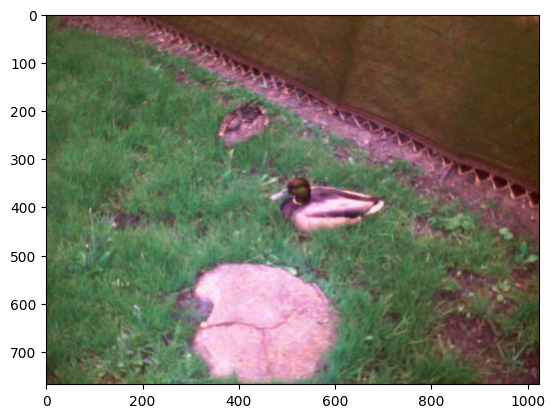

In [38]:
im = cv2.imread('dataset-duck/images/train2/7eba3135d94f52cc.png')
print(im.shape)
plt.imshow(im)

In [39]:
def extract_coordinates(file_path,image):
    coordinates_list = []

    with open(file_path, 'r') as file:
            line = file.read()
            data = line.split()  # Split the line by whitespace
            class_label = data[0]  # Assuming first element is the class label
            x_arr = []
            y_arr = []
            for i in range(2, len(data), 2):
                x_arr.append(float(data[i-1]))
                y_arr.append(float(data[i]))
            print(min(x_arr),max(x_arr))
            print(min(y_arr),max(y_arr))
            coordinates = [class_label,(min(x_arr)+max(x_arr))/2,(min(y_arr)+max(y_arr))/2,(max(x_arr)-min(x_arr)),(max(y_arr)-min(y_arr))]   
    return coordinates



In [40]:
path = 'dataset-duck/labels/train2/7eba3135d94f52cc.txt'
coordinates = extract_coordinates(path,im)

0.45 0.6859375
0.43333333333333335 0.5979166666666667


In [44]:
def plot_points_on_array(points,image, point_color=(255,0,0)):
    """
    Plot points on a numpy array image.

    Args:
        points (list of tuples): List of (x, y) tuples representing the points.
        array_shape (tuple): Shape of the numpy array image (height, width).
        point_color (int or float): Value to represent the points in the numpy array.

    Returns:
        numpy.ndarray: Image with points plotted.
    """

    width,height = points[3:]
    x,y = points[1:3]
    x_center = x*image.shape[1]
    y_center = y*image.shape[0]
    # Calculate the top-left corner coordinates
    
    x = int(x_center - width*image.shape[1] / 2)
    y = int(y_center - height*image.shape[0] / 2)
    print(x,y)
    
    print(width*image.shape[1])
    print(height*image.shape[0])
    cv2.rectangle(image, (x, y), (x + int(width*image.shape[1]) , int(y + height*image.shape[0])), (0, 255, 0), 2)  # Green color, thickness 2

    return image

56 122
759.0400000000001
782.72


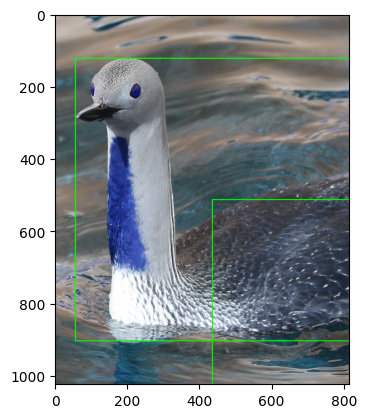

In [45]:
plt.imshow(plot_points_on_array(coordinates,im))

0.06901960784313725 0.9992156862745099
0.12 0.884375
56 122
759.0400000000001
782.72


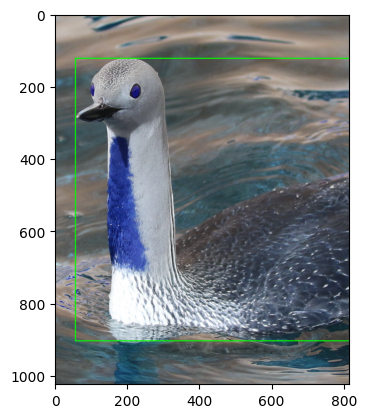

In [46]:

# Example usage:
im = cv2.imread('dataset-duck/images/train2/8cc7d6a5e087914b.png')
file_path = 'dataset-duck/labels/train2/8cc7d6a5e087914b.txt'
coordinates = extract_coordinates(file_path,im)
plt.imshow(plot_points_on_array(coordinates,im))

In [ ]:
import os
os.makedirs('annotated_im')

In [50]:
os.makedirs('detect_labels')

In [ ]:
cnt=0
for file_name in os.listdir('dataset-duck/labels/val_seg/'):

    cnt+=1
    extract_num = file_name.split('.')[0]
    
    im = cv2.imread('dataset-duck/images/val/'+extract_num+'.png')
    coordinates = extract_coordinates('dataset-duck/labels/val_seg/'+file_name,im)
    
    #cv2.imwrite(f'annotated_im/{extract_num}.png',plot_points_on_array(coordinates,im))
    write_ints_to_file(coordinates,f'val_labels/{file_name}')
    
    del coordinates
    del im

In [49]:
def write_ints_to_file(int_list, file_name):
    with open(file_name, 'w') as file:
        for num in int_list:
            file.write(str(num) + ' ')

In [53]:
import shutil

In [58]:
for file_name in os.listdir('dataset-duck/labels/train1/'):
    shutil.copy('detect_labels/'+file_name,'detect_label1/'+file_name)

### Training the YOLO models

In [1]:
from ultralytics import YOLO

/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_nano = YOLO('yolov8n.yaml')
model_medium_pretrained = YOLO('yolov8m.pt')
model_nano_pretrained = YOLO('yolov8n.pt')

DEBUGGER-ROHANK {'nc': 80, 'scales': {'n': [0.33, 0.25, 1024], 's': [0.33, 0.5, 1024], 'm': [0.67, 0.75, 768], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.25, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C2f', [256]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 12], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 9], 1, 'Concat', [1]], [-1, 3, 'C2f', [1024]], [[15, 18, 21], 1, 'Detect', ['nc']]], 'scale': 'n', 'yaml_file': 'yolov8n.yaml'}
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.Classifica

In [3]:
results_nano_400 = model_nano.train(data="/home2/rkada/dataset-duck2/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck2/labels/train... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:02<00:00, 176.87it/s]

train: New cache created: /home2/rkada/dataset-duck2/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home2/rkada/dataset-duck2/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 221.82it/s]

val: New cache created: /home2/rkada/dataset-duck2/labels/val.cache


Plotting labels to runs/detect/train5/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train5
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.36G      3.401      4.212      4.257         29        640: 100%|██████████| 25/25 [00:04<00:00,  6.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.16it/s]

                   all         50         50    0.00232       0.68    0.00683    0.00182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.37G      3.365       4.07      4.122         32        640: 100%|██████████| 25/25 [00:02<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all         50         50    0.00219       0.64    0.00664    0.00199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.37G      3.241      3.898      3.943         43        640: 100%|██████████| 25/25 [00:02<00:00,  8.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]


                   all         50         50    0.00339       0.58     0.0422     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.37G      3.069      3.817      3.694         37        640: 100%|██████████| 25/25 [00:02<00:00,  8.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.86it/s]


                   all         50         50    0.00605        0.5     0.0195    0.00546

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G      2.984      3.743      3.525         31        640: 100%|██████████| 25/25 [00:02<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all         50         50    0.00261       0.78     0.0144    0.00366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.37G      2.885      3.656      3.396         36        640: 100%|██████████| 25/25 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all         50         50     0.0125       0.04    0.00691    0.00181

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.37G      2.854      3.562      3.341         37        640: 100%|██████████| 25/25 [00:02<00:00,  9.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         50         50     0.0444       0.08     0.0125    0.00303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.37G      2.773      3.447      3.245         35        640: 100%|██████████| 25/25 [00:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]


                   all         50         50     0.0418       0.42     0.0421    0.00843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.37G      2.793      3.406      3.188         31        640: 100%|██████████| 25/25 [00:02<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         50         50     0.0752       0.08     0.0689     0.0179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.37G      2.666      3.301       3.16         32        640: 100%|██████████| 25/25 [00:02<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]


                   all         50         50      0.397       0.06     0.0863     0.0249
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.48G      2.602      3.541      3.074         16        640: 100%|██████████| 25/25 [00:03<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         50         50      0.111       0.36      0.123     0.0261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G      2.493      3.424      2.963         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]


                   all         50         50      0.125        0.1     0.0415     0.0149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G      2.529      3.327      3.049         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all         50         50      0.187       0.38      0.116      0.031

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.37G      2.486      3.216      3.002         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all         50         50      0.165       0.06     0.0908     0.0317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.37G      2.481      3.166      2.965         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]


                   all         50         50      0.287       0.24       0.21     0.0589

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.37G      2.388      3.079      2.953         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         50         50       0.41        0.3       0.28     0.0756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.37G      2.354      3.021      2.891         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all         50         50      0.252       0.23      0.178     0.0482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.37G      2.328       2.98       2.88         15        640: 100%|██████████| 25/25 [00:02<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]


                   all         50         50      0.158       0.16      0.116     0.0353

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.37G       2.34      2.953       2.88         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.51it/s]


                   all         50         50      0.262       0.26       0.19     0.0663

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.37G      2.352      2.897      2.892         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]


                   all         50         50      0.358       0.36      0.233     0.0734

20 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train5/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train5/weights/best.pt, 6.2MB

Validating runs/detect/train5/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]


                   all         50         50       0.42       0.32       0.28     0.0755
Speed: 1.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train5


In [7]:
model_nano = YOLO('yolov8n.yaml')
results_nano_100 = model_nano.train(data="/home2/rkada/dataset-duck1/config.yaml",epochs=20)

Error in callback <bound method _WandbInit._resume_backend of <wandb.sdk.wandb_init._WandbInit object at 0x15104c499180>> (for pre_run_cell), with arguments args (<ExecutionInfo object at 15104c838820, raw_cell="model_nano = YOLO('yolov8n.yaml')
results_nano_100.." store_history=True silent=False shell_futures=True cell_id=f95a54c3-bb13-4cf7-80ee-7cba734723dd>,),kwargs {}:


TypeError: _WandbInit._resume_backend() takes 1 positional argument but 2 were given

DEBUGGER-ROHANK {'nc': 80, 'scales': {'n': [0.33, 0.25, 1024], 's': [0.33, 0.5, 1024], 'm': [0.67, 0.75, 768], 'l': [1.0, 1.0, 512], 'x': [1.0, 1.25, 512]}, 'backbone': [[-1, 1, 'Conv', [64, 3, 2]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C2f', [128, True]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 6, 'C2f', [256, True]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 6, 'C2f', [512, True]], [-1, 1, 'Conv', [1024, 3, 2]], [-1, 3, 'C2f', [1024, True]], [-1, 1, 'SPPF', [1024, 5]]], 'head': [[-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 6], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'nn.Upsample', ['None', 2, 'nearest']], [[-1, 4], 1, 'Concat', [1]], [-1, 3, 'C2f', [256]], [-1, 1, 'Conv', [256, 3, 2]], [[-1, 12], 1, 'Concat', [1]], [-1, 3, 'C2f', [512]], [-1, 1, 'Conv', [512, 3, 2]], [[-1, 9], 1, 'Concat', [1]], [-1, 3, 'C2f', [1024]], [[15, 18, 21], 1, 'Detect', ['nc']]], 'scale': 'n', 'yaml_file': 'yolov8n.yaml'}
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.Classifica

train: Scanning /home2/rkada/dataset-duck1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home2/rkada/dataset-duck1/labels/val... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<00:00, 228.81it/s]

val: New cache created: /home2/rkada/dataset-duck1/labels/val.cache


Plotting labels to runs/detect/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train8
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.74G      2.885      28.02      3.676          2        640: 100%|██████████| 7/7 [00:01<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.66it/s]

                   all         50         50    0.00223       0.66    0.00489    0.00153



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.64G      2.795      24.16      3.754          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all         50         50    0.00229       0.66     0.0071    0.00242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.64G      3.507      10.37      4.347          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]

                   all         50         50    0.00226       0.66    0.00486    0.00151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.64G      4.143      10.76      4.222          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]


                   all         50         50    0.00217       0.64    0.00447     0.0015

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.64G      3.505      9.902        4.5          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]


                   all         50         50    0.00235       0.68    0.00488    0.00148

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.64G      3.525      8.412      4.247          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]


                   all         50         50    0.00226       0.66    0.00464    0.00145

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.64G      3.379      12.09       4.21          2        640: 100%|██████████| 7/7 [00:00<00:00,  7.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all         50         50    0.00232       0.68    0.00462    0.00145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.64G      3.655      7.598      4.107          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]


                   all         50         50    0.00219       0.64    0.00469    0.00149

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.64G      3.457      6.962      4.084          2        640: 100%|██████████| 7/7 [00:00<00:00,  8.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]


                   all         50         50    0.00218       0.64    0.00483    0.00163

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.64G      3.831      8.869      3.954          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]


                   all         50         50    0.00233       0.68    0.00542    0.00184
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.75G      3.035      18.48      3.391          1        640: 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all         50         50    0.00233       0.68    0.00624    0.00193

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.64G      3.443      9.575      4.106          3        640: 100%|██████████| 7/7 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         50         50    0.00292       0.68     0.0126    0.00346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.64G      2.698      9.716      3.971          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]

                   all         50         50    0.00289       0.68    0.00809    0.00267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.64G      3.247      10.98      4.009          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]


                   all         50         50    0.00301        0.7    0.00775    0.00237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.64G      3.046      16.93       3.91          2        640: 100%|██████████| 7/7 [00:00<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all         50         50     0.0031        0.7     0.0085    0.00269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.64G      2.547      10.56       3.43          0        640: 100%|██████████| 7/7 [00:00<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]


                   all         50         50    0.00308        0.7    0.00907    0.00288

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.64G      3.312      10.74      3.875          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]


                   all         50         50     0.0031        0.7    0.00937    0.00295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.64G      2.764      8.732      3.961          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         50         50    0.00313        0.7    0.00877    0.00297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.57G      2.713      15.28       3.37          2        640: 100%|██████████| 7/7 [00:00<00:00,  9.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all         50         50    0.00304       0.68    0.00712    0.00231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.59G      2.646      9.681      3.429          0        640: 100%|██████████| 7/7 [00:00<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         50         50    0.00302       0.68    0.00825    0.00301



20 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train8/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train8/weights/best.pt, 6.2MB

Validating runs/detect/train8/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.21it/s]


                   all         50         50    0.00293       0.68     0.0116    0.00353
Speed: 1.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train8


Exception in thread Thread-132 (_pin_memory_loop):
Traceback (most recent call last):
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/threading.py", line 1016, in _bootstrap_inner
    self.run()
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/threading.py", line 953, in run
    self._target(*self._args, **self._kwargs)
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/site-packages/torch/utils/data/_utils/pin_memory.py", line 49, in _pin_memory_loop
    do_one_step()
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/site-packages/torch/utils/data/_utils/pin_memory.py", line 26, in do_one_step
    r = in_queue.get(timeout=MP_STATUS_CHECK_INTERVAL)
  File "/home2/rkada/miniconda3/envs/deepfont/lib/python3.10/multiprocessing/queues.py", line 113, in get
    if not self._poll(timeout):
  F

In [9]:
model_nano_pretrained = YOLO('yolov8n.pt')
results_nano_pretrained_400 = model_nano_pretrained.train(data="/home2/rkada/dataset-duck2/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home2/rkada/dataset-duck2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train10
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.78G      1.212      2.713      1.385         29        640: 100%|██████████| 25/25 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all         50         50    0.00327       0.98      0.529      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.59G      1.266      2.454      1.417         32        640: 100%|██████████| 25/25 [00:02<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all         50         50      0.497      0.335      0.412      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.58G      1.297      2.296      1.427         43        640: 100%|██████████| 25/25 [00:02<00:00,  9.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         50         50      0.457       0.38       0.35      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.58G      1.362      2.199      1.499         37        640: 100%|██████████| 25/25 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all         50         50      0.267       0.24      0.208     0.0619

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.58G       1.35      2.199      1.498         31        640: 100%|██████████| 25/25 [00:02<00:00,  9.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]

                   all         50         50      0.529       0.34      0.352      0.184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.58G      1.335      2.114      1.472         36        640: 100%|██████████| 25/25 [00:02<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         50         50      0.288      0.581      0.353      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.58G      1.349       2.12       1.51         37        640: 100%|██████████| 25/25 [00:02<00:00,  9.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all         50         50      0.553       0.38      0.372      0.198

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.58G      1.316      1.978      1.472         35        640: 100%|██████████| 25/25 [00:02<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all         50         50      0.641       0.42      0.508      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.58G      1.234      1.893      1.416         31        640: 100%|██████████| 25/25 [00:02<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.09it/s]


                   all         50         50      0.629        0.6      0.549      0.324

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.58G      1.199      1.826      1.418         32        640: 100%|██████████| 25/25 [00:02<00:00,  9.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all         50         50      0.582       0.68       0.63      0.395


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.58G      1.148      1.983      1.397         16        640: 100%|██████████| 25/25 [00:03<00:00,  7.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]


                   all         50         50      0.671       0.64      0.655       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.58G      1.141      1.857      1.368         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all         50         50      0.561      0.588      0.598      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.58G      1.098      1.794      1.358         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]


                   all         50         50      0.768       0.64      0.706      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.54G      1.056      1.675      1.335         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all         50         50      0.619       0.62      0.619      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.54G      1.065      1.636      1.316         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all         50         50      0.735       0.68      0.712      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.54G      1.014      1.591      1.289         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]


                   all         50         50      0.694        0.7      0.726        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.54G      0.969      1.505      1.215         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all         50         50      0.713      0.745      0.764       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.54G     0.9097      1.417      1.205         15        640: 100%|██████████| 25/25 [00:02<00:00,  9.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all         50         50      0.711      0.788      0.762      0.561

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.54G     0.8886      1.374      1.177         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all         50         50      0.788      0.742      0.799      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.54G     0.8509       1.33      1.158         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]


                   all         50         50      0.849       0.68      0.803      0.591

20 epochs completed in 0.024 hours.
Optimizer stripped from runs/detect/train10/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train10/weights/best.pt, 6.2MB

Validating runs/detect/train10/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]


                   all         50         50      0.788      0.742      0.799      0.592
Speed: 1.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train10


In [10]:
model_nano_pretrained = YOLO('yolov8n.pt')
results_nano_pretrained_100 = model_nano_pretrained.train(data="/home2/rkada/dataset-duck1/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home2/rkada/dataset-duck1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train11
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20       2.7G       1.18      8.292      1.369          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]


                   all         50         50    0.00333          1      0.473      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.62G      1.236      10.22      1.487          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         50         50    0.00333          1      0.506       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.62G      1.284      6.516      1.598          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all         50         50    0.00333          1      0.329      0.159

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.62G      1.324        7.5      1.474          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all         50         50    0.00327       0.98      0.268      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.62G      1.468      6.723      1.412          1        640: 100%|██████████| 7/7 [00:00<00:00,  7.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]


                   all         50         50     0.0032       0.96      0.126      0.039

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.62G      1.325      5.619      1.349          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         50         50    0.00313       0.94      0.152     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.62G      1.396       7.61       1.47          2        640: 100%|██████████| 7/7 [00:00<00:00,  8.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         50         50    0.00293       0.88       0.11     0.0311



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.62G      1.272       6.78      1.428          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


                   all         50         50    0.00293       0.88      0.153     0.0534

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.62G      1.475      5.288      1.511          2        640: 100%|██████████| 7/7 [00:00<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]


                   all         50         50     0.0028       0.84     0.0565     0.0157

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.62G      1.535      5.705      1.471          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all         50         50     0.0032       0.96      0.064     0.0165
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.72G      1.165      19.53      1.181          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all         50         50    0.00313       0.94     0.0885     0.0213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.62G      1.268      8.553      1.382          3        640: 100%|██████████| 7/7 [00:00<00:00,  8.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]

                   all         50         50     0.0032       0.96     0.0645     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.62G      1.401      7.603      1.606          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]


                   all         50         50     0.0032       0.96     0.0604     0.0205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.62G      1.294      7.839      1.297          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all         50         50     0.0969       0.16     0.0717     0.0263

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.62G      1.331      8.807      1.447          2        640: 100%|██████████| 7/7 [00:00<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]


                   all         50         50      0.153       0.06     0.0512     0.0189

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.58G     0.9162      10.08      1.049          0        640: 100%|██████████| 7/7 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]


                   all         50         50      0.224        0.1      0.101     0.0519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.58G      1.119       7.01       1.31          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all         50         50      0.205       0.14      0.104     0.0442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.58G      1.087      6.839      1.354          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]


                   all         50         50      0.217       0.16       0.11     0.0466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.5G      0.908      15.73      1.058          2        640: 100%|██████████| 7/7 [00:00<00:00,  9.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         50         50      0.343        0.2      0.162     0.0596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.58G     0.9737      7.966      1.123          0        640: 100%|██████████| 7/7 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all         50         50      0.291       0.16      0.178     0.0733

20 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.2MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]


                   all         50         50    0.00333          1      0.505      0.331
Speed: 1.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train11


In [2]:
model_medium_pretrained = YOLO('yolov8m.pt')
results_medium_pretrained_400 = model_medium_pretrained.train(data="/home2/rkada/dataset-duck2/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home2/rkada/dataset-duck2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train19/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train19
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      7.33G      1.232      2.591      1.519         29        640: 100%|██████████| 25/25 [00:07<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         50         50      0.474       0.36      0.319      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       7.7G      1.545      2.489      1.735         32        640: 100%|██████████| 25/25 [00:06<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.33it/s]

                   all         50         50   0.000883       0.26   0.000641   0.000285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      7.58G      1.664       2.47      1.862         43        640: 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all         50         50    0.00198       0.48    0.00151   0.000603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      7.59G      1.651       2.37      1.877         37        640: 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         50         50    0.00377       0.68    0.00379    0.00122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       7.6G      1.748      2.389      1.926         31        640: 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all         50         50     0.0166        0.3    0.00912    0.00214



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       7.6G      1.622      2.274      1.833         36        640: 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all         50         50    0.00361       0.04    0.00338   0.000961



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      7.59G      1.643      2.285      1.858         37        640: 100%|██████████| 25/25 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all         50         50     0.0801       0.22      0.042     0.0149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      7.26G       1.57       2.11      1.747         35        640: 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.33it/s]

                   all         50         50      0.211        0.5       0.17     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      7.26G      1.502      2.058      1.699         31        640: 100%|██████████| 25/25 [00:06<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all         50         50      0.128      0.347      0.105     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      7.26G      1.394      1.957      1.628         32        640: 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all         50         50       0.29        0.4      0.265      0.134


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      7.26G      1.415      2.054      1.696         16        640: 100%|██████████| 25/25 [00:07<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all         50         50        0.5       0.56      0.528      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      7.26G      1.388      1.948      1.649         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.07it/s]

                   all         50         50      0.559      0.532      0.483      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      7.25G      1.405      1.883      1.672         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         50         50      0.447       0.42      0.396      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      7.26G      1.301      1.778      1.592         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all         50         50      0.502        0.5      0.444      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      7.25G      1.247      1.748      1.554         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all         50         50      0.471       0.68      0.532      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      7.25G      1.198      1.666      1.522         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.38it/s]

                   all         50         50      0.601       0.62       0.56      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      7.25G      1.152      1.607      1.455         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all         50         50      0.715      0.601      0.641      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      7.26G      1.123      1.566      1.459         15        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all         50         50      0.747       0.59      0.675      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      7.26G      1.047      1.453      1.371         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all         50         50      0.672       0.66       0.69       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      7.25G      1.015      1.397      1.377         16        640: 100%|██████████| 25/25 [00:06<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all         50         50      0.645      0.654       0.69      0.481



20 epochs completed in 0.055 hours.
Optimizer stripped from runs/detect/train19/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train19/weights/best.pt, 52.0MB

Validating runs/detect/train19/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]


                   all         50         50      0.645      0.654       0.69      0.479
Speed: 1.2ms preprocess, 4.0ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train19


model_medium_pretrained = YOLO('yolov8m.pt')
results_medium_pretrained_100 = model_medium_pretrained.train(data="/home2/rkada/dataset-duck1/config.yaml",epochs=20)

### Observations

Based on the above results, we infer that the dataset size of 100 gives a much lesser performance (AP50) on val set as compared to a dataset size of 400.

| TYPE/AP50 on VAL | DuckData-100 | DuckData-400 |
|---|---|---|
| YOLOv8-nano | 0.0116 | 0.28 |
| Yolov8-nano-pretrained | 0.505 | 0.799 |
| Yolov8-medium-pretrained | 0.676 | 0.69 |

The above table indicates that the Yolov8-nano model clearly outperforms other medium and untrained models. The reason can be related to the small model and less complexity whic makes it less overfit to the variety of duck data in the images. In the images, the data is from vast variety like imagenet and involves some ducks which can't be easily identified. So, the model needs to extract useful features and not memorize the training data.

#### Let's visualize results on images (using fine tuned Yolov8n-pretrained)

In [57]:
best_model_nano_pretrained = YOLO('/home2/rkada/runs/detect/train10/weights/best.pt')

In [58]:
# Run batched inference on a list of images
img_list = ['/home2/rkada/dataset-duck2/images/val/39024566929f84ec.png', '/home2/rkada/dataset-duck2/images/val/1edfc876b4bfdec1.png','/home2/rkada/dataset-duck2/images/val/11520a5f881bfead.png','/home2/rkada/dataset-duck2/images/val/21086afedd53661f.png']
results = best_model_nano_pretrained(img_list)  # return a list of Results objects

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    print(boxes)
    

DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': <class 'ultralytics.models.yolo.segment.predict.SegmentationPredictor'>}, 'pose': {'model': <class 'u

In [59]:
bboxes = [[329.6711, 322.2923, 112.7974, 169.6859],[732.3983, 369.5602, 277.3405, 261.5563],[341.7975, 462.3931, 282.9219, 210.9105],[590.2857, 354.8962, 419.1305, 175.7119]]

In [68]:
fig, axes = plt.subplots(2, 2)

for img_id,box in enumerate(bboxes):
    print(img_id)
    img = cv2.imread(img_list[img_id])
    image_annotated = plot_eval(box,img)
    axes[img_id//2,img_id%2].imshow(image_annotated)
    cv2.imwrite(f'{img_id}-image.png',image_annotated)
    
# Adjust layout (optional)
plt.tight_layout()

# Show the plot
plt.show()

0
1
2
3


<Figure size 640x480 with 4 Axes>

<Figure size 640x480 with 4 Axes>

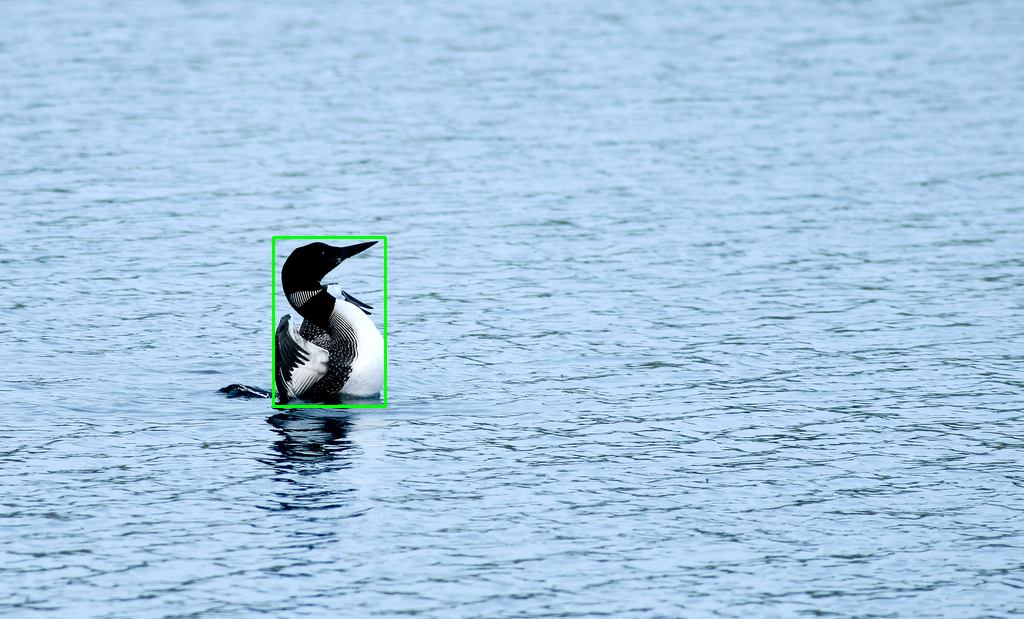

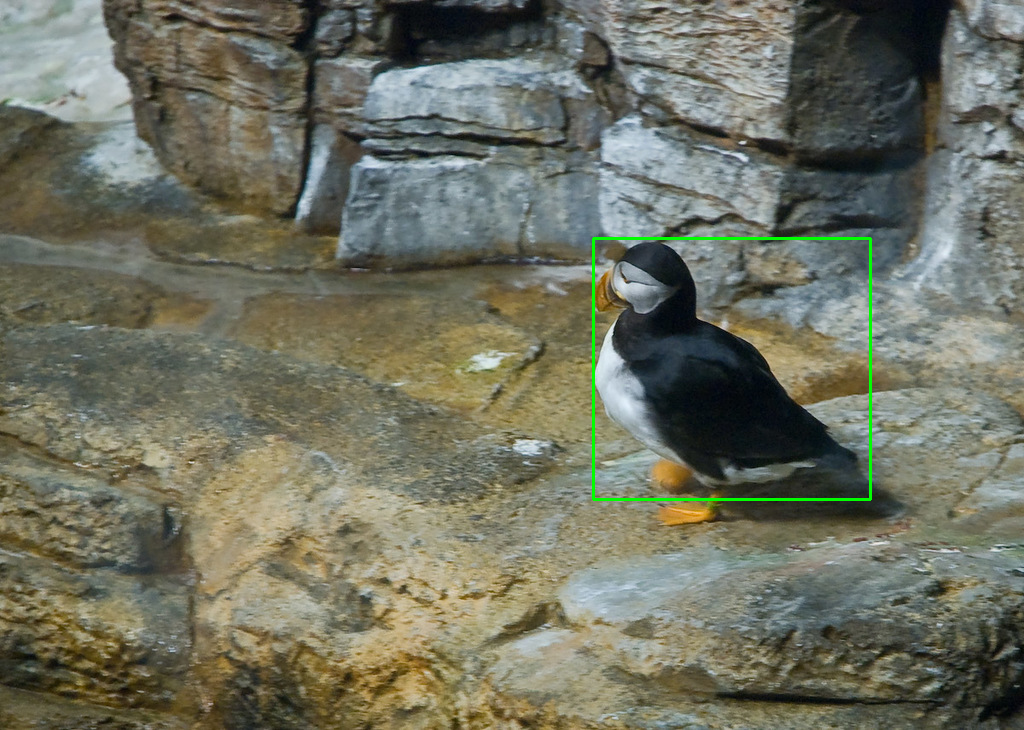

In [69]:
from PIL import Image
from IPython.display import display

for img_id in range(len(img_list)):
    image = Image.open(f'{img_id}-image.png')
    display(image)

In [47]:
def plot_eval(points,image, point_color=(255,0,0)):
    """
    Plot points on a numpy array image.

    Args:
        points (list of tuples): List of (x, y) tuples representing the points.
        array_shape (tuple): Shape of the numpy array image (height, width).
        point_color (int or float): Value to represent the points in the numpy array.

    Returns:
        numpy.ndarray: Image with points plotted.
    """
    width,height = points[2:]
    x_center,y_center = points[0:2]
    # Calculate the top-left corner coordinates
    
    x = int(x_center - width/ 2)
    y = int(y_center - height/ 2)
    
    cv2.rectangle(image, (x, y), (int(x +width) , int(y + height)), (0, 255, 0), 2)  # Green color, thickness 2

    return image

### Impact of Augmentations

#### Default albumentations: 
1. Blur(p=0.01, blur_limit=(3, 7))
2. MedianBlur(p=0.01, blur_limit=(3, 7))
3. ToGray(p=0.01)
4. CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

#### Train Yolov8n without augmentations

In [4]:
model_nano_pretrained = YOLO('yolov8n.pt')
results_nano_pretrained_100 = model_nano_pretrained.train(data="/home2/rkada/dataset-duck1/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: rohan-victorious108. Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck1/labels/train.cache... 22 images, 78 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<?, ?it/s]
val: Scanning /home2/rkada/dataset-duck1/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train23/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train23
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.35G          1      7.441      1.232          2        640: 100%|██████████| 7/7 [00:01<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         50         50    0.00333          1      0.582      0.389



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.38G      1.015      5.835      1.256          2        640: 100%|██████████| 7/7 [00:01<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         50         50    0.00333          1      0.405      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.36G       1.06      10.04      1.164          0        640: 100%|██████████| 7/7 [00:00<00:00,  7.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         50         50    0.00333          1      0.291      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.37G       1.51      6.474      1.464          3        640: 100%|██████████| 7/7 [00:00<00:00,  7.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all         50         50    0.00333          1      0.282      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.37G      1.469      5.647      1.429          2        640: 100%|██████████| 7/7 [00:00<00:00,  7.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         50         50     0.0032       0.96      0.202     0.0846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.37G      1.289      7.061       1.36          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all         50         50    0.00327       0.98     0.0984     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.37G      1.286      6.338      1.357          1        640: 100%|██████████| 7/7 [00:00<00:00,  8.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all         50         50    0.00307       0.92     0.0614      0.014



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.36G       1.14      8.251      1.258          0        640: 100%|██████████| 7/7 [00:00<00:00,  9.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         50         50    0.00313       0.94     0.0775     0.0227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.37G      1.368      6.465      1.458          5        640: 100%|██████████| 7/7 [00:00<00:00,  8.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.12it/s]

                   all         50         50    0.00307       0.92     0.0625     0.0187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.37G      1.513      5.505      1.431          4        640: 100%|██████████| 7/7 [00:00<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         50         50    0.00313       0.94     0.0312    0.00947


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.47G      1.214      20.14      1.257          1        640: 100%|██████████| 7/7 [00:01<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all         50         50    0.00307       0.92     0.0261    0.00831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.37G      1.364      8.974      1.455          3        640: 100%|██████████| 7/7 [00:00<00:00,  8.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.71it/s]


                   all         50         50    0.00287       0.86     0.0205    0.00978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.37G        1.4      8.702      1.545          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.98it/s]

                   all         50         50     0.0028       0.84     0.0107    0.00363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.37G      1.353      8.168      1.516          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         50         50    0.00293       0.88     0.0626     0.0167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.34G      1.591      11.17      1.553          2        640: 100%|██████████| 7/7 [00:00<00:00,  9.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         50         50      0.187       0.04     0.0642     0.0204



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.34G      1.445       12.4      1.572          0        640: 100%|██████████| 7/7 [00:00<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         50         50      0.222       0.08     0.0754      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.34G      1.445      7.659      1.571          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         50         50      0.342        0.1     0.0936     0.0273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.34G      1.473      6.977      1.488          1        640: 100%|██████████| 7/7 [00:00<00:00,  9.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all         50         50      0.332       0.12     0.0791     0.0205



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.27G      1.209      16.06      1.335          2        640: 100%|██████████| 7/7 [00:00<00:00,  8.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all         50         50       0.26       0.06     0.0603     0.0151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.34G      1.091      9.041      1.177          0        640: 100%|██████████| 7/7 [00:00<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all         50         50      0.164        0.1     0.0806     0.0214



20 epochs completed in 0.010 hours.
Optimizer stripped from runs/detect/train23/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train23/weights/best.pt, 6.2MB

Validating runs/detect/train23/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]


                   all         50         50    0.00333          1      0.572      0.365
Speed: 1.1ms preprocess, 0.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train23


In [5]:
model_nano_pretrained = YOLO('yolov8n.pt')
results_nano_pretrained_400 = model_nano_pretrained.train(data="/home2/rkada/dataset-duck2/config.yaml",epochs=20)

New https://pypi.org/project/ultralytics/8.1.46 available 😃 Update with 'pip install -U ultralytics'
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'predictor': 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
DEBUGGER-ROHANK {'classify': {'model': <class 'ultralytics.nn.tasks.ClassificationModel'>, 'trainer': <class 'ultralytics.models.yolo.classify.train.ClassificationTrainer'>, 'validator': <class 'ultralytics.models.yolo.classify.val.ClassificationValidator'>, 'predictor': <class 'ultralytics.models.yolo.classify.predict.ClassificationPredictor'>}, 'detect': {'model': <class 'ultralytics.nn.tasks.DetectionModel'>, 'trainer': <class 'ultralytics.models.yolo.detect.train.DetectionTrainer'>, 'validator': <class 'ultralytics.models.yolo.detect.val.DetectionValidator'>, 'predictor': <class 'ultralytics.models.yolo.detect.predict.DetectionPredictor'>}, 'segment': {'model': <class 'ultralytics.nn.tasks.SegmentationModel'>, 'trainer': <class 'ultralytics.models.yolo.segment.train.SegmentationTrainer'>, 'validator': <class 'ultralytics.models.yolo.segment.val.SegmentationValidator'>, 'pre

train: Scanning /home2/rkada/dataset-duck2/labels/train.cache... 400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 400/400 [00:00<?, ?it/s]
val: Scanning /home2/rkada/dataset-duck2/labels/val.cache... 50 images, 0 backgrounds, 0 corrupt: 100%|██████████| 50/50 [00:00<?, ?it/s]


Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.41G      1.157      2.696      1.323         26        640: 100%|██████████| 25/25 [00:03<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all         50         50    0.00333          1      0.401       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      2.43G      1.253      2.353      1.417         24        640: 100%|██████████| 25/25 [00:03<00:00,  8.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all         50         50      0.402        0.4      0.327      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.42G      1.311      2.323      1.431         30        640: 100%|██████████| 25/25 [00:03<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         50         50      0.103        0.4     0.0787     0.0352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.38G      1.403       2.29      1.534         32        640: 100%|██████████| 25/25 [00:02<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all         50         50      0.329       0.48       0.28      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.38G      1.352      2.131       1.49         37        640: 100%|██████████| 25/25 [00:02<00:00,  8.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all         50         50      0.348       0.32      0.264      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.38G      1.325      2.053      1.441         33        640: 100%|██████████| 25/25 [00:02<00:00,  8.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all         50         50        0.5       0.62      0.504      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.38G      1.316      2.038      1.442         29        640: 100%|██████████| 25/25 [00:02<00:00,  8.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all         50         50      0.318       0.46      0.317      0.135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.38G      1.342      1.907      1.493         29        640: 100%|██████████| 25/25 [00:02<00:00,  8.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all         50         50      0.468       0.48       0.37      0.169

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.38G      1.255      1.851      1.391         40        640: 100%|██████████| 25/25 [00:02<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         50         50      0.571        0.6      0.597      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.38G      1.254      1.782      1.368         33        640: 100%|██████████| 25/25 [00:02<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all         50         50      0.541        0.7      0.598       0.38


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.49G      1.154      1.948      1.399         15        640: 100%|██████████| 25/25 [00:03<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         50         50      0.659       0.68      0.642       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.38G      1.111      1.814      1.361         16        640: 100%|██████████| 25/25 [00:02<00:00,  8.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all         50         50      0.721        0.5      0.612      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.38G      1.077      1.718      1.329         16        640: 100%|██████████| 25/25 [00:02<00:00,  8.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all         50         50      0.648       0.66      0.664      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.38G      1.036      1.625      1.272         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         50         50      0.775       0.72      0.741      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.38G     0.9845      1.527       1.25         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all         50         50      0.791       0.68      0.686      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.38G      0.991      1.506      1.254         16        640: 100%|██████████| 25/25 [00:02<00:00,  8.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all         50         50      0.762       0.64       0.72      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.38G     0.9085      1.416      1.198         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all         50         50       0.77       0.62      0.747      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.38G     0.9055      1.393      1.205         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         50         50       0.71       0.72      0.744       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.38G     0.8495      1.319      1.151         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all         50         50      0.621       0.76      0.735       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.38G     0.8339      1.279      1.167         16        640: 100%|██████████| 25/25 [00:02<00:00,  9.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all         50         50      0.658       0.82      0.763      0.588



20 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train24/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train24/weights/best.pt, 6.2MB

Validating runs/detect/train24/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11012MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]


                   all         50         50      0.658       0.82      0.763      0.588
Speed: 1.2ms preprocess, 0.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train24


#### Without Augmentation
1. The YOLOv8n (100) gives a mAP = 0.572 > YOLOv8n (100)(with augmentation) [0.505]
2. The YOLOv8n (400) gives a mAP = 0.763 < YOLOv8n (100)(with augmentation) [0.799]

This implies that the dataset may not be distributed to a good extent. But as weincrease the training set, and perform diverse augmentations the model starts learning better.

Due to the liitation of ultralytics library, we cannot change the default augmenations and just remove them by ninstalling albumentations library, but by intuition we believe that ToGray(), ImageCompression() and Blur() augmentations are important : 
1. ToGray: Prevents model to focus on colors which is not important wince ducks are found in various colors in dataset.
2. ImageCompression : May degrade quality of image but will remove unnessecary features.
3. Blur : Will help remove the fine grained edges that may become confusing for the model in the training set itself.

### Challenges and learning
1. The dataset had segmentation masks so I had a chalenege to convert it to bounding boxes.
2. The best fit rectangle was a good idea to carry out this procedure.
3. Faced challenges in yolo yaml file.
4. Naming of folders for model.train() in YOLO.